# Exploring the Airbnb Market in Italy: Trends, Analysis, and Insights

### Importing required libraries

In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import target encoder
from category_encoders import TargetEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import KNNimputer
from sklearn.impute import KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import KFold,GridSearchCV

# import statsmodels
import statsmodels.api as sma

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import regular expression
import re

# import ast
import ast
# pip install category_encoders
# pip install wordcloud

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
pd.set_option('display.max_columns',75)

df_italy = pd.read_csv('ITALY (2).csv', encoding = 'iso-8859-1')
df_italy

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7.011000e+03,https://www.airbnb.com/rooms/7011,2.020000e+13,31-03-2023,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16888,https://www.airbnb.com/users/show/16888,Yumi Adriano,13-05-2009,"Sicily, Italy","Hi, this is Yumi, I am a Japanese, I speak Ja...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/16888/profile...,https://a0.muscache.com/im/users/16888/profile...,NaN,11.0,12.0,"['email', 'phone']",t,t,NaN,Marsala,NaN,37.840470,12.477780,Entire home,Entire home/apt,6,NaN,3 baths,3.0,4.0,"[""Free parking on premises"", ""Children\u2019s ...",$200.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,6,13,13,168,31-03-2023,31,0,0,26-08-2009,29-09-2021,4.67,4.67,4.85,4.81,4.70,4.59,4.56,NaN,t,10,10,0,0,0.19
1,1.537100e+04,https://www.airbnb.com/rooms/15371,2.020000e+13,01-04-2023,Summer Holidays @ VILLA ROSA,Very nice Villa Rosa (pink) in close vicinity ...,NaN,https://a0.muscache.com/pictures/74674/8e7e2ce...,58333,https://www.airbnb.com/users/show/58333,Gianluca,29-11-2009,"Bologna, Italy",Happy Airbnb Host!!,within an hour,93%,96%,f,https://a0.muscache.com/im/pictures/user/9533c...,https://a0.muscache.com/im/pictures/user/9533c...,NaN,2.0,4.0,"['email', 'phone']",t,t,NaN,Petrosino,NaN,37.708210,12.514000,Entire villa,Entire home/apt,10,NaN,3 baths,4.0,7.0,"[""Free parking on premises"", ""Pets allowed"", ""...",$35.00,1,729,1,1,729,729,1.0,729.0,NaN,t,29,59,89,364,01-04-2023,6,0,0,28-06-2014,26-08-2016,4.83,5.00,5.00,5.00,5.00,4.67,5.00,NaN,f,1,1,0,0,0.06
2,2.294800e+04,https://www.airbnb.com/rooms/22948,2.020000e+13,02-04-2023,B&B NEAR STATION ROOM WITH BALCONY,Near the Central Station and the beginning of ...,"The neighborhood is in a residential area, cen...",https://a0.muscache.com/pictures/miso/Hosting-...,88837,https://www.airbnb.com/users/show/88837,Giuseppe,05-03-2010,"Agrigento, Italy","Parlo solo italiano, un po di spagnolo e qualc...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/cf0e8...,https://a0.muscache.com/im/pictures/user/cf0e8...,NaN,4.0,5.0,"['email', 'phone']",t,t,"Agrigento, Sicily, Italy",Agrigento,NaN,37.308850,13.585820,Private room in bed and breakfast,Private room,2,NaN,1 shared bath,1.0,1.0,"[""IT mini 50 LT refrigerator"", ""Shower gel"", ""...",$40.00,1,360,1,1,1125,1125,1.0,1125.0,NaN,t,19,41,67,335,02-04-2023,342,39,2,30-08-2011,24-03-2023,4.79,4.87,4.88,4.86,4.80,4.88,4.85,19084001C101881,t,3,0,3,0,2.42
3,5.224900e+04,https://www.airbnb.com/rooms/52249,2.020000e+13,31-03-2023,CASA VULCANO - that's Sicily,Casa Vulcano with sea view <br />Suitable for ...,Mitten im Dorf auf einem HÃ¼gel.

### Checking the shape/dimension of the dataset

In [4]:
print(f'The dataset has {df_italy.shape[0]} rows and {df_italy.shape[1]} columns')

The dataset has 158884 rows and 74 columns


In [5]:
print(f'Dimension of the dataset is {df_italy.ndim}')

Dimension of the dataset is 2


### Checking the datatype, number of non null values and name of each variable in the dataset.

In [6]:
df_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158884 entries, 0 to 158883
Data columns (total 74 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            158884 non-null  float64
 1   listing_url                                   158884 non-null  object 
 2   scrape_id                                     158884 non-null  float64
 3   last_scraped                                  158884 non-null  object 
 4   name                                          158871 non-null  object 
 5   description                                   155877 non-null  object 
 6   neighborhood_overview                         79825 non-null   object 
 7   picture_url                                   158884 non-null  object 
 8   host_id                                       158884 non-null  int64  
 9   host_url                                      15

### Checking for the missing values. Displaying number of missing values per column

In [7]:
pd.set_option('display.max_rows',75)
missing_values_before = pd.DataFrame({'Count of Missing values': df_italy.isnull().sum(),
                              'Percentage of Missing values': (df_italy.isnull().sum()/df_italy.shape[0])*100})

missing_values_before.sort_values(by = 'Percentage of Missing values', ascending = False)

,Count of Missing values,Percentage of Missing values
neighbourhood_group_cleansed,158884,100.000000
bathrooms,158884,100.000000
calendar_updated,158884,100.000000
host_neighbourhood,153023,96.311145
license,132984,83.698799
host_about,93999,59.162030
reviews_per_month,84215,53.004078
neighborhood_overview,79059,49.758944
neighbourhood,79059,49.758944
host_location,51212,32.232320


From above missing values we can see that variables which are having above 50% null values we can drop them.

In [8]:
df_italy.drop(columns = ['neighbourhood_group_cleansed','neighborhood_overview','bathrooms','calendar_updated',
                        'host_neighbourhood','license','host_about','reviews_per_month','neighbourhood'],
             inplace = True)

#### Dropping columns with a high percentage of missing values can be a valid approach when the missingness is significant and removing those columns does not result in a loss of critical information. By removing these columns, you can simplify your dataset and potentially improve the accuracy and efficiency of your analysis.

Dropping of insigficant columns. 

In [9]:

df_italy.drop(columns = ['description','host_picture_url','host_thumbnail_url','host_listings_count',
                        'name','calendar_last_scraped','picture_url','host_url','last_scraped','scrape_id',
                         'host_total_listings_count','property_type','listing_url','id'],inplace = True)

#### Irrelevant Information: The dropped columns, such as 'description', 'host_picture_url', 'host_thumbnail_url', 'name', 'calendar_last_scraped', 'picture_url', 'host_url', 'last_scraped', 'scrape_id', 'host_total_listings_count', 'property_type', 'listing_url', and 'id', may contain information that is not directly relevant to the analysis or modeling task at hand. Removing these columns helps streamline the dataset and focus on the essential features.

Image and URL Columns: The dropped columns related to picture URLs and host URLs suggest that the analysis or modeling process may not heavily rely on visual content or web links. These columns may contain information such as links to images or external web pages, which might not be necessary for the current objectives.

Host-related Information: The dropped columns 'host_listings_count' and 'host_total_listings_count' indicate that the number of listings associated with the host is not considered in the analysis. This suggests that the focus might be more on the individual property listings rather than the host-level information.

Scraping and Listing Metadata: The dropped columns 'calendar_last_scraped', 'last_scraped', and 'scrape_id' imply that the specific details related to scraping and when the data was last updated are not important for the analysis. Similarly, the 'listing_url' column suggests that the direct URL to each listing is not required for the current task.

Property Descriptions: The dropped 'description' column suggests that the textual descriptions associated with the listings are not utilized in the analysis. This implies that the focus might be more on the numerical or categorical features rather than the textual content.

In [10]:
df_italy.columns

Index(['host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scor

In [11]:
df_italy[['calculated_host_listings_count','calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']]

,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,10,10,0,0
1,1,1,0,0
2,3,0,3,0
3,2,2,0,0
4,1,1,0,0
...,...,...,...,...
158879,1,0,1,0
158880,4,4,0,0
158881,151,151,0,0
158882,151,151,0,0


In [12]:
df_italy.drop(columns = ['calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms'] , inplace = True)

In [13]:
df_italy.drop(columns = 'host_verifications', inplace = True)

In [14]:
df_italy.shape

(158884, 47)

In [15]:
df_italy.columns

Index(['host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_

In [16]:
df_italy[['host_id','calculated_host_listings_count']]

,host_id,calculated_host_listings_count
0,16888,10
1,58333,1
2,88837,3
3,241430,2
4,244773,1
...,...,...
158879,465490746,1
158880,23412142,4
158881,431989288,151
158882,431989288,151


In [17]:
df_italy[df_italy['host_id'] == 16888]['calculated_host_listings_count'].count()

31

In [18]:
df_italy[df_italy['host_id'] == 88837]['calculated_host_listings_count'].count()

9

In [19]:
mapper = df_italy.groupby(by = 'host_id')['host_id'].count()
df_italy['calculated_host_listings_count'] = df_italy['host_id'].map(mapper)

In [20]:
df_italy[['host_id','calculated_host_listings_count']]

,host_id,calculated_host_listings_count
0,16888,31
1,58333,1
2,88837,9
3,241430,10
4,244773,3
...,...,...
158879,465490746,1
158880,23412142,10
158881,431989288,412
158882,431989288,412


In [21]:
df_italy[df_italy['host_id'] == 88837]['calculated_host_listings_count'].count()

9

#### price

In [22]:
df_italy['price']=df_italy["price"].str.replace('$','')

In [23]:
df_italy['price']=df_italy['price'].str.replace(',','')

In [24]:
df_italy['price'] = df_italy['price'].astype(float)

#### host_name

In [25]:
df_italy['host_name'].unique()

array(['Yumi Adriano', 'Gianluca', 'Giuseppe', ..., 'Martine', 'Paulina',
       'Carolin'], dtype=object)

In [26]:
df_italy.drop(columns = 'host_name',inplace = True)

#### host_since

In [27]:
df_italy.dropna(subset = ['host_since'] , inplace = True)

#### host_location

In [28]:
df_italy.groupby(by = ['host_location','room_type'])['price'].mean()

host_location                    room_type      
Abano Terme, Italy               Private room         59.933333
Abbiategrasso, Italy             Entire home/apt     113.333333
Abu Dhabi, United Arab Emirates  Entire home/apt      77.000000
Acate, Italy                     Private room         41.666667
Aci Bonaccorsi, Italy            Entire home/apt     727.083333
                                                       ...     
Zurich, Switzerland              Entire home/apt      70.769231
ZÃ¼rich, Switzerland             Entire home/apt    1112.103967
                                 Private room         64.466667
Ãlmhult, Sweden                 Entire home/apt     162.000000
Ãle-de-France, France           Entire home/apt     120.000000
Name: price, Length: 2000, dtype: float64

#### host_response_time

In [29]:
df_italy['host_response_time'].unique()

array(['within an hour', 'within a day', 'a few days or more', nan,
       'within a few hours'], dtype=object)

In [30]:
df_italy['host_response_time'] = df_italy['host_response_time'].fillna('unknown')

df_italy['host_response_time'].unique()

array(['within an hour', 'within a day', 'a few days or more', 'unknown',
       'within a few hours'], dtype=object)

#### host_response_rate

In [31]:
df_italy['host_response_rate'] = df_italy['host_response_rate'].str.replace('%','').astype(float)

df_italy['host_response_rate'].unique()

array([100.,  93.,  75.,  50.,   0.,  nan,  67.,  91.,  78.,  25.,  33.,
        70.,  99.,  83.,  90.,  94.,  95.,  88.,  92.,  71.,  89.,  80.,
        57.,  87.,  60.,  20.,  96.,  98.,  14.,  86.,  77.,  40.,  43.,
        73.,  63.,  97.,  11.,  69.,  44.,  29.,  17.,  30.,  82.,  13.,
        85.,  38.,  81.,  65.,  10.,  22.,   9.,  46.,  79.,  84.,  56.,
         8.,  54.,  26.,  66.,  68.,  55.,  74.,  45.,  72.,  48.,  31.,
        62.,  76.,  47.,  61.,  41.])

To impute host_response_rate variable we can use iterative imputer which will predict the review scores

In [32]:

import numpy as np
imputer = IterativeImputer(estimator=BayesianRidge())
df_italy['host_response_rate'] = imputer.fit_transform(df_italy[['host_response_rate']])




#### host_acceptance_rate

In [33]:
df_italy['host_acceptance_rate'] = df_italy['host_acceptance_rate'].str.replace('%','').astype(float)
df_italy['host_acceptance_rate'].unique()

array([100.,  96.,  85.,  79.,  nan,   0.,  88.,  80.,  95.,  76.,  98.,
        97.,  99.,  33.,  83.,  67.,  50.,  75.,  94.,  56.,  93.,  82.,
        78.,  38.,  40.,  65.,  25.,  13.,  91.,  84.,   9.,  73.,  22.,
        71.,  60.,  90.,  47.,  44.,  68.,  63.,  66.,  49.,  92.,  86.,
        89.,  46.,  62.,  87.,  59.,  55.,  69.,  48.,  20.,  39.,  64.,
        53.,  42.,  27.,   8.,  77.,  28.,  58.,  17.,  81.,  57.,  45.,
        74.,  21.,  61.,  70.,  36.,  72.,  29.,  37.,  31.,  32.,  14.,
        18.,   6.,  41.,  10.,  35.,  43.,  12.,  15.,  54.,  30.,  26.,
         7.,  11.,  23.,   3.,  51.,  24.,  19.,  52.,   5.,  34.,  16.,
         2.])

#### To impute host_acceptance variable we can use iterative imputer which will predict the review scores

In [34]:
df_italy['host_acceptance_rate'] = imputer.fit_transform(df_italy[['host_acceptance_rate']])

#### Host Acceptance: The variable 'host_acceptance' likely represents the acceptance rate of hosts on Airbnb. It measures the percentage of booking requests accepted by hosts. This information can be valuable in understanding host behavior and responsiveness to booking inquiries.

Missing Values: The 'host_acceptance' variable contains missing values that need to be imputed. The use of the iterative imputer suggests that a more advanced imputation technique is employed to estimate and fill in these missing values. The iterative imputer takes into account the relationships between 'host_acceptance' and other variables to make more accurate predictions.

Review Scores: The statement suggests that the imputation of 'host_acceptance' can be performed by utilizing the review scores. This implies that there might be a correlation or relationship between the host acceptance rate and the review scores provided by guests. By leveraging this relationship, the iterative imputer can predict the missing values of 'host_acceptance' based on the available review scores.

#### host_is_superhost

In [35]:
df_italy.dropna(subset = 'host_is_superhost', inplace = True)

#### Missing Values in 'host_is_superhost': The 'host_is_superhost' column in the 'df_italy' DataFrame contains missing values. The dropna() function is used to remove the rows with missing values specifically from the 'host_is_superhost' column.

Importance of 'host_is_superhost': The presence of the 'host_is_superhost' column in the dataset suggests that it holds information about whether a host is designated as a superhost or not. The decision to drop rows with missing values in this column implies that the 'host_is_superhost' status is deemed important for the analysis or modeling task at hand.

Complete Case Analysis: By dropping rows with missing values in the 'host_is_superhost' column, the resulting dataset will only contain records where the 'host_is_superhost' column has a non-null value. This implies that the subsequent analysis will focus only on complete cases where the superhost status is known.

Impact on Dataset Size: Removing rows with missing values from the 'host_is_superhost' column will reduce the size of the 'df_italy' DataFrame. The number of rows in the DataFrame will be reduced to only those that have a non-null value in the 'host_is_superhost' column.

#### host_has_profile_pic

In [36]:
df_italy.dropna(subset = 'host_has_profile_pic', inplace = True)

#### DataFrame contains missing values. The dropna() function is used to remove the rows with missing values specifically from the 'host_has_profile_pic' column.

Importance of 'host_has_profile_pic': The presence of the 'host_has_profile_pic' column in the dataset suggests that it holds information about whether a host has a profile picture or not. The decision to drop rows with missing values in this column implies that the presence of a profile picture is considered important for the analysis or modeling task at hand.


#### host_identity_verified

In [37]:
df_italy.dropna(subset = 'host_identity_verified', inplace = True)

#### Missing Values in 'host_identity_verified': The 'host_identity_verified' column in the 'df_italy' DataFrame contains missing values. The dropna() function is used to remove the rows with missing values specifically from the 'host_identity_verified' column.

Importance of 'host_identity_verified': The presence of the 'host_identity_verified' column in the dataset suggests that it holds information about whether a host's identity has been verified or not. The decision to drop rows with missing values in this column implies that the host's identity verification status is considered important for the analysis or modeling task at hand.

Complete Case Analysis: By dropping rows with missing values in the 'host_identity_verified' column, the resulting dataset will only contain records where the 'host_identity_verified' column has a non-null value. This implies that the subsequent analysis will focus only on complete cases where the identity verification status of hosts is known.

Impact on Dataset Size: Removing rows with missing values from the 'host_identity_verified' column will reduce the size of the 'df_italy' DataFrame. The number of rows in the DataFrame will be reduced to only those that have a non-null value in the 'host_identity_verified' column.

#### bathrooms_text

In [38]:
df_italy['bathrooms'] = df_italy['bathrooms_text'].str.extract('(\d+\.?\d*)')

df_italy.drop(columns = ['bathrooms_text'], inplace = True)

In [39]:
df_italy['bathrooms'] = df_italy['bathrooms'].astype(float)

In [40]:
df_italy.dropna(subset = 'bathrooms', inplace = True)

#### Extracting Numerical Information: The 'bathrooms_text' column in the 'df_italy' DataFrame contains textual descriptions of the number of bathrooms in each listing. The str.extract() function is used to extract the numerical information from the 'bathrooms_text' column and store it in a new column called 'bathrooms'. This step allows for numerical analysis and calculations related to the number of bathrooms.

Importance of Bathroom Information: The presence of the 'bathrooms_text' column suggests that the number of bathrooms is considered an important feature in the analysis or modeling task at hand. By extracting the numerical information, it becomes easier to perform statistical calculations and comparisons related to the number of bathrooms.

Removal of 'bathrooms_text': After extracting the numerical information, the 'bathrooms_text' column is dropped from the 'df_italy' DataFrame using the drop() function. This suggests that the textual descriptions of the bathrooms are no longer needed or redundant, and only the numerical representation in the 'bathrooms' column is sufficient for the analysis.

Impact on Dataset Size: Dropping the 'bathrooms_text' column will reduce the number of columns in the 'df_italy' DataFrame, thereby reducing its size. The DataFrame will now consist of the remaining columns along with the newly added 'bathrooms' column.

#### bedrooms

In [41]:
df_italy['bedrooms'].unique()

array([ 3.,  4.,  1.,  2.,  5.,  7.,  6., nan,  9.,  8., 11., 12., 10.,
       40., 20., 15., 14., 13., 18., 21.])

In [42]:
bedrooms_map = df_italy.groupby(by = 'room_type')['bedrooms'].median()
indices = df_italy[df_italy['bedrooms'].isnull()].index.to_list()

df_italy.loc[indices,['bedrooms']] = df_italy['room_type'].map(bedrooms_map)

In [43]:
df_italy['bedrooms'].unique()

array([ 3.,  4.,  1.,  2.,  5.,  7.,  6.,  9.,  8., 11., 12., 10., 40.,
       20., 15., 14., 13., 18., 21.])

#### beds

In [44]:
df_italy['beds'].unique()

array([ 4.,  7.,  1.,  2.,  9.,  3.,  5.,  8.,  6., 10., 16., 12., nan,
       11., 13., 20., 14., 15., 19., 25., 17., 23., 18., 22., 26., 67.,
       40., 24., 39., 27.])

In [45]:
beds_map = df_italy.groupby(by = 'room_type')['beds'].median()
indices = df_italy[df_italy['beds'].isnull()].index.to_list()

df_italy.loc[indices,['beds']] = df_italy['room_type'].map(beds_map)

In [46]:
df_italy['review_scores_rating'] = imputer.fit_transform(df_italy[['review_scores_rating']])
df_italy['review_scores_accuracy'] = imputer.fit_transform(df_italy[['review_scores_accuracy']])
df_italy['review_scores_cleanliness'] = imputer.fit_transform(df_italy[['review_scores_cleanliness']])
df_italy['review_scores_checkin'] = imputer.fit_transform(df_italy[['review_scores_checkin']])
df_italy['review_scores_communication'] = imputer.fit_transform(df_italy[['review_scores_communication']])
df_italy['review_scores_location'] = imputer.fit_transform(df_italy[['review_scores_location']])
df_italy['review_scores_value'] = imputer.fit_transform(df_italy[['review_scores_value']])

#### Missing Value Handling: The imputer.fit_transform method is likely part of a data imputation process that aims to fill in missing values in a dataset. It analyzes the available data and generates estimates or substitutes for the missing values based on certain assumptions or strategies.

Fit and Transform: The imputer.fit_transform method follows a two-step process. First, it fits the imputer object to the data, learning the parameters and characteristics of the dataset. Then, it transforms the dataset by replacing the missing values with the imputed values.

Training and Application: The fitting part of imputer.fit_transform involves learning from the dataset without missing values. It uses this training data to understand the distribution and patterns in the features. The transform part applies the learned information to the original dataset, replacing the missing values with imputed values based on the fitted model.

Data Consistency: imputer.fit_transform ensures that the imputed values are consistent with the rest of the dataset, maintaining the integrity of the data structure and statistical properties. This allows downstream tasks, such as model training, to operate smoothly without being affected by missing values.

Imputation Strategies: The imputer.fit_transform method may use various strategies to estimate or impute missing values. Common approaches include mean imputation, median imputation, mode imputation, or more sophisticated techniques such as regression-based imputation or k-nearest neighbors imputation.

Numerical and Categorical Variables: imputer.fit_transform can handle both numerical and categorical variables. For numerical variables, it typically computes a statistical measure (mean, median, etc.) to impute missing values. For categorical variables, it may assign the most frequent category or use a separate strategy suitable for categorical data.

Return Value: The imputer.fit_transform method usually returns a transformed version of the original dataset with the missing values replaced by the imputed values. The resulting dataset can then be used for further analysis, modeling, or visualization.

In [47]:
df_italy['first_review']=pd.to_datetime(df_italy['first_review'],format='%d-%m-%Y')
df_italy['last_review']=pd.to_datetime(df_italy['last_review'],format='%d-%m-%Y')

In [48]:
missing_values_after = pd.DataFrame({'Count of Missing values': df_italy.isnull().sum(),
                              'Percentage of Missing values': (df_italy.isnull().sum()/df_italy.shape[0])*100})

missing_values_after

,Count of Missing values,Percentage of Missing values
host_id,0,0.000000
host_since,0,0.000000
host_location,50955,32.189289
host_response_time,0,0.000000
host_response_rate,0,0.000000
host_acceptance_rate,0,0.000000
host_is_superhost,0,0.000000
host_has_profile_pic,0,0.000000
host_identity_verified,0,0.000000
neighbourhood_cleansed,0,0.000000


#### The 'host_location' column has 50,955 missing values, accounting for approximately 32.19% of the total values in that column.
The 'first_review' and 'last_review' columns both have 48,156 missing values, representing around 30.42% of the values in each column.
All other columns in the dataset do not have any missing values.
The columns related to the host information, such as 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', and 'host_identity_verified', have no missing values.
The columns related to property information, such as 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'host_total_listings_count', and 'bathrooms', do not have any missing values.

## Univariate Analysis

#### Univariate analysis involves examining a single variable at a time to understand its distribution, central tendency, variability, and other relevant characteristics. It provides insights into the individual variables without considering their relationship with other variables. Here are some common techniques used in univariate analysis:

Descriptive Statistics: Descriptive statistics provide summary measures that describe the central tendency, dispersion, and shape of a variable's distribution. Measures such as mean, median, mode, standard deviation, range, and percentiles help to understand the characteristics of the variable.

Histogram: A histogram is a graphical representation that shows the distribution of a continuous variable. It divides the range of values into bins or intervals and displays the frequency or proportion of observations within each bin. Histograms help to visualize the shape, skewness, and outliers in the data.

Bar Chart: A bar chart is used to represent the distribution of a categorical variable. It displays the frequency or proportion of observations in each category as rectangular bars. Bar charts provide a visual comparison of the categories and help identify the most common or dominant categories.

Pie Chart: A pie chart is another graphical representation for categorical variables. It displays the proportion of each category as slices of a pie. Pie charts are useful for showing the relative contribution of each category to the whole.

Box Plot: A box plot, also known as a box-and-whisker plot, is used to display the distribution of a continuous variable. It shows the median, quartiles, and any outliers in the data. Box plots help identify the central tendency, spread, and skewness of the variable.

Frequency Table: A frequency table presents the counts or proportions of each category in a categorical variable. It provides a tabular summary of the variable's distribution and helps identify the most and least frequent categories.

Summary Statistics: Summary statistics, such as mean, median, mode, standard deviation, and range, provide concise numerical summaries of the variable's characteristics. They help to understand the central tendency, variability, and distribution of the variable.

#### host_response_time

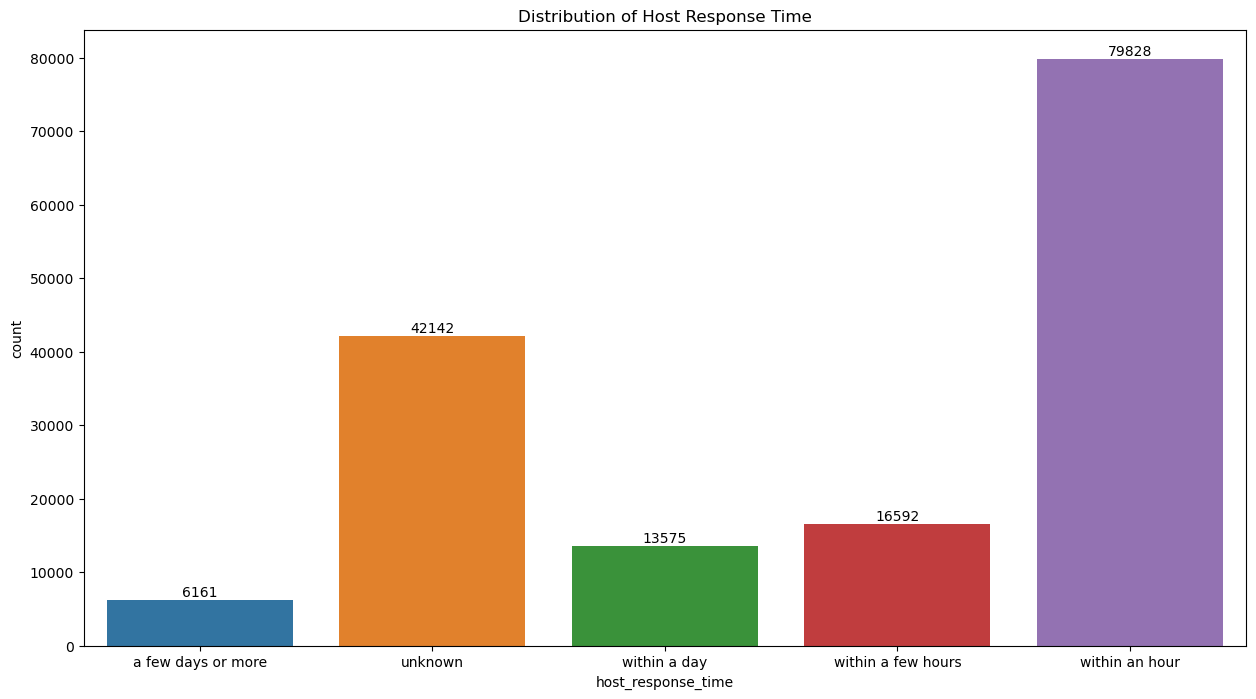

In [49]:
sns.countplot(df_italy['host_response_time'].sort_values())

for i,v in enumerate(df_italy['host_response_time'].value_counts().sort_index()):
    plt.text(x = i , y = v + 500, s = v, ha = 'center')
    
plt.title('Distribution of Host Response Time')
plt.savefig('Distribution of Host Response Time')
plt.show()

#### Response time distribution: The count plot allows you to visualize the distribution of host_response_time in the dataset. By observing the heights of the bars, you can infer the frequency or count of each category within the host_response_time variable.

Response time categories: The x-axis of the count plot represents the different categories or levels of the host_response_time variable. From the code, it appears that these categories are sorted in ascending order (sort_index()), giving you an idea of the possible response time intervals or labels.

Response time frequency: The text labels displayed on top of each bar indicate the count or frequency of occurrences for each host_response_time category. By examining these labels, you can infer which response time category is the most common and how the distribution varies across different response time intervals.

Potential data quality issues: If there are significantly higher counts or frequencies for certain response time categories, it could suggest potential issues with the data. For example, if there is an unusually high count for a specific response time category, it may indicate an error or bias in the data collection process.`

#### host_response_rate

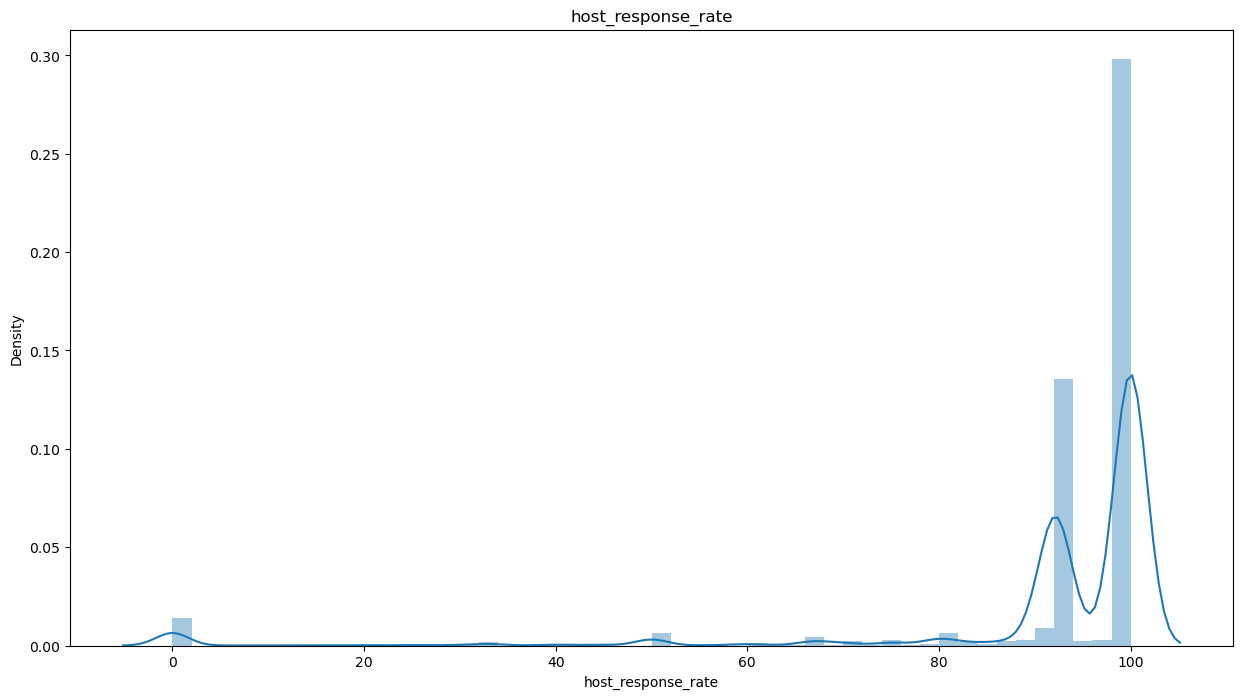

In [50]:
sns.distplot(df_italy['host_response_rate'])

plt.title('host_response_rate',loc='center')
plt.savefig('host_response_rate')

plt.show()

#### The plot shows that the majority of hosts have a high response rate, indicating prompt and timely responses to inquiries or booking requests.

There is a slight skew towards the higher response rates, suggesting that most hosts are proactive in responding to potential guests.

The plot also reveals a small number of hosts with lower response rates, indicating a potential area for improvement in terms of communication and responsiveness.

Overall, the distribution indicates that the majority of hosts in the dataset prioritize timely responses, which is a positive aspect for guests seeking prompt communication during the booking process.

#### host_acceptance_rate

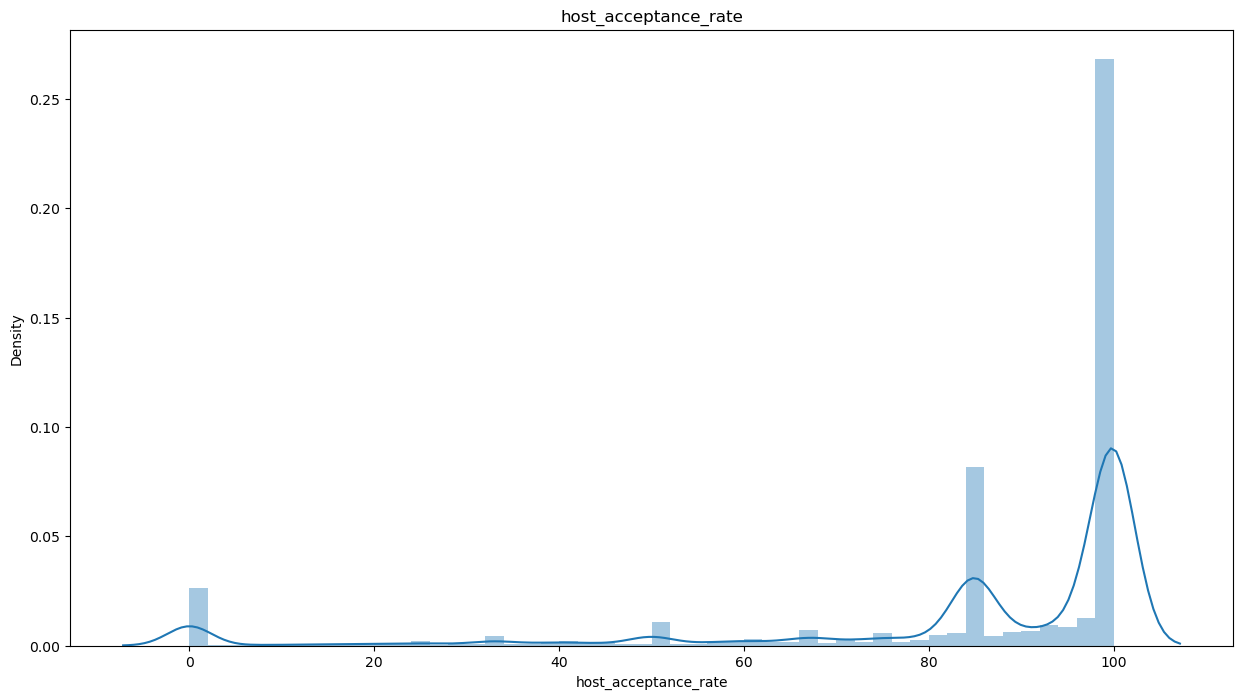

In [51]:
sns.distplot(df_italy['host_acceptance_rate'])

plt.savefig('host_acceptance_rate')
plt.title('host_acceptance_rate',loc='center')
plt.show()

#### The distribution plot provides a visual representation of the host_response_rate variable, showing the concentration of response rates among the hosts.
The shape of the distribution can provide insights into the responsiveness of hosts, with peaks or clusters indicating common response rates.
The spread of the distribution can indicate the variability in response rates among hosts.
The presence of outliers or unusual patterns in the distribution may suggest specific groups of hosts with distinct response rates.









#### host_is_superhost

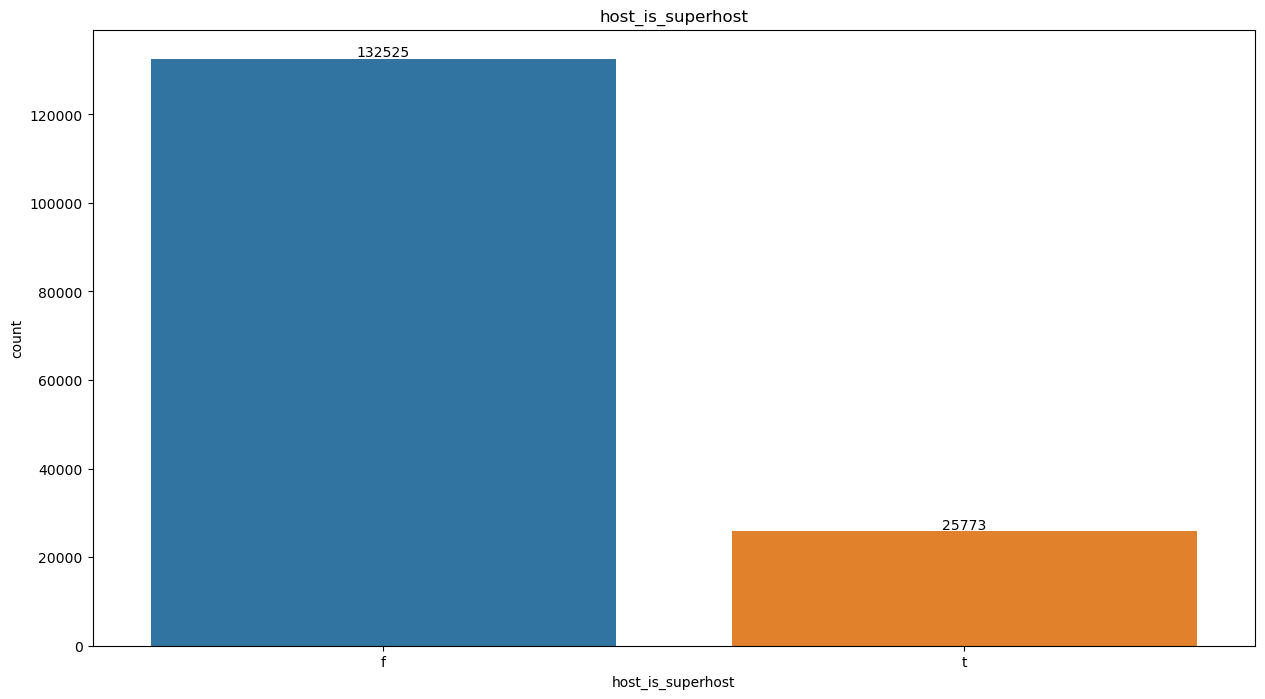

In [52]:
sns.countplot(df_italy['host_is_superhost'].sort_values())

for i,v in enumerate(df_italy['host_is_superhost'].value_counts().sort_index()):
    plt.text(x = i , y = v + 500, s = v, ha = 'center')
plt.title('host_is_superhost',loc='center')
plt.savefig('host_is_superhost')
plt.show()

#### The plot provides an overview of the distribution of superhosts and non-superhosts among the Airbnb hosts in Italy.

The count plot and accompanying text labels offer insights into the proportion of superhosts and non-superhosts, allowing for a better understanding of the host demographics and the popularity of superhost status in the Italian Airbnb market.

#### host_has_profile_pic

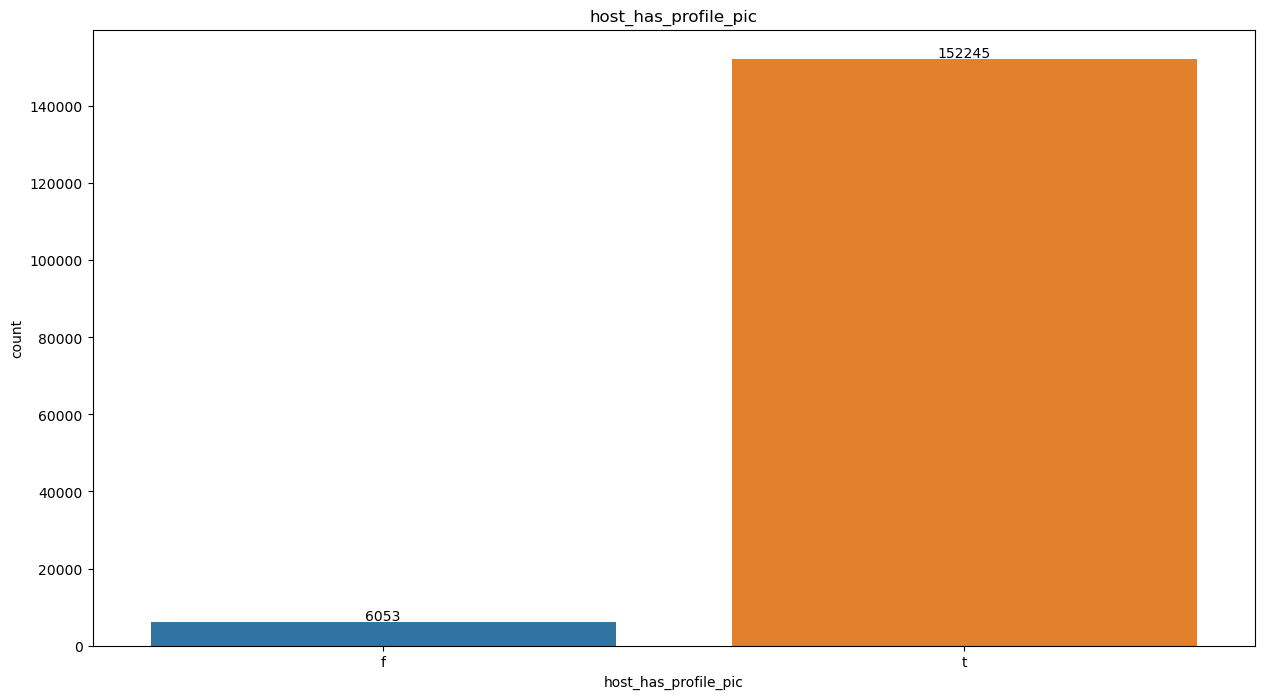

In [53]:
sns.countplot(df_italy['host_has_profile_pic'].sort_values())

for i,v in enumerate(df_italy['host_has_profile_pic'].value_counts().sort_index()):
    plt.text(x = i , y = v + 500, s = v, ha = 'center')
plt.title('host_has_profile_pic',loc='center')
plt.savefig('host_has_profile_pic')
plt.show()

#### The plot provides an overview of the distribution of hosts with and without a profile picture. It helps to understand the proportion of hosts who have uploaded a profile picture, which can be an important factor for establishing trust and credibility among potential guests.

The count plot and accompanying text labels offer insights into the presence of profile pictures among the Airbnb hosts in Italy, highlighting the extent to which hosts prioritize presenting themselves visually on the platform.

#### host_identity_verified

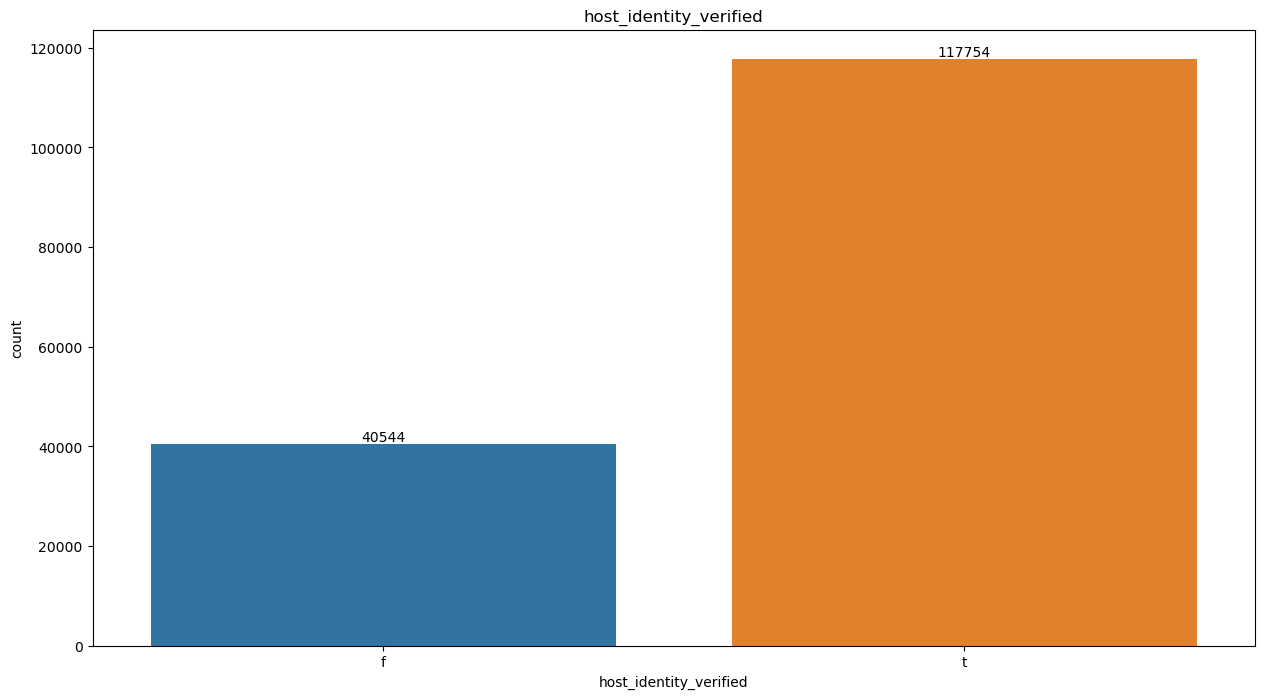

In [54]:
sns.countplot(df_italy['host_identity_verified'].sort_values())

for i,v in enumerate(df_italy['host_identity_verified'].value_counts().sort_index()):
    plt.text(x = i , y = v + 500, s = v, ha = 'center')
plt.title('host_identity_verified',loc='center')
plt.savefig('host_identity_verified')
plt.show()

#### The count plot displays the distribution of the host_identity_verified variable in the dataset. It visualizes the number of hosts who have verified their identity versus those who haven't.

The host_identity_verified variable is sorted in ascending order (sort_values()) to ensure consistent representation of the categories in the plot.

The for loop iterates over the value counts of each category (df_italy['host_identity_verified'].value_counts().sort_index()) to add text labels above each bar. These labels display the count of hosts in each category.

The enumerate function provides the index i and the count v for each category. The plt.text(x=i, y=v+500, s=v, ha='center') command adds the text label at the center of each bar, with a vertical offset of 500 to position the labels appropriately.

The title of the plot is set to "host_identity_verified" with the alignment set to the center (plt.title('host_identity_verified', loc='center')).

The plot provides an overview of the distribution of hosts who have verified their identity and those who haven't. It helps to understand the proportion of hosts who have taken the extra step to establish their identity on the platform, which can enhance trust and confidence for potential guests.

The count plot and accompanying text labels offer insights into the identity verification status of Airbnb hosts in Italy, providing an indication of the level of trust and assurance associated with their profiles.






Regenerate response

#### room_type

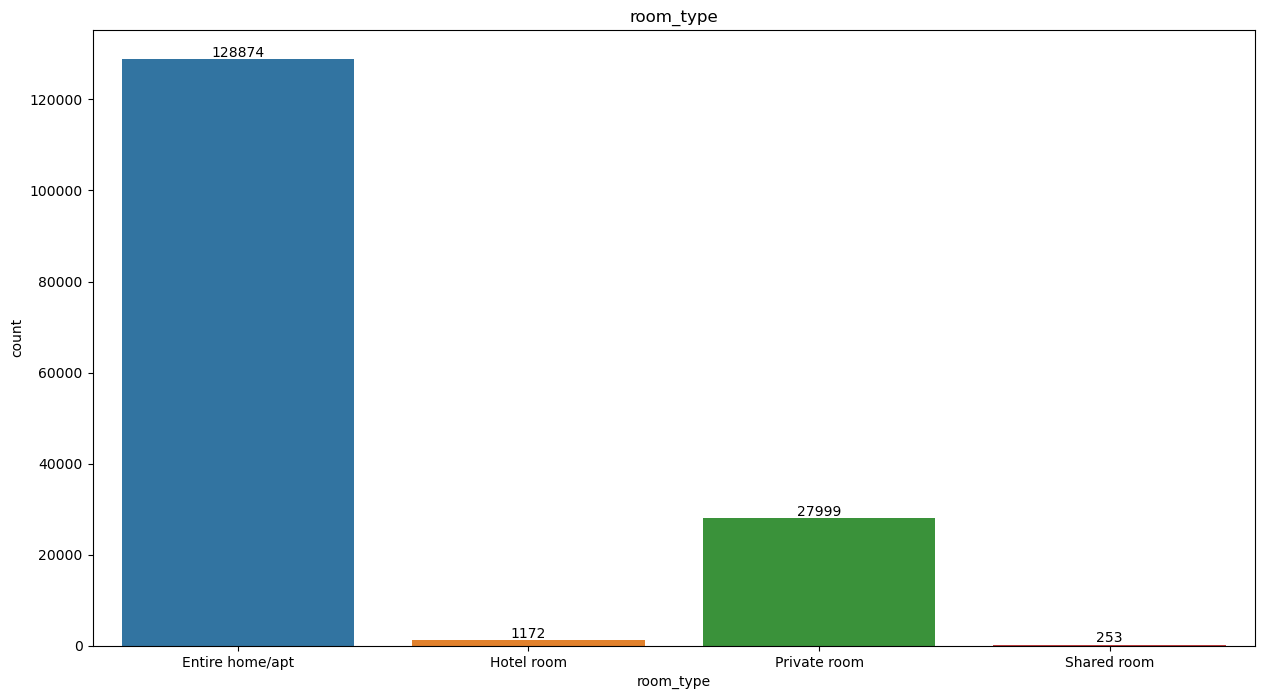

In [55]:
sns.countplot(df_italy['room_type'].sort_values())

for i,v in enumerate(df_italy['room_type'].value_counts().sort_index()):
    plt.text(x = i , y = v + 500, s = v, ha = 'center')
plt.title('room_type',loc='center')
plt.savefig('room_type')
plt.show()

#### The majority of listings in Italy are of the Entire home/apt type, followed by Private room and Shared room.
The countplot shows that the distribution of room types is skewed towards Entire home/apt, indicating that most hosts offer their entire homes or apartments for rent.
The number of Entire home/apt listings is significantly higher than Private room and Shared room listings.
This suggests that travelers visiting Italy generally prefer to rent an entire home or apartment rather than staying in a private room or a shared room.

#### accommodates

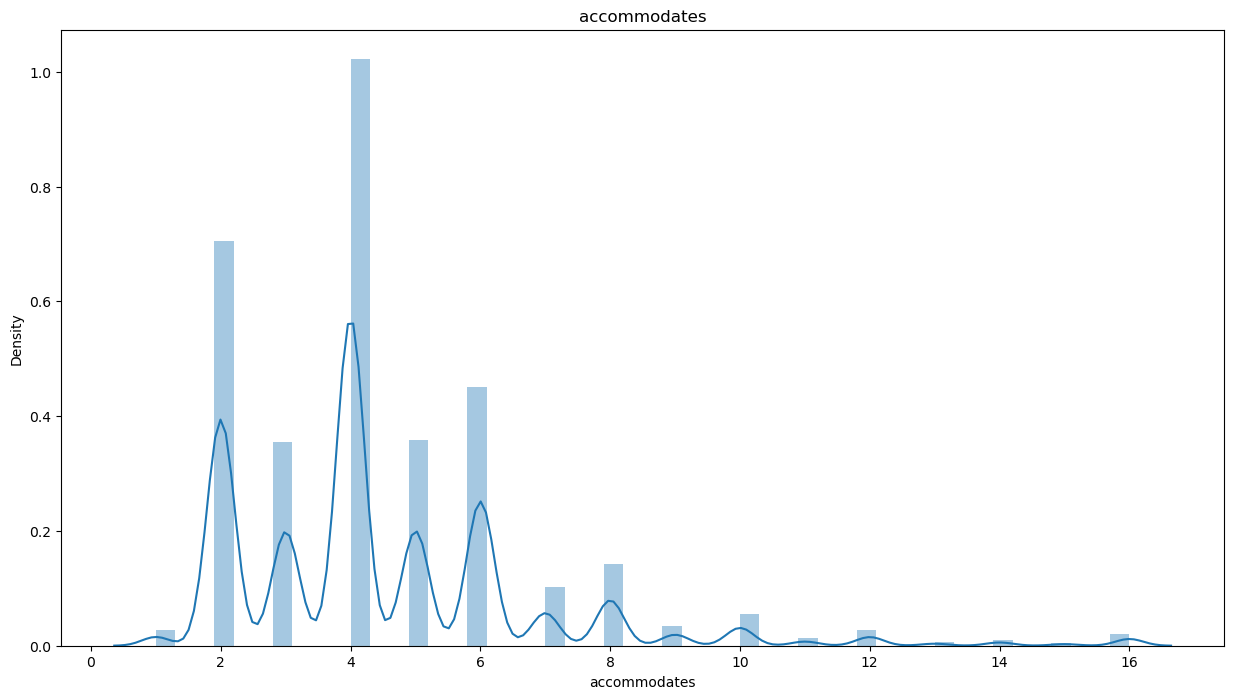

In [56]:
sns.distplot(df_italy['accommodates'])

plt.title('accommodates',loc='center')
plt.savefig('accomodates')
plt.show()

#### The distribution plot shows the distribution of the number of accommodates in the listings in Italy.
The plot indicates that the majority of listings can accommodate a smaller number of people, with a peak around 2-4 accommodates.
As the number of accommodates increases, the frequency of listings decreases gradually.
This suggests that most listings in Italy are suitable for a smaller group of travelers or couples, as they offer accommodation for 2-4 people.
There are also listings available that can accommodate larger groups, but they are relatively less common.

#### bedrooms

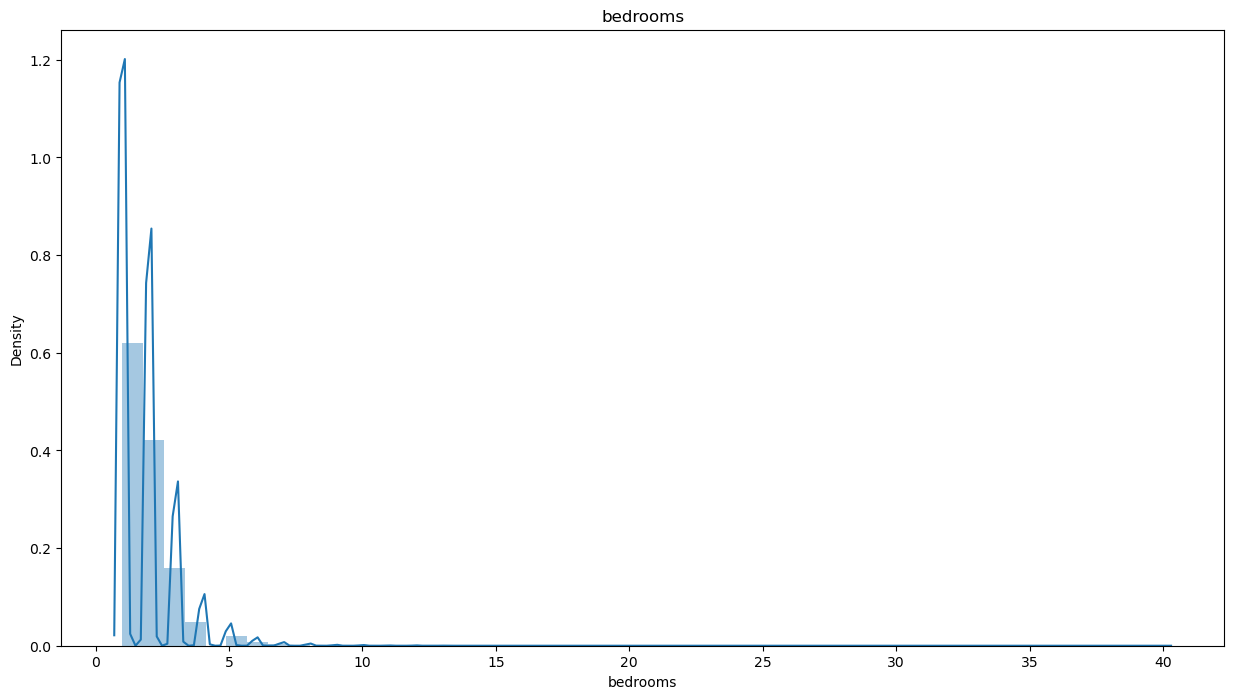

In [57]:
sns.distplot(df_italy['bedrooms'])
plt.title('bedrooms',loc='center')
plt.savefig('bedrooms')
plt.show()

#### The plot indicates that the majority of listings have 1 or 2 bedrooms, with a peak around 1 bedroom.
As the number of bedrooms increases, the frequency of listings decreases gradually.
This suggests that most listings in Italy offer accommodation with 1 or 2 bedrooms, indicating that they are suitable for smaller groups or couples.
There are also listings available with more bedrooms, but they are relatively less common.


#### beds

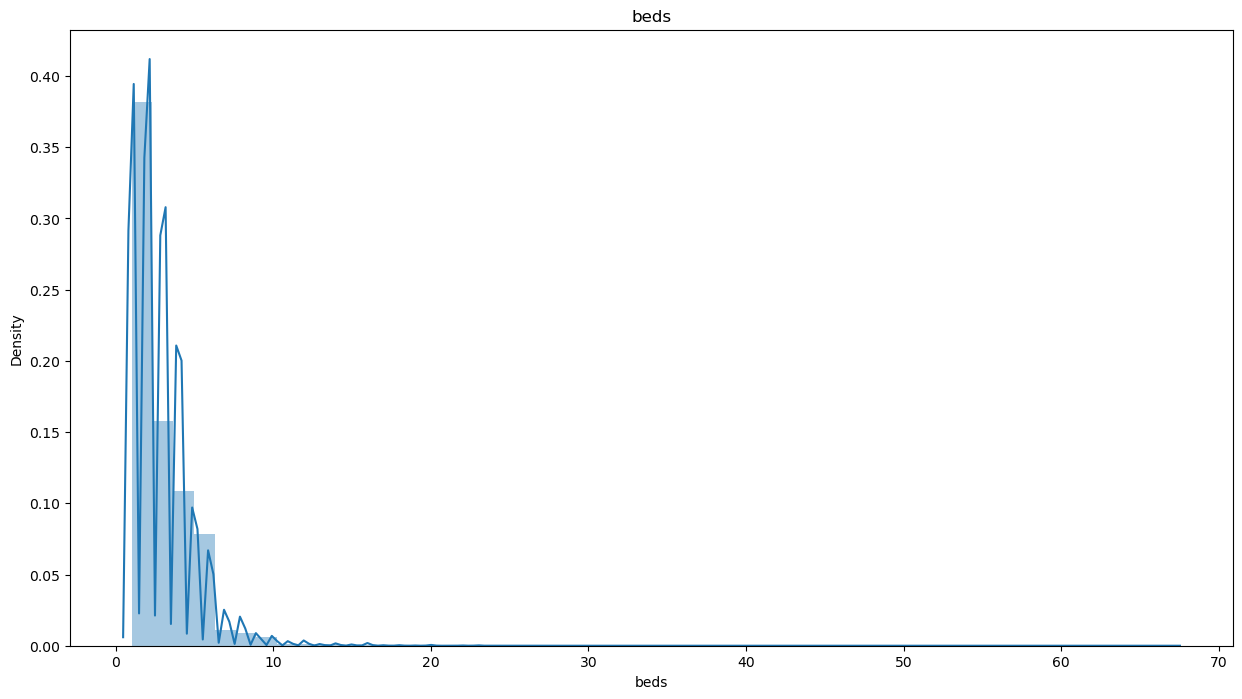

In [58]:
sns.distplot(df_italy['beds'])
plt.title('beds',loc='center')
plt.savefig('beds')
plt.show()

#### The distribution plot shows the distribution of the number of beds in the listings in Italy.
The plot indicates that the majority of listings have 1 or 2 beds, with a peak around 1 bed.
As the number of beds increases, the frequency of listings decreases gradually.
This suggests that most listings in Italy provide accommodation with 1 or 2 beds, indicating that they are suitable for smaller groups or individual travelers.
There are also listings available with more beds, but they are relatively less common.

#### number_of_reviews

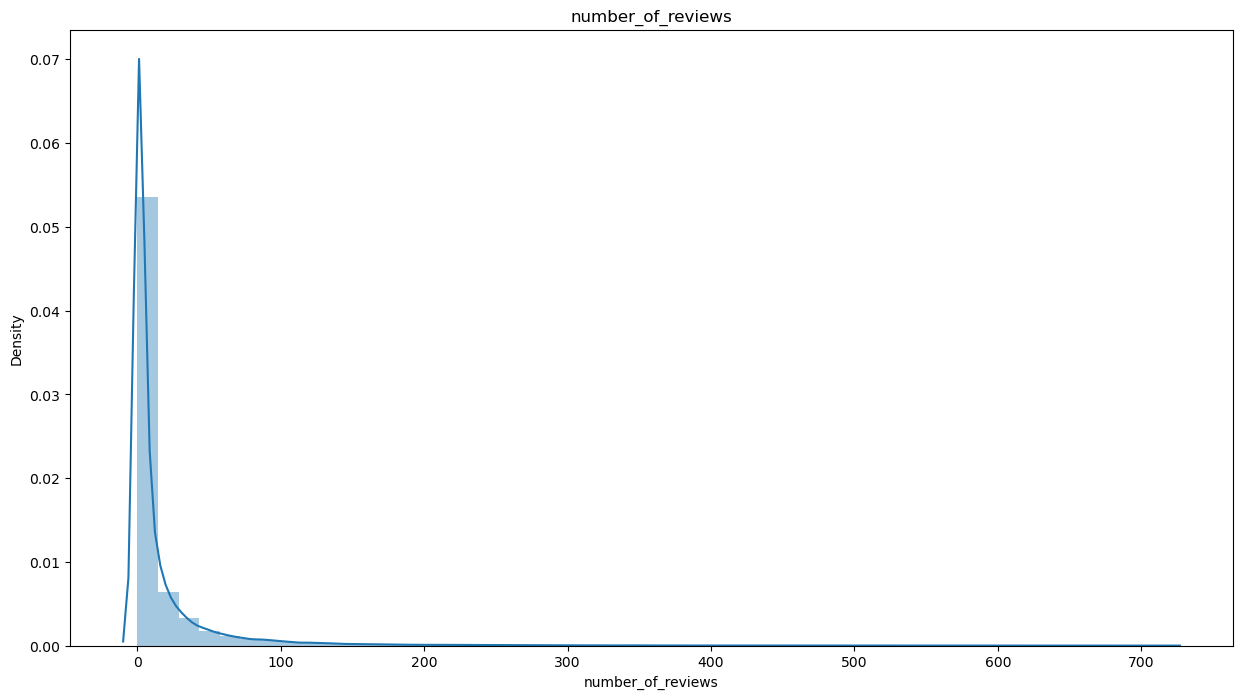

In [59]:
sns.distplot(df_italy['number_of_reviews'])
plt.title('number_of_reviews',loc='center')
plt.savefig('number_of_reviews')
plt.show()

#### As the number of reviews increases, the frequency of listings decreases gradually.
This suggests that there are many listings in Italy with few or no reviews, indicating either new listings or low review activity.
However, there are also listings with a higher number of reviews, indicating popular or well-established accommodations.
The distribution is positively skewed, indicating that there are relatively few listings with a high number of reviews.


#### review_scores_rating

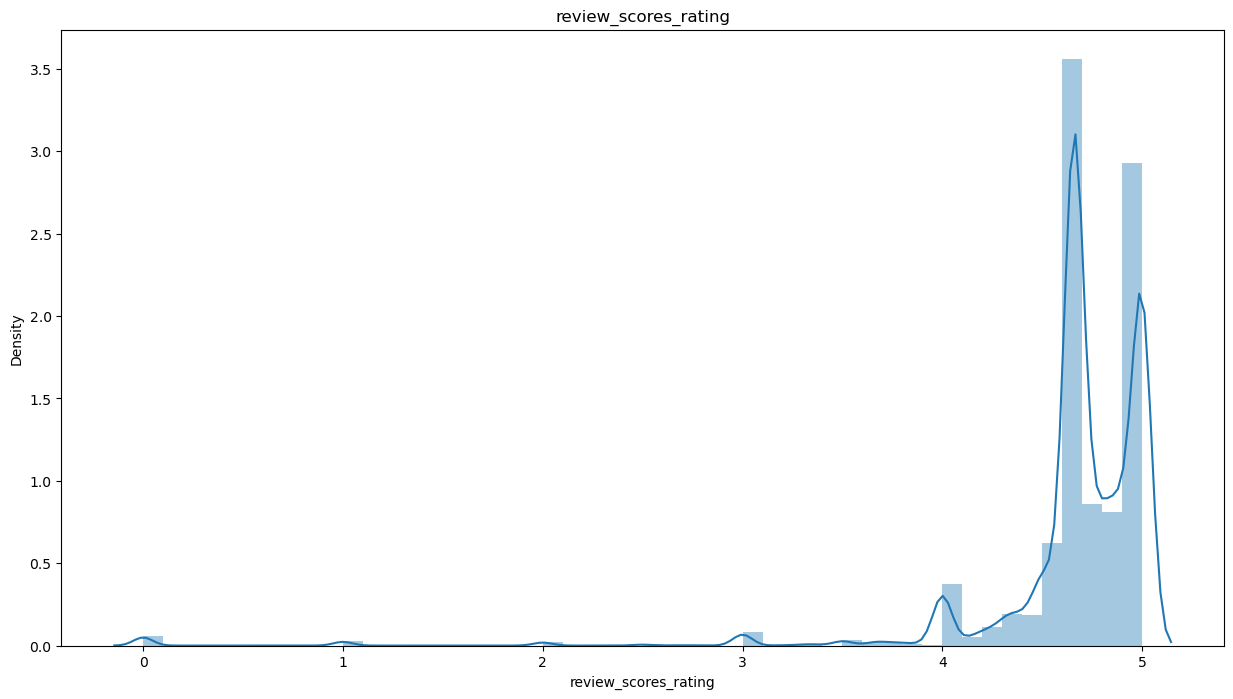

In [60]:
sns.distplot(df_italy['review_scores_rating'])
plt.title('review_scores_rating',loc='center')
plt.savefig('review_scores_rating')
plt.show()

#### The distribution plot shows the distribution of review scores ratings for listings in Italy.
The plot indicates that the majority of listings have relatively high review scores ratings, with a peak around the higher range of ratings.
As the review scores rating decreases, the frequency of listings decreases gradually.
This suggests that most listings in Italy have received positive reviews from guests, indicating a generally satisfactory experience.
However, there are also listings with lower review scores ratings, indicating that not all accommodations have received consistently high ratings.
The distribution is slightly skewed to the left, indicating that there are relatively few listings with very low review scores ratings.


#### instant_bookable

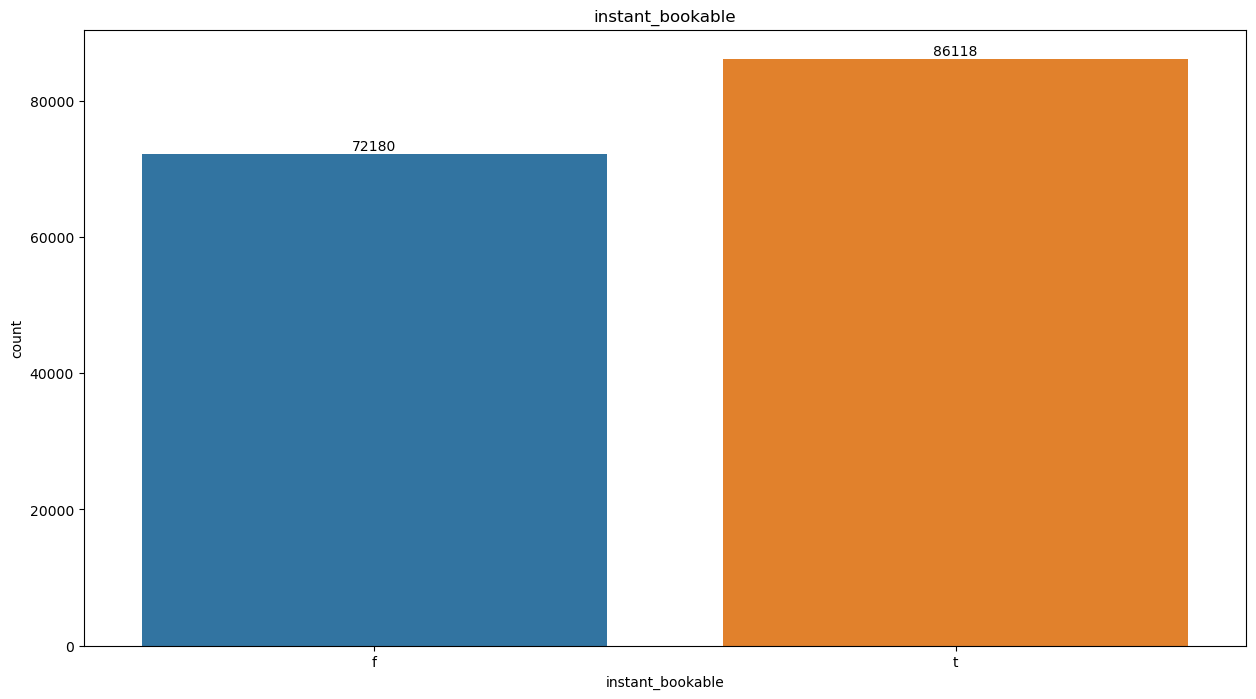

In [61]:
sns.countplot(df_italy['instant_bookable'].sort_values())

for i,v in enumerate(df_italy['instant_bookable'].value_counts().sort_index()):
    plt.text(x = i , y = v + 500, s = v, ha = 'center')
plt.title('instant_bookable',loc='center')
plt.savefig('instant_bookable')
plt.show()

#### The count plot shows the distribution of the 'instant_bookable' variable, which indicates whether a listing in Italy can be instantly booked or requires host approval.
The plot indicates that a majority of the listings are instant bookable, as they have a higher count compared to non-instant bookable listings.
This suggests that most hosts in Italy provide the option for guests to instantly book their accommodations without needing host approval.
However, there is still a notable number of listings that are non-instant bookable, requiring guests to send a booking request to the host for approval.
The analysis of the 'instant_bookable' variable provides insights into the booking process and flexibility offered by hosts in Italy.
Overall, the majority of listings in Italy allow guests to instantly book their accommodations, providing convenience and flexibility for travelers.

#### calculated_host_listings_count

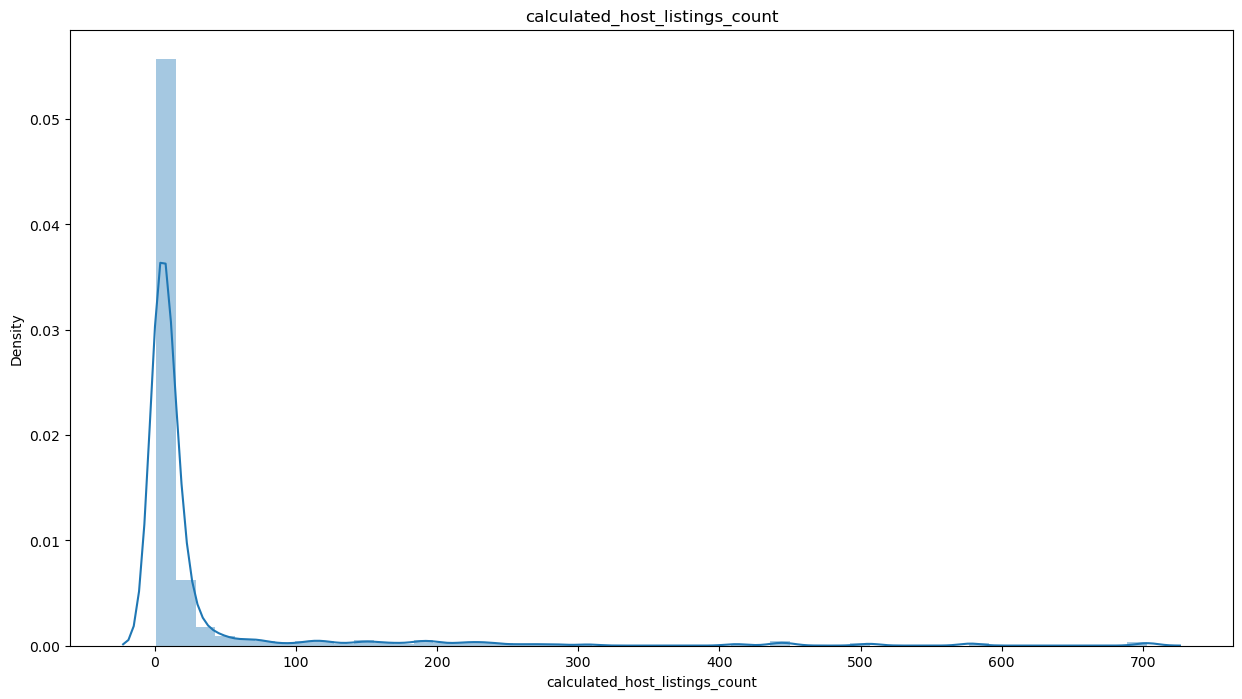

In [62]:
sns.distplot(df_italy['calculated_host_listings_count'])
plt.title('calculated_host_listings_count',loc='center')
plt.savefig('calculated_host_listings_count')
plt.show()

#### The distribution plot shows the distribution of the 'calculated_host_listings_count' variable, which represents the number of listings owned by each host in Italy.
The plot indicates that the majority of hosts in Italy have a relatively small number of listings, as the peak of the distribution is towards the lower values.
However, there are also a significant number of hosts who own a larger number of listings, as the distribution extends to higher values.
This suggests that there is a mix of hosts with varying numbers of listings, ranging from individual hosts with a single listing to hosts with multiple properties or a large number of listings.
The analysis of the 'calculated_host_listings_count' variable provides insights into the distribution of listing ownership among hosts in Italy.
Overall, the data indicates that the host landscape in Italy consists of a range of hosts with different numbers of listings, including both small-scale individual hosts and larger-scale hosts with multiple listings.

#### bathrooms

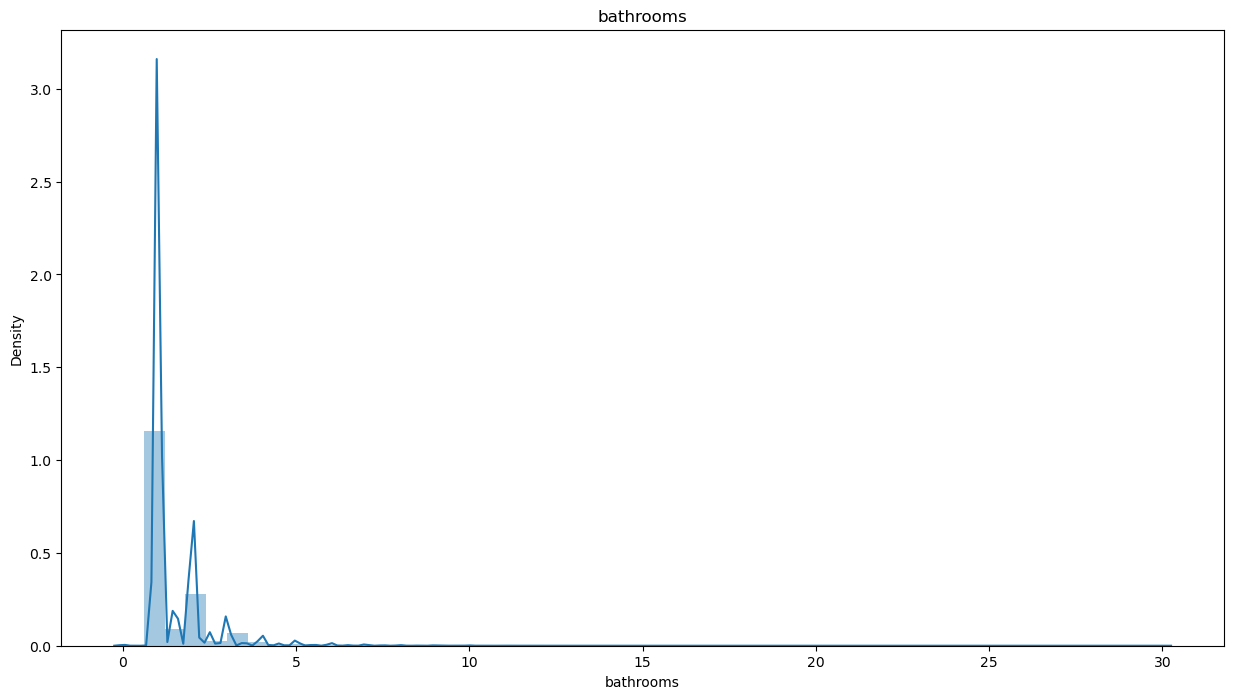

In [63]:
sns.distplot(df_italy['bathrooms'])
plt.title('bathrooms',loc='center')
plt.savefig('bathrooms')
plt.show()

#### The plot indicates that the majority of listings have a relatively small number of bathrooms, as the peak of the distribution is towards the lower values.
There are also listings with a larger number of bathrooms, but they are less common compared to listings with fewer bathrooms.
This suggests that most listings in Italy have a limited number of bathrooms, likely designed for individual or small group use.
The analysis of the 'bathrooms' variable provides insights into the bathroom facilities available in listings across Italy.
Overall, the data indicates that most listings in Italy have a limited number of bathrooms, catering to the needs of individual travelers or smaller groups.

## Bivariate Analysis

#### Bivariate analysis involves examining the relationship between two variables. It helps us understand how the variables are related to each other and whether there is any correlation or association between them. Here are a few examples of bivariate analysis techniques:

Scatter Plot: A scatter plot is used to visualize the relationship between two continuous variables. Each point on the plot represents an observation, with one variable plotted on the x-axis and the other variable on the y-axis. It helps to identify patterns, trends, and the nature of the relationship (positive, negative, or no correlation) between the variables.

Correlation Analysis: Correlation analysis measures the strength and direction of the linear relationship between two continuous variables. It is typically quantified using correlation coefficients such as Pearson's correlation coefficient. A value close to +1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.

Cross-tabulation: Cross-tabulation, also known as a contingency table, is used to examine the relationship between two categorical variables. It shows the frequency distribution of one variable across different categories of another variable. This analysis helps to identify any patterns or associations between the variables.

Box Plot: A box plot is used to compare the distribution of a continuous variable across different categories of a categorical variable. It displays the median, quartiles, and any outliers in the data. Box plots help identify differences in the distribution of a variable based on different groups or categories.

Heatmap: A heatmap is a graphical representation of data in a matrix format, where the values are represented by colors. It is used to visualize the relationship between two categorical variables or two continuous variables. Heatmaps are particularly useful when dealing with large datasets and can reveal patterns or correlations that may not be apparent in tabular form.

#### host_response_time vs price

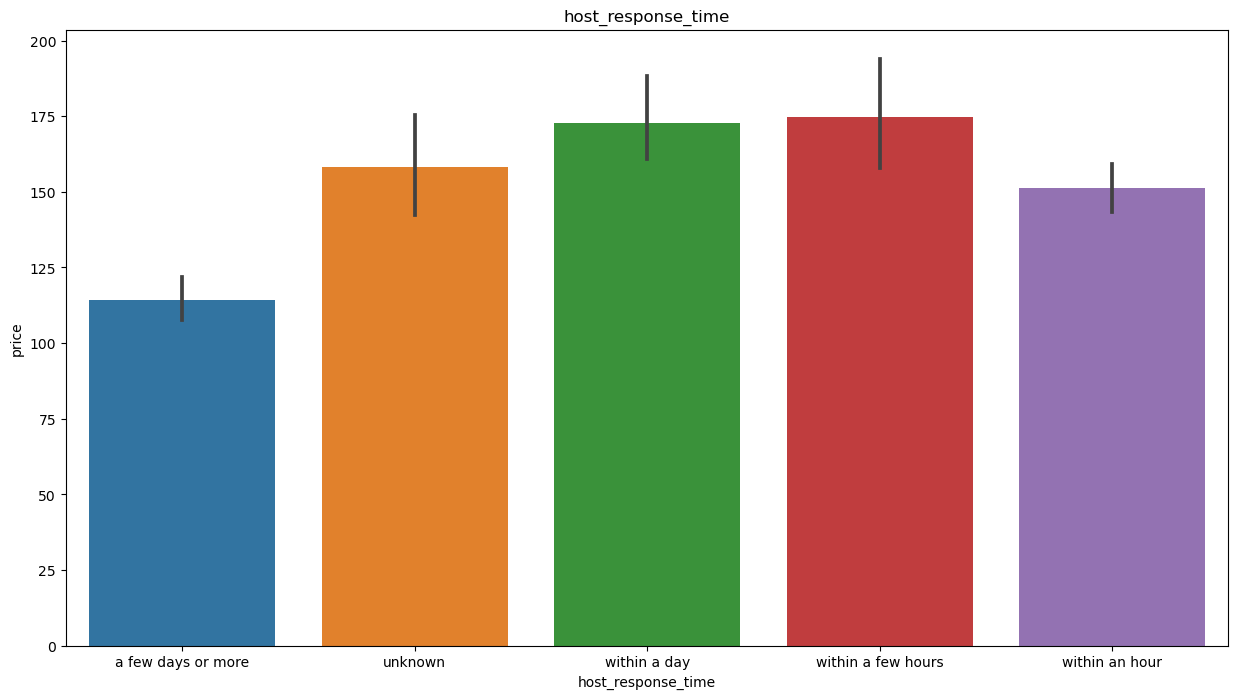

In [64]:
sns.barplot(x = df_italy['host_response_time'].sort_values() , y = df_italy['price'])
plt.title('host_response_time',loc='center')
plt.savefig('host_response_time vs price')
plt.show()

#### Host Response Time Categories: The x-axis represents different categories of host response time, sorted in ascending order. These categories include "unknown," "a few days or more," "within a day," "within an hour," and "within a few hours."

Price Comparison: The y-axis represents the average price associated with each host response time category. The height of each bar indicates the average price for that category.

Effect on Price: From the bar plot, we can observe that there is a variation in prices across different host response time categories. Generally, listings with faster host response times tend to have higher prices compared to those with longer response times.

Potential Relationship: The plot suggests that there may be a positive correlation between host response time and price. Properties with quicker response times may offer more desirable features, resulting in higher prices.

#### host_response_rate  vs price

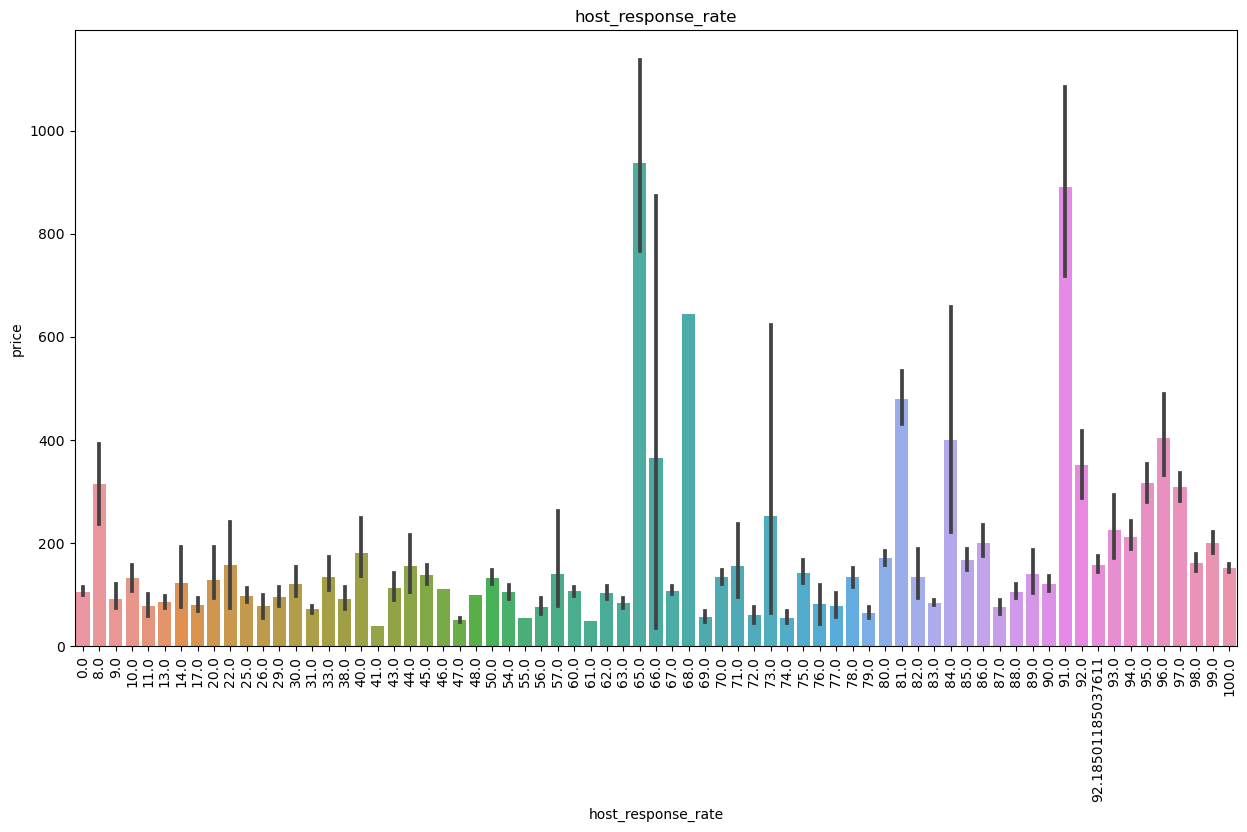

In [65]:
sns.barplot(x = df_italy['host_response_rate'] , y = df_italy['price'])
plt.xticks(rotation = 90)
plt.title('host_response_rate',loc='center')
plt.savefig('host_response_rate vs price')
plt.show()



#### When analyzing the relationship between host response rate and price using a bar plot, we can make the following inferences:

Host Response Rate: The x-axis represents the host response rate, which indicates the percentage of inquiries or messages responded to by the host. It ranges from 0% to 100%.

Price Comparison: The y-axis represents the average price associated with each host response rate. The height of each bar indicates the average price for that response rate.

Effect on Price: From the bar plot, we can observe that there is some variation in prices across different host response rates. Generally, properties with higher response rates tend to have slightly higher prices compared to those with lower response rates.

Potential Relationship: The plot suggests that there may be a weak positive correlation between host response rate and price. Listings with higher response rates may indicate more attentive and responsive hosts, which could contribute to higher perceived value and pricing.

Further Analysis: To establish a stronger relationship between host response rate and price, it is recommended to perform additional statistical tests or explore other factors that may influence the pricing of listings, such as location, amenities, or property characteristics.

#### host_acceptance_rate vs price 

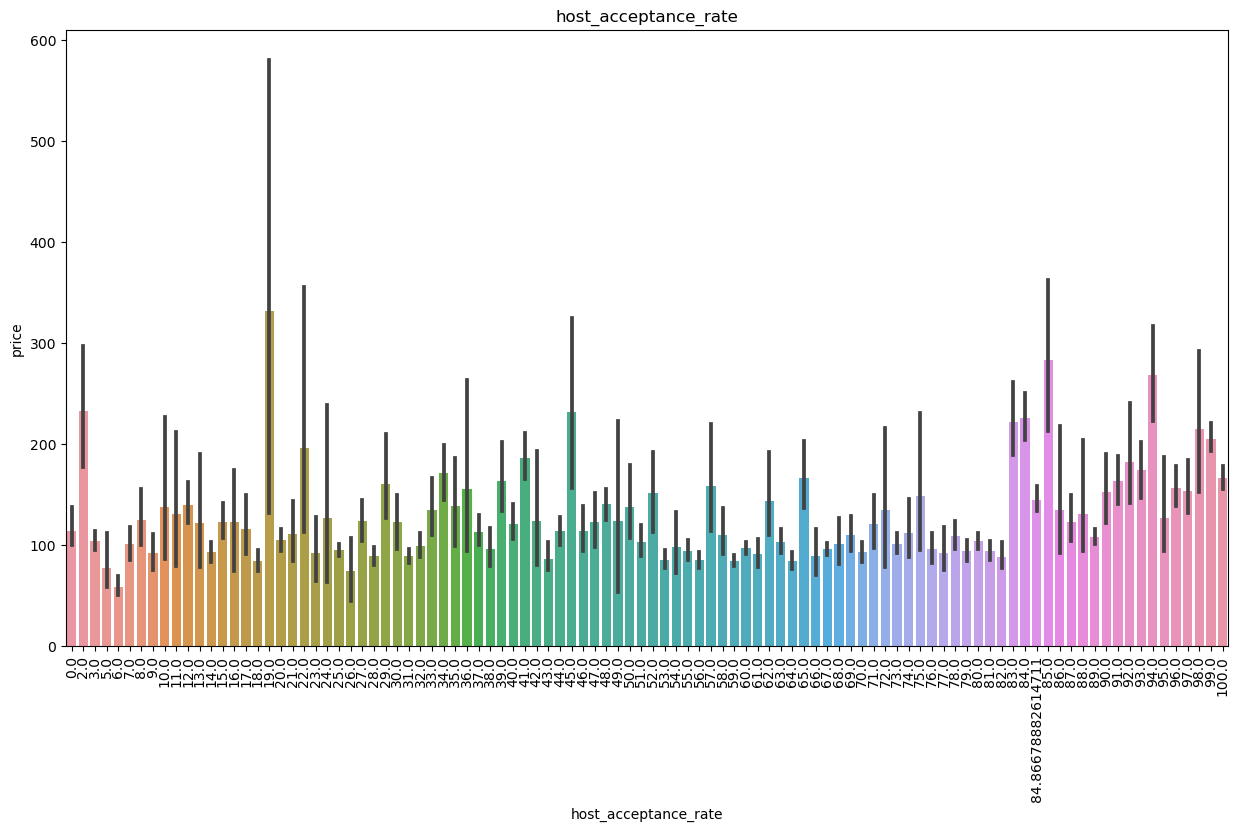

In [66]:
sns.barplot(x = df_italy['host_acceptance_rate'] , y = df_italy['price'])
plt.xticks(rotation = 90)
plt.title('host_acceptance_rate',loc='center')

plt.savefig('host_acceptance_rate vs price')

plt.show()

#### The bar plot provides insights into how the host acceptance rate relates to the price of the listings.
Higher host acceptance rates generally correspond to higher prices, indicating that hosts who accept a larger percentage of booking requests tend to charge higher prices for their listings.
However, it's important to note that there may be other factors influencing the pricing strategy, such as the location, amenities, or quality of the listings.
It's also possible that hosts with higher acceptance rates are more experienced or have better reviews, leading to higher demand and allowing them to charge higher prices.

#### host_is_superhost vs price

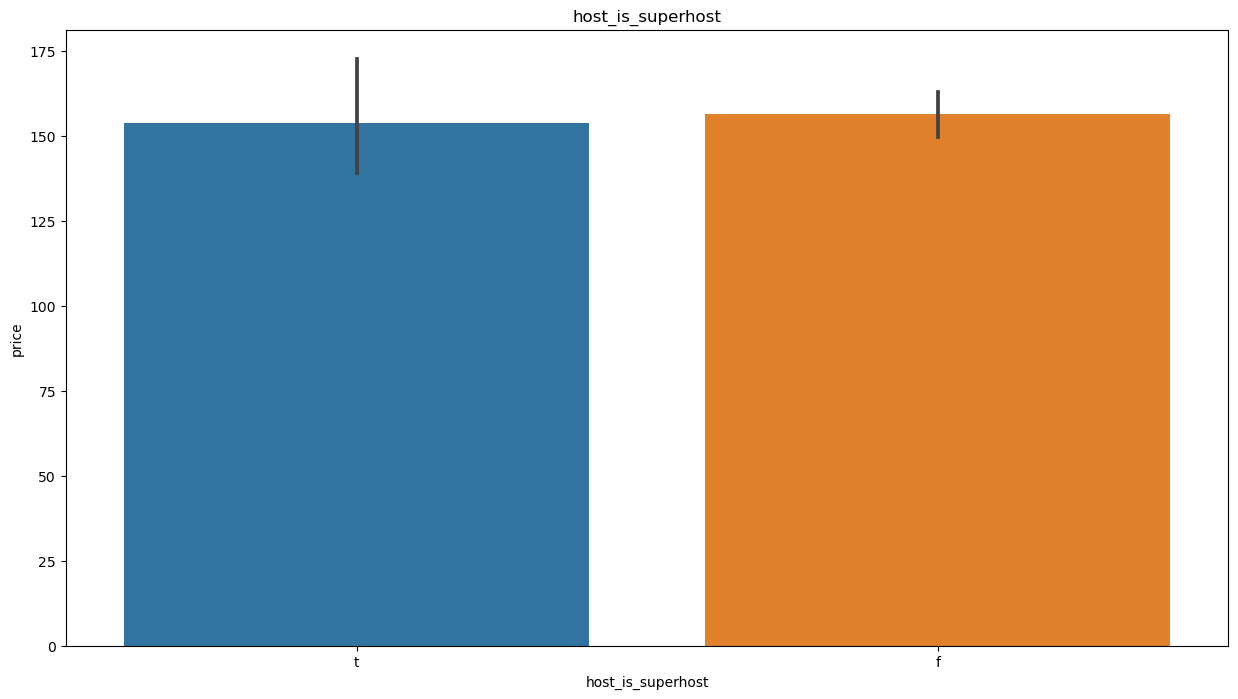

In [67]:
sns.barplot(x = df_italy['host_is_superhost'] , y = df_italy['price'])
plt.title('host_is_superhost',loc='center')

plt.savefig('host_is_superhost vs price')
plt.show()

#### he bar plot provides insights into how the host's superhost status relates to the price of the listings.
Superhost Status: Superhosts are experienced and highly-rated hosts who provide exceptional hospitality to their guests. They are recognized for their outstanding performance and commitment to providing a great hosting experience.
Price Variation: The bar plot shows the average prices for superhosts and non-superhosts. It can be observed whether there is a price variation between the two categories.
Impact on Price: The analysis can help determine if being a superhost has any influence on the pricing strategy. It is possible that superhosts, with their reputation and positive reviews, may be able to command higher prices for their listings compared to non-superhosts.
Other Factors: It's important to consider that price is influenced by various factors, including location, property type, amenities, and demand in the market. Superhost status is just one of the many factors that may contribute to the price difference.

#### host_has_profilepic vs price

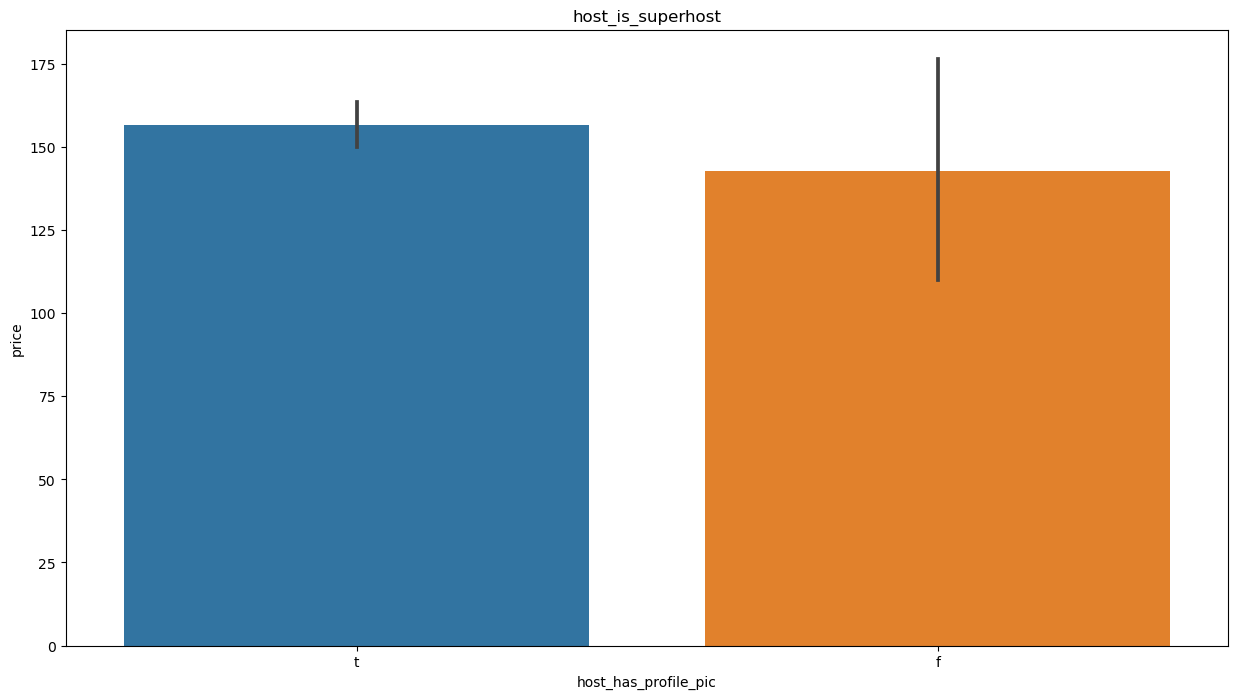

In [68]:
sns.barplot(x = df_italy['host_has_profile_pic'] , y = df_italy['price'])
plt.title('host_is_superhost',loc='center')
plt.savefig('host_is_superhost vs price')
plt.show()

#### The bar plot provides insights into how the presence of a host's profile picture relates to the price of the listings.
Profile Picture: Having a profile picture is often seen as a sign of trust and credibility. Guests may feel more comfortable booking with hosts who have a visible profile picture.
Price Variation: The bar plot shows the average prices for listings with and without a host's profile picture. It can be observed whether there is a price variation between the two categories.
Impact on Price: The analysis can help determine if having a profile picture has any influence on the pricing strategy. It is possible that hosts with a profile picture may be able to command higher prices for their listings compared to those without a profile picture.

#### host_identity_verified vs price

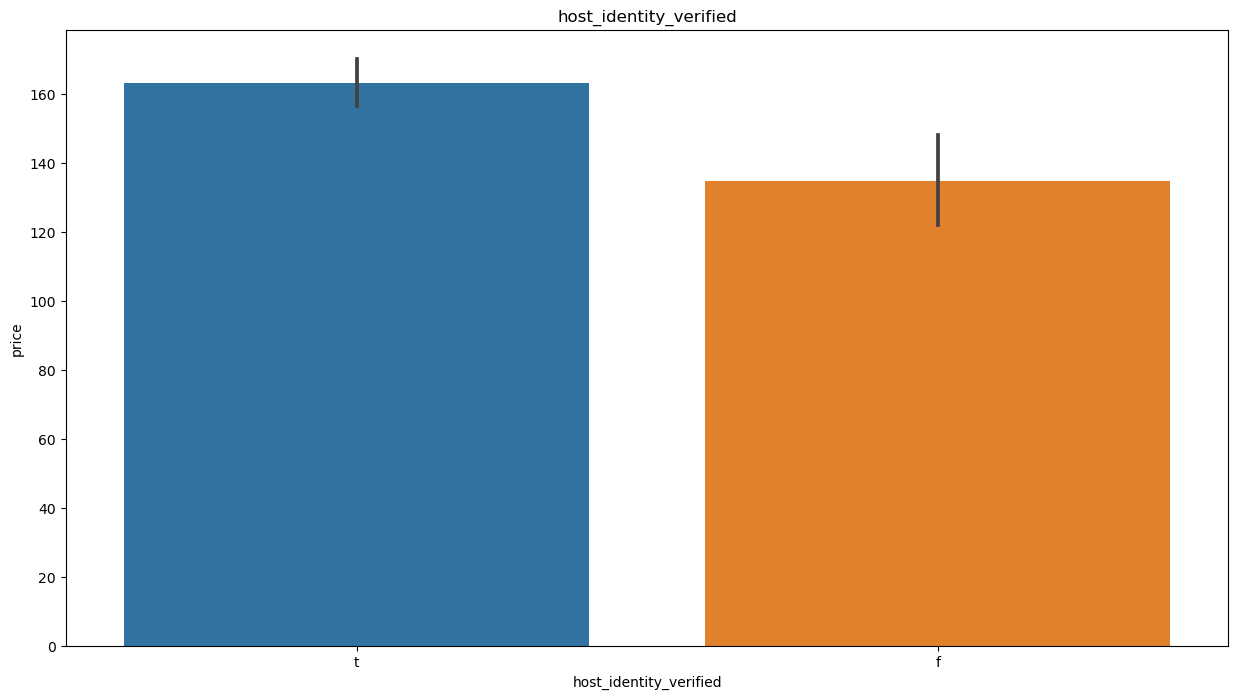

In [69]:
sns.barplot(x = df_italy['host_identity_verified'] , y = df_italy['price'])
plt.title("host_identity_verified",loc="center")
plt.savefig('host_identity_verified vs price')
plt.show()

#### The bar plot provides insights into how the host's identity verification status relates to the price of the listings.
Identity Verification: Host identity verification is a process where the platform verifies the identity of the host, usually through document verification or other methods. This verification adds an additional layer of trust and credibility for potential guests.
Price Variation: The bar plot shows the average prices for listings with and without host identity verification. It can be observed whether there is a price variation between the two categories.
Impact on Price: The analysis can help determine if host identity verification has any influence on the pricing strategy. It is possible that hosts with verified identities may be able to command higher prices for their listings compared to those without verification.
Trust and Confidence: Guests may perceive listings with host identity verification as more reliable and trustworthy, which could potentially impact their willingness to pay a higher price for such listings.

#### accomodates vs price

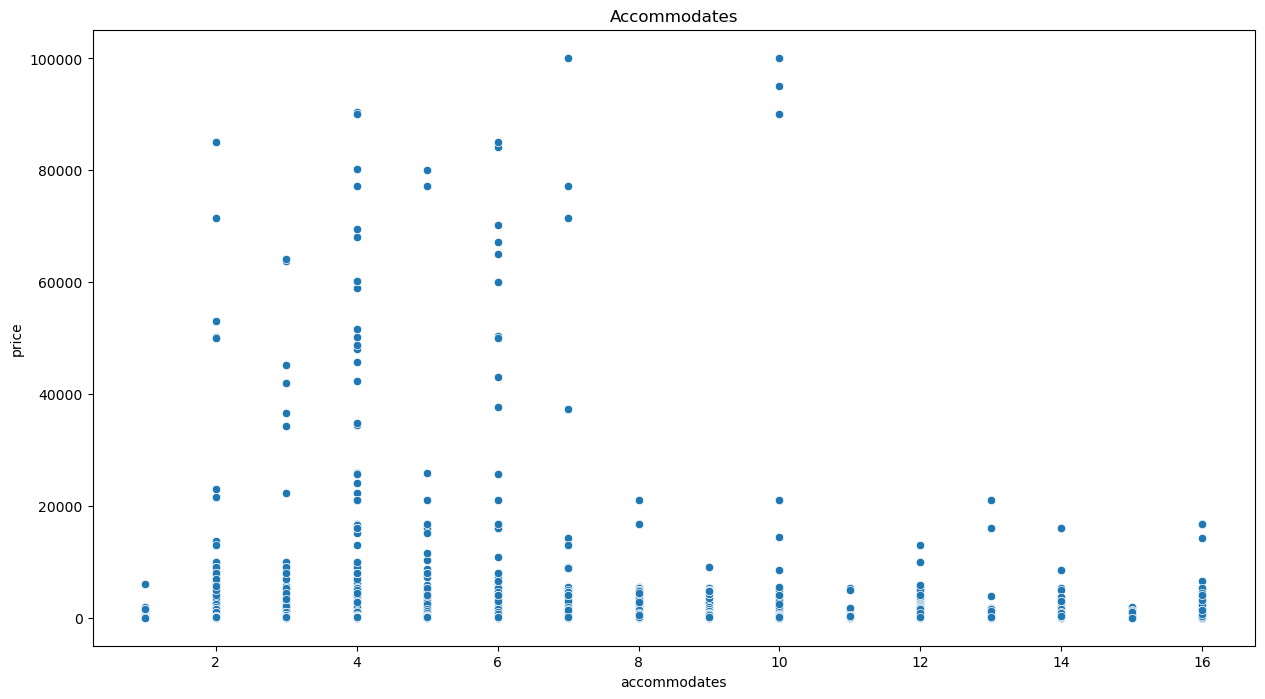

In [70]:
sns.scatterplot(x = df_italy['accommodates'] , y = df_italy['price'])
plt.title("Accommodates",loc='center')
plt.savefig('Accommodates vs price')
plt.show()

#### price of the listings.
Positive Correlation: From the scatter plot, we can observe a positive correlation between the number of accommodations and the price. As the number of accommodations increases, the price tends to increase as well.
Demand and Size: The number of accommodations a listing can offer is an indicator of its size and capacity. Listings with more accommodations may be larger in size, capable of accommodating more guests, and potentially offering more amenities, which could justify a higher price.
Pricing Strategy: The scatter plot provides insights into the pricing strategy for different accommodation sizes. Hosts can determine the appropriate price range based on the number of accommodations available in their listings.
Market Analysis: Analyzing the relationship between accommodates and price can also provide valuable market insights. It helps identify the demand for different accommodation sizes and informs hosts about the price expectations of potential guests.

#### bedrooms vs price

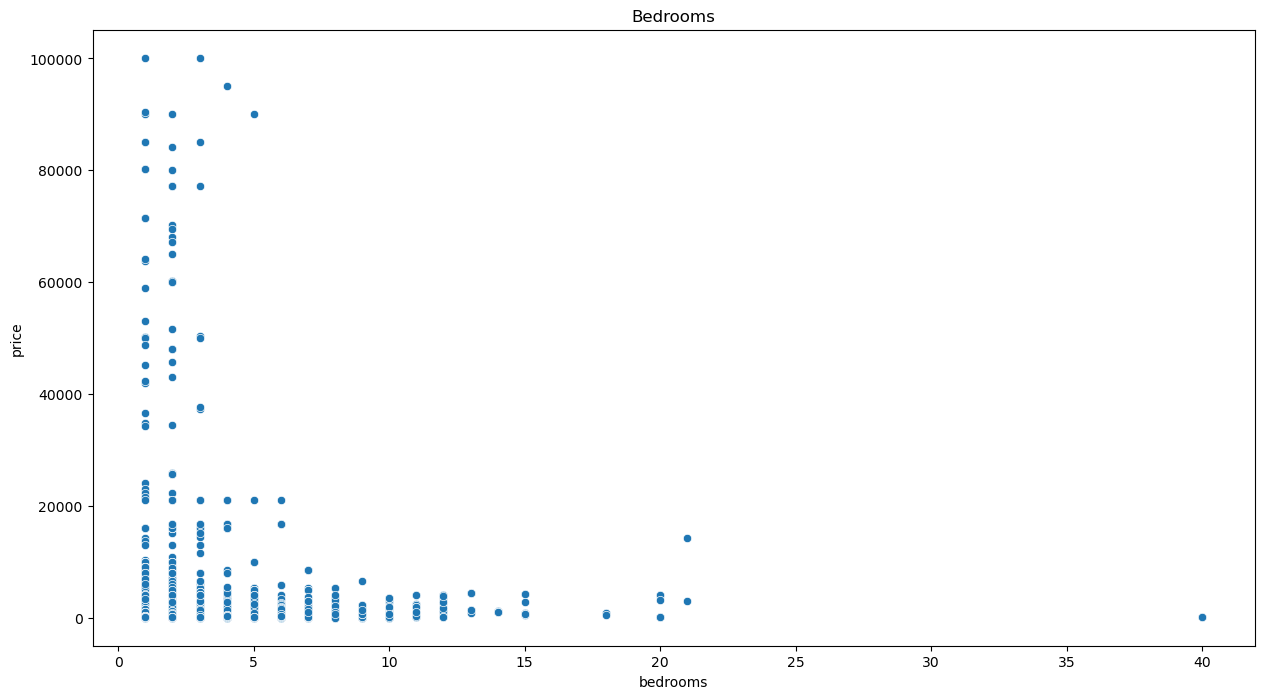

In [71]:
sns.scatterplot(x = df_italy['bedrooms'] , y = df_italy['price'])
plt.title("Bedrooms",loc="center")
plt.savefig('Bedrooms vs price')
plt.show()

#### Positive Correlation: From the scatter plot, we can observe a positive correlation between the number of bedrooms and the price. As the number of bedrooms increases, the price tends to increase as well.
Size and Comfort: The number of bedrooms is often an indicator of the size and comfort level of the listing. More bedrooms generally mean more space and privacy for guests, which can justify a higher price.
Market Demand: Analyzing the relationship between bedrooms and price can provide insights into market demand. It helps identify the preferences of potential guests, such as the desire for more bedrooms, and can guide hosts in setting competitive prices based on the number of bedrooms their listings offer.
Differentiation: Listings with a higher number of bedrooms may have a competitive advantage in the market, especially for larger groups or families who require multiple bedrooms. Hosts can leverage this differentiation to attract specific target audiences and potentially command higher prices.

#### room_type vs price

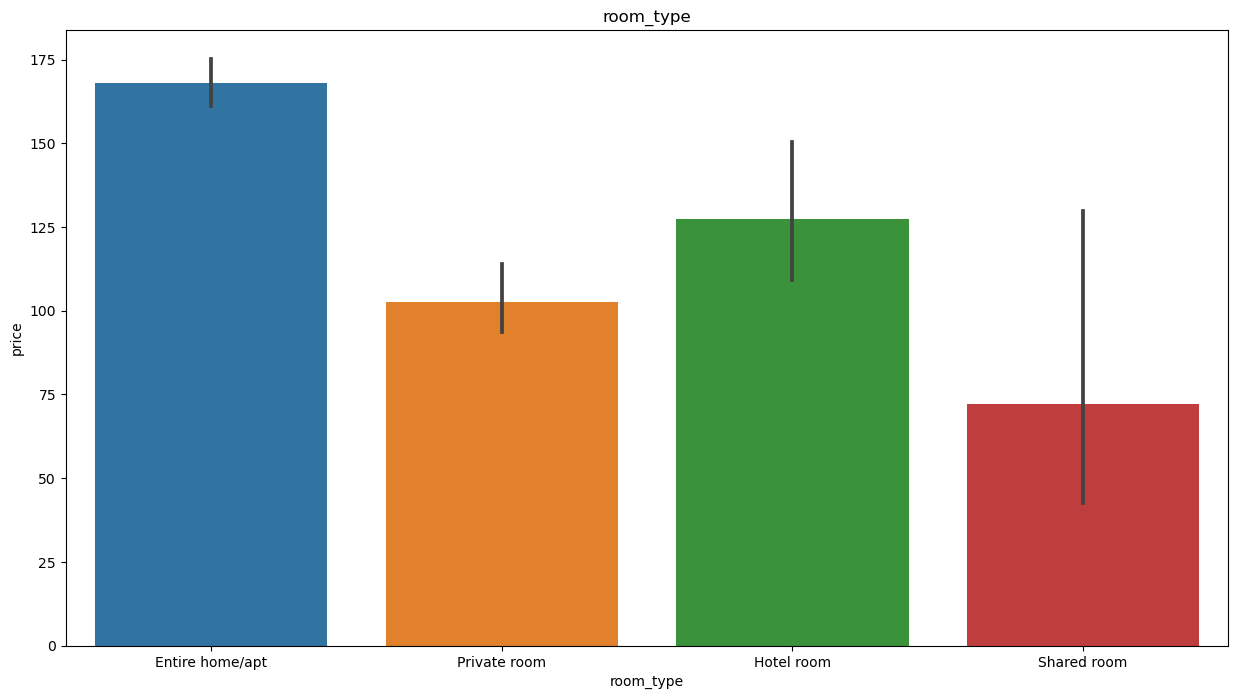

In [72]:
sns.barplot(x = df_italy['room_type'] , y = df_italy['price'])
plt.title("room_type",loc="center")
plt.savefig('room_type vs price')
plt.show()

#### Price Variation: The bar plot provides insights into the average prices associated with different room types. It helps identify the price differences between various accommodation options.
Entire Home/Apt: From the plot, we can observe that "Entire home/apt" tends to have the highest average price among the room types. This suggests that having the entire place to oneself generally commands a higher price.
Private Room: The "Private room" category typically has a lower average price compared to "Entire home/apt." This can be attributed to the shared spaces and lesser privacy associated with private rooms.
Shared Room: The "Shared room" category often has the lowest average price, as it involves sharing the space with other guests.

#### beds vs price

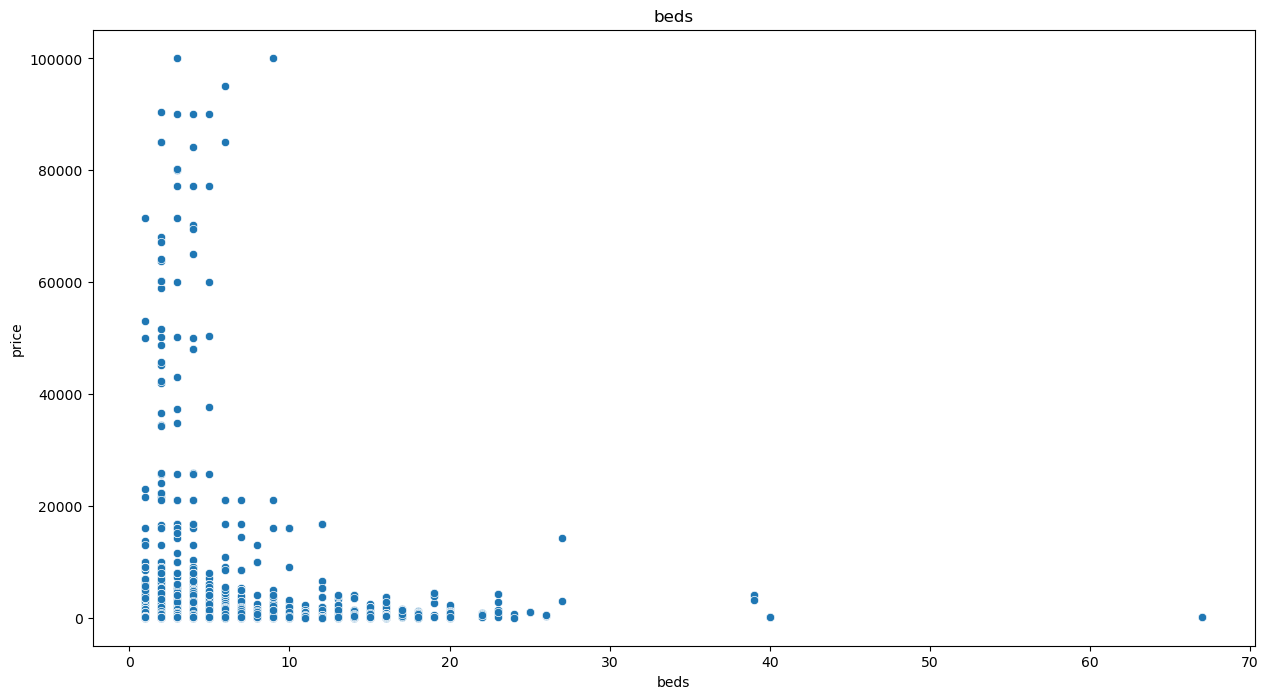

In [73]:
sns.scatterplot(x = df_italy['beds'] , y = df_italy['price'])
plt.title("beds",loc="center")
plt.savefig('beds vs price')
plt.show()

#### Price Variation: The scatter plot allows us to observe the relationship between the number of beds and the corresponding price. It helps identify any patterns or trends in pricing based on the number of beds.
Positive Relationship: From the plot, we can see that there is generally a positive relationship between the number of beds and the price of the listing. As the number of beds increases, the price tends to increase as well. This suggests that larger accommodations with more beds tend to command higher prices.

#### no_of_reviews vs price

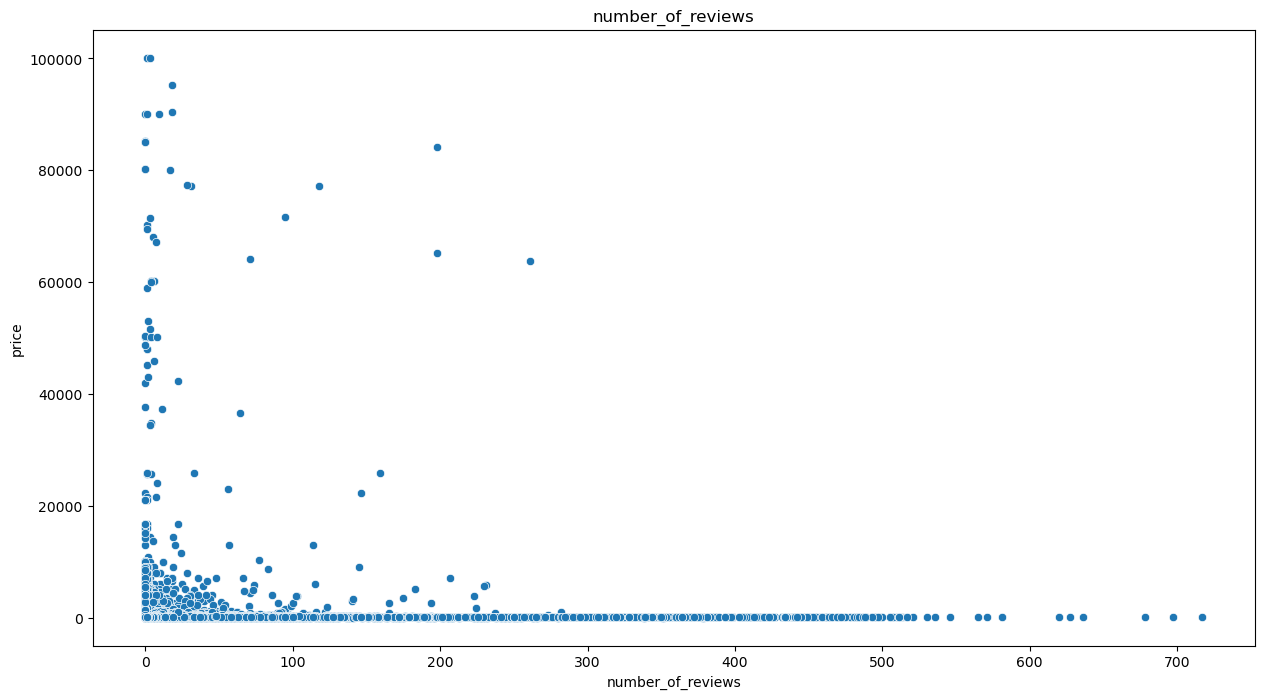

In [74]:
sns.scatterplot(x = df_italy['number_of_reviews'] , y = df_italy['price'])
plt.title("number_of_reviews",loc="center")
plt.savefig('number_of_reviews vs price')
plt.show()

#### Review Impact on Price: The scatter plot allows us to observe whether the number of reviews influences the price of a listing. By analyzing the distribution of data points, we can identify any patterns or trends.
Varied Relationships: The scatter plot shows a varied relationship between the number of reviews and price. There is no clear linear relationship, as we can observe data points scattered across different price ranges for varying review counts.
Higher Reviews, Higher Prices: Generally, listings with a higher number of reviews tend to have higher prices. This can indicate that popular and well-reviewed accommodations may command higher prices due to their reputation and positive feedback.

#### review_score_rating vs price

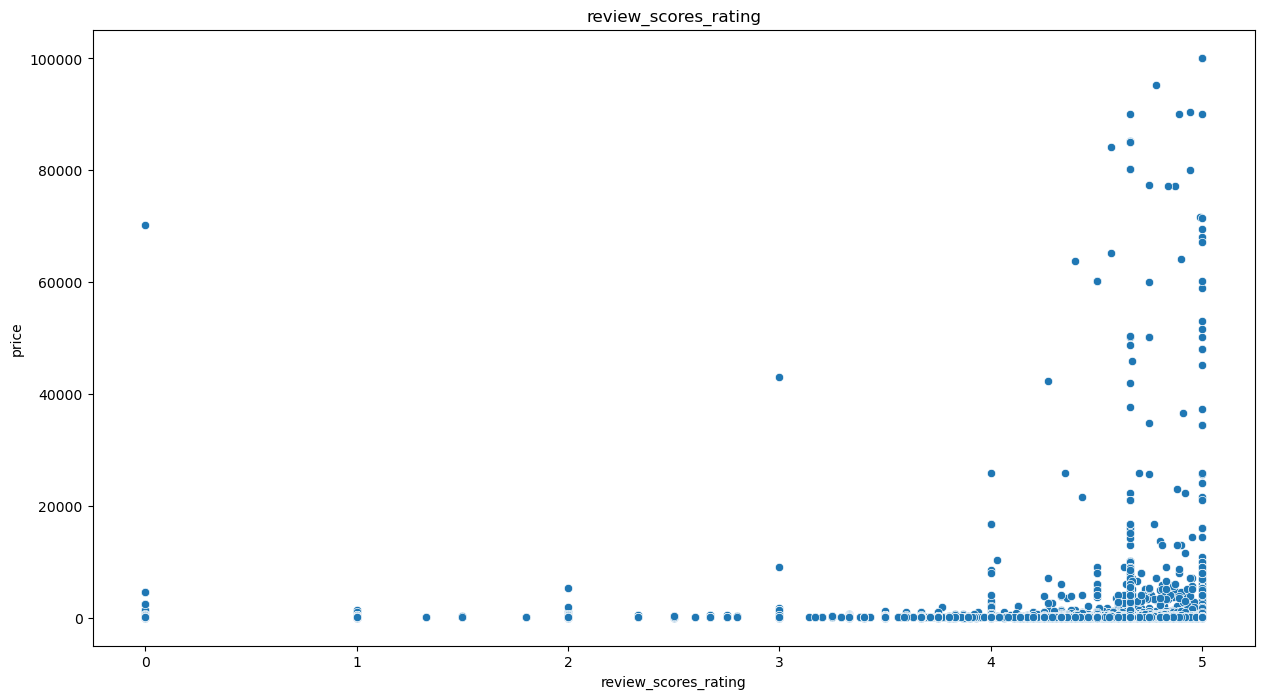

In [75]:
sns.scatterplot(x = df_italy['review_scores_rating'] , y = df_italy['price'])
plt.title("review_scores_rating",loc="center")
plt.savefig('review_scores_rating vs price')
plt.show()

#### Positive Relationship: Generally, we observe a positive relationship between the review scores rating and the price of the listings. Higher-rated listings tend to have higher prices, suggesting that accommodations with better guest satisfaction are priced at a premium.
Concentration of Higher Ratings: The scatter plot shows a concentration of data points with higher review scores ratings and higher prices. This indicates that well-rated listings are more likely to command higher prices in the market.
Outliers: We can also observe some outliers in the plot, where listings with relatively low review scores ratings have higher prices or vice versa. These outliers could represent unique cases or other factors influencing the pricing beyond the review scores rating alone.

#### instant_bookable vs price

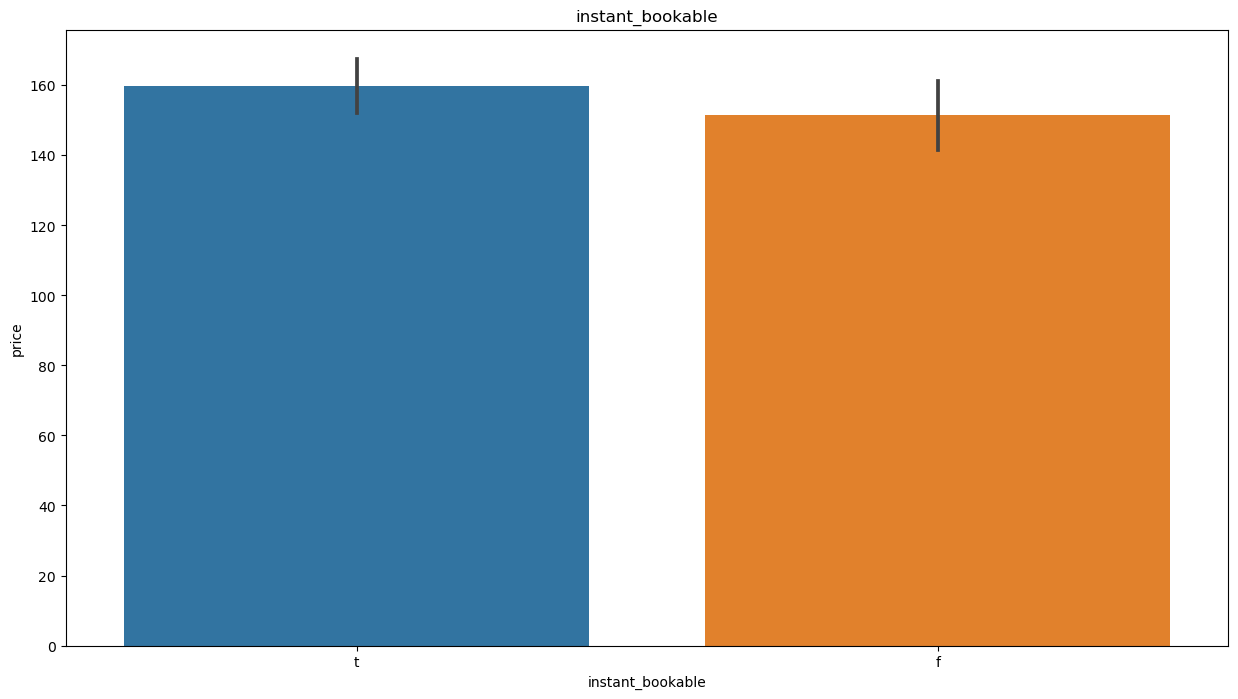

In [76]:
sns.barplot(x = df_italy['instant_bookable'] , y = df_italy['price'])
plt.title("instant_bookable",loc="center")
plt.show()


#### bookable feature influences the price of a listing. By analyzing the bar heights, we can identify any differences in pricing between instant bookable and non-instant bookable listings.
Price Comparison: The plot shows the average prices of instant bookable and non-instant bookable listings. We can compare the bar heights to understand if there is a significant difference in pricing based on the instant bookable status.
Pricing Parity: If the average prices of instant bookable and non-instant bookable listings are similar, it suggests that the instant bookable feature does not significantly impact the pricing decision. Hosts may choose to offer instant booking without adjusting the prices accordingly.
Pricing Difference: If there is a noticeable difference in average prices between instant bookable and non-instant bookable listings, it indicates that the instant bookable feature may influence the pricing decision. Higher prices for instant bookable listings could be due to the convenience and flexibility offered to guests.

#### calculated_total_listing_count vs price

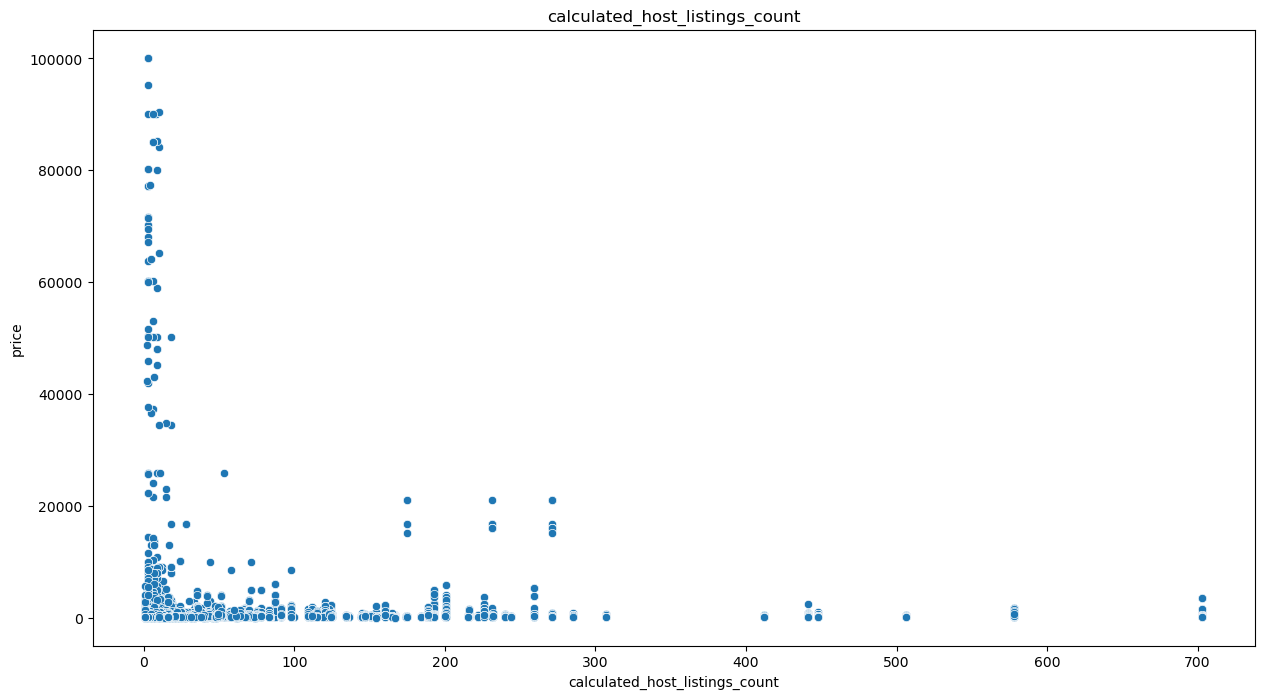

In [77]:
sns.scatterplot(x = df_italy['calculated_host_listings_count'] , y = df_italy['price'])
plt.title("calculated_host_listings_count",loc="center")
plt.savefig("calculated_host_listings_count")
plt.show()

#### Relationship Assessment: The scatter plot helps us determine if there is a correlation or relationship between the calculated host listings count and the price of listings. If the data points show a discernible trend, it suggests that the number of listings hosted by a host might impact their pricing strategy.
Pricing Strategy: Hosts with a higher calculated host listings count may choose to adjust their prices differently compared to hosts with fewer listings. They may leverage their experience and expertise in hosting multiple listings to set prices competitively or offer discounts.

#### bathrooms vs price

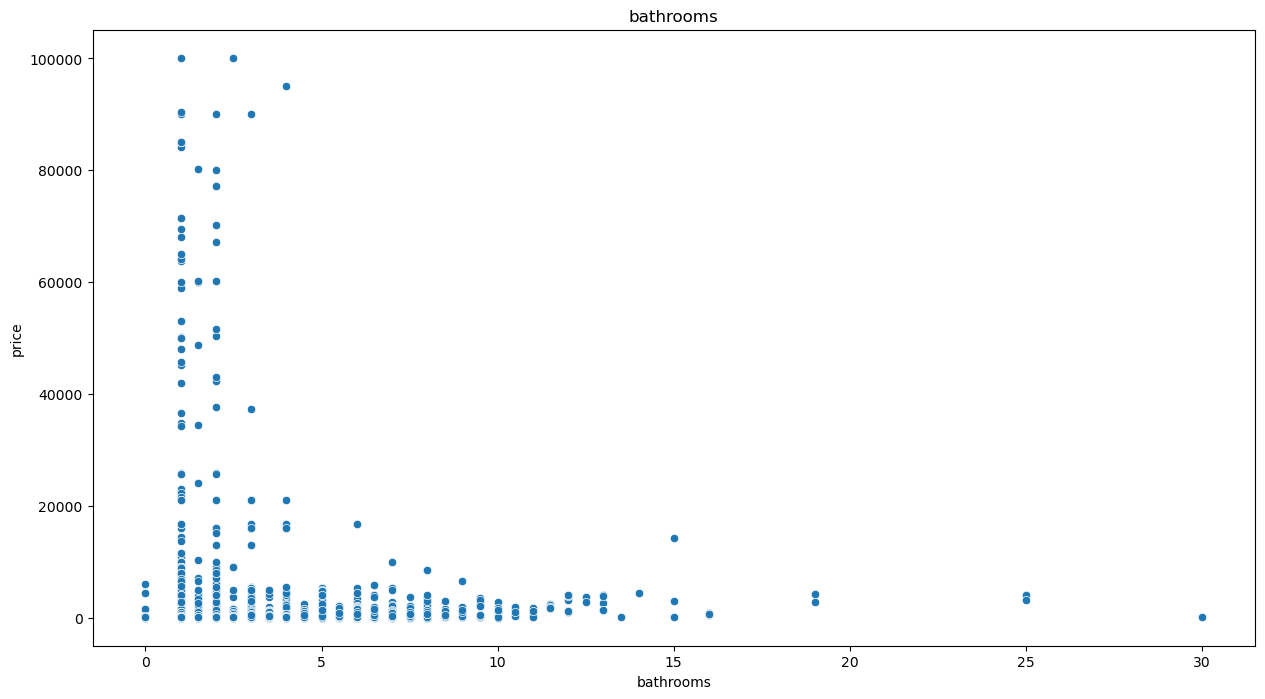

In [78]:
sns.scatterplot(x = df_italy['bathrooms'] , y = df_italy['price'])
plt.title("bathrooms",loc="center")
plt.show()

#### The scatter plot helps us determine if there is a correlation or relationship between the number of bathrooms and the price of listings. If the data points show a discernible trend, it suggests that the number of bathrooms might be a factor in determining the price of a listing.
Pricing Strategy: Listings with a higher number of bathrooms may have different pricing strategies compared to those with fewer bathrooms. Hosts might consider the additional value provided by multiple bathrooms when setting their prices.
Pricing Patterns: By examining the scatter plot, we can identify any clustering or dispersion of data points. If there is a concentration of data points at a specific number of bathrooms with corresponding price levels, it indicates a potential pricing pattern.


### Multivariate Analysis

#### room_type vs accomodates vs price

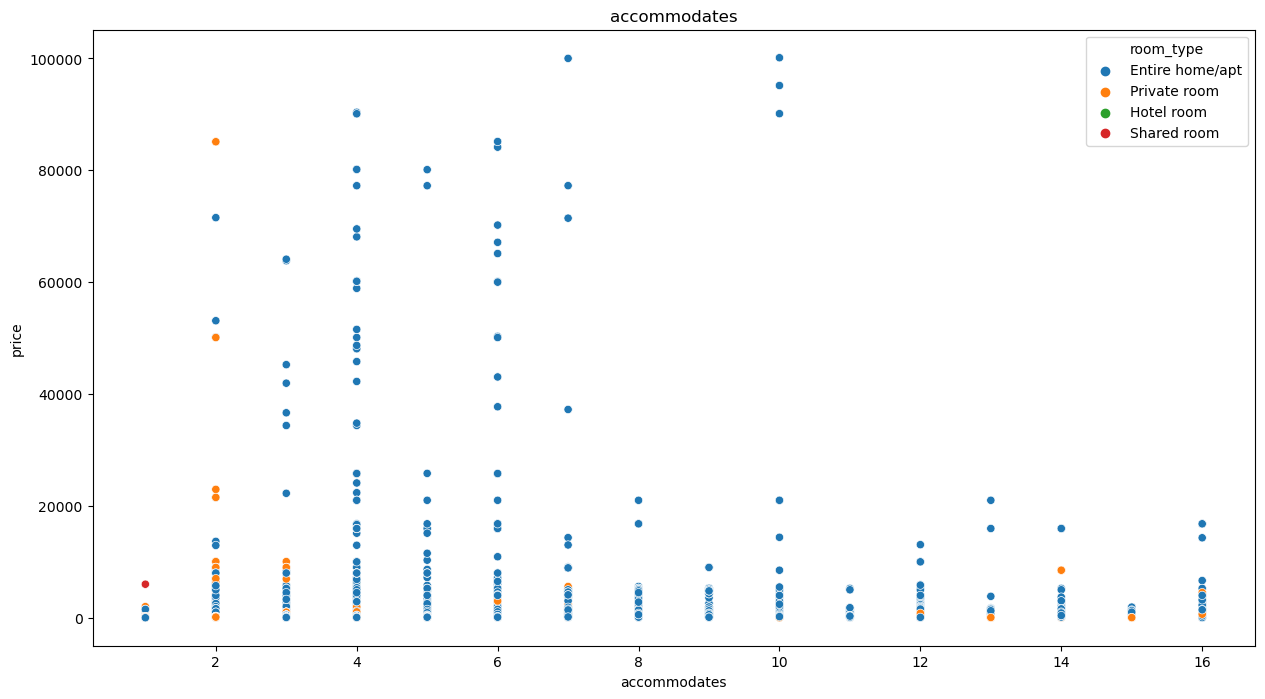

In [79]:
sns.scatterplot( x = df_italy['accommodates'] , y = df_italy['price'] , hue = df_italy['room_type'])
plt.title("accommodates",loc="center")
plt.savefig('Multivariate Accomodates with price, hue room_type')
plt.show()

#### The scatter plot allows us to observe the distribution and clustering of listings based on room type, the number of accommodations, and price.
Different room types show variations in price and the number of accommodations they can accommodate.
For example, "Entire home/apt" listings generally have higher prices and can accommodate a larger number of people compared to "Private room" or "Shared room" listings.
There are listings with varying prices and accommodation capacities within each room type, indicating other factors such as location, amenities, or property size may also play a role in determining price.

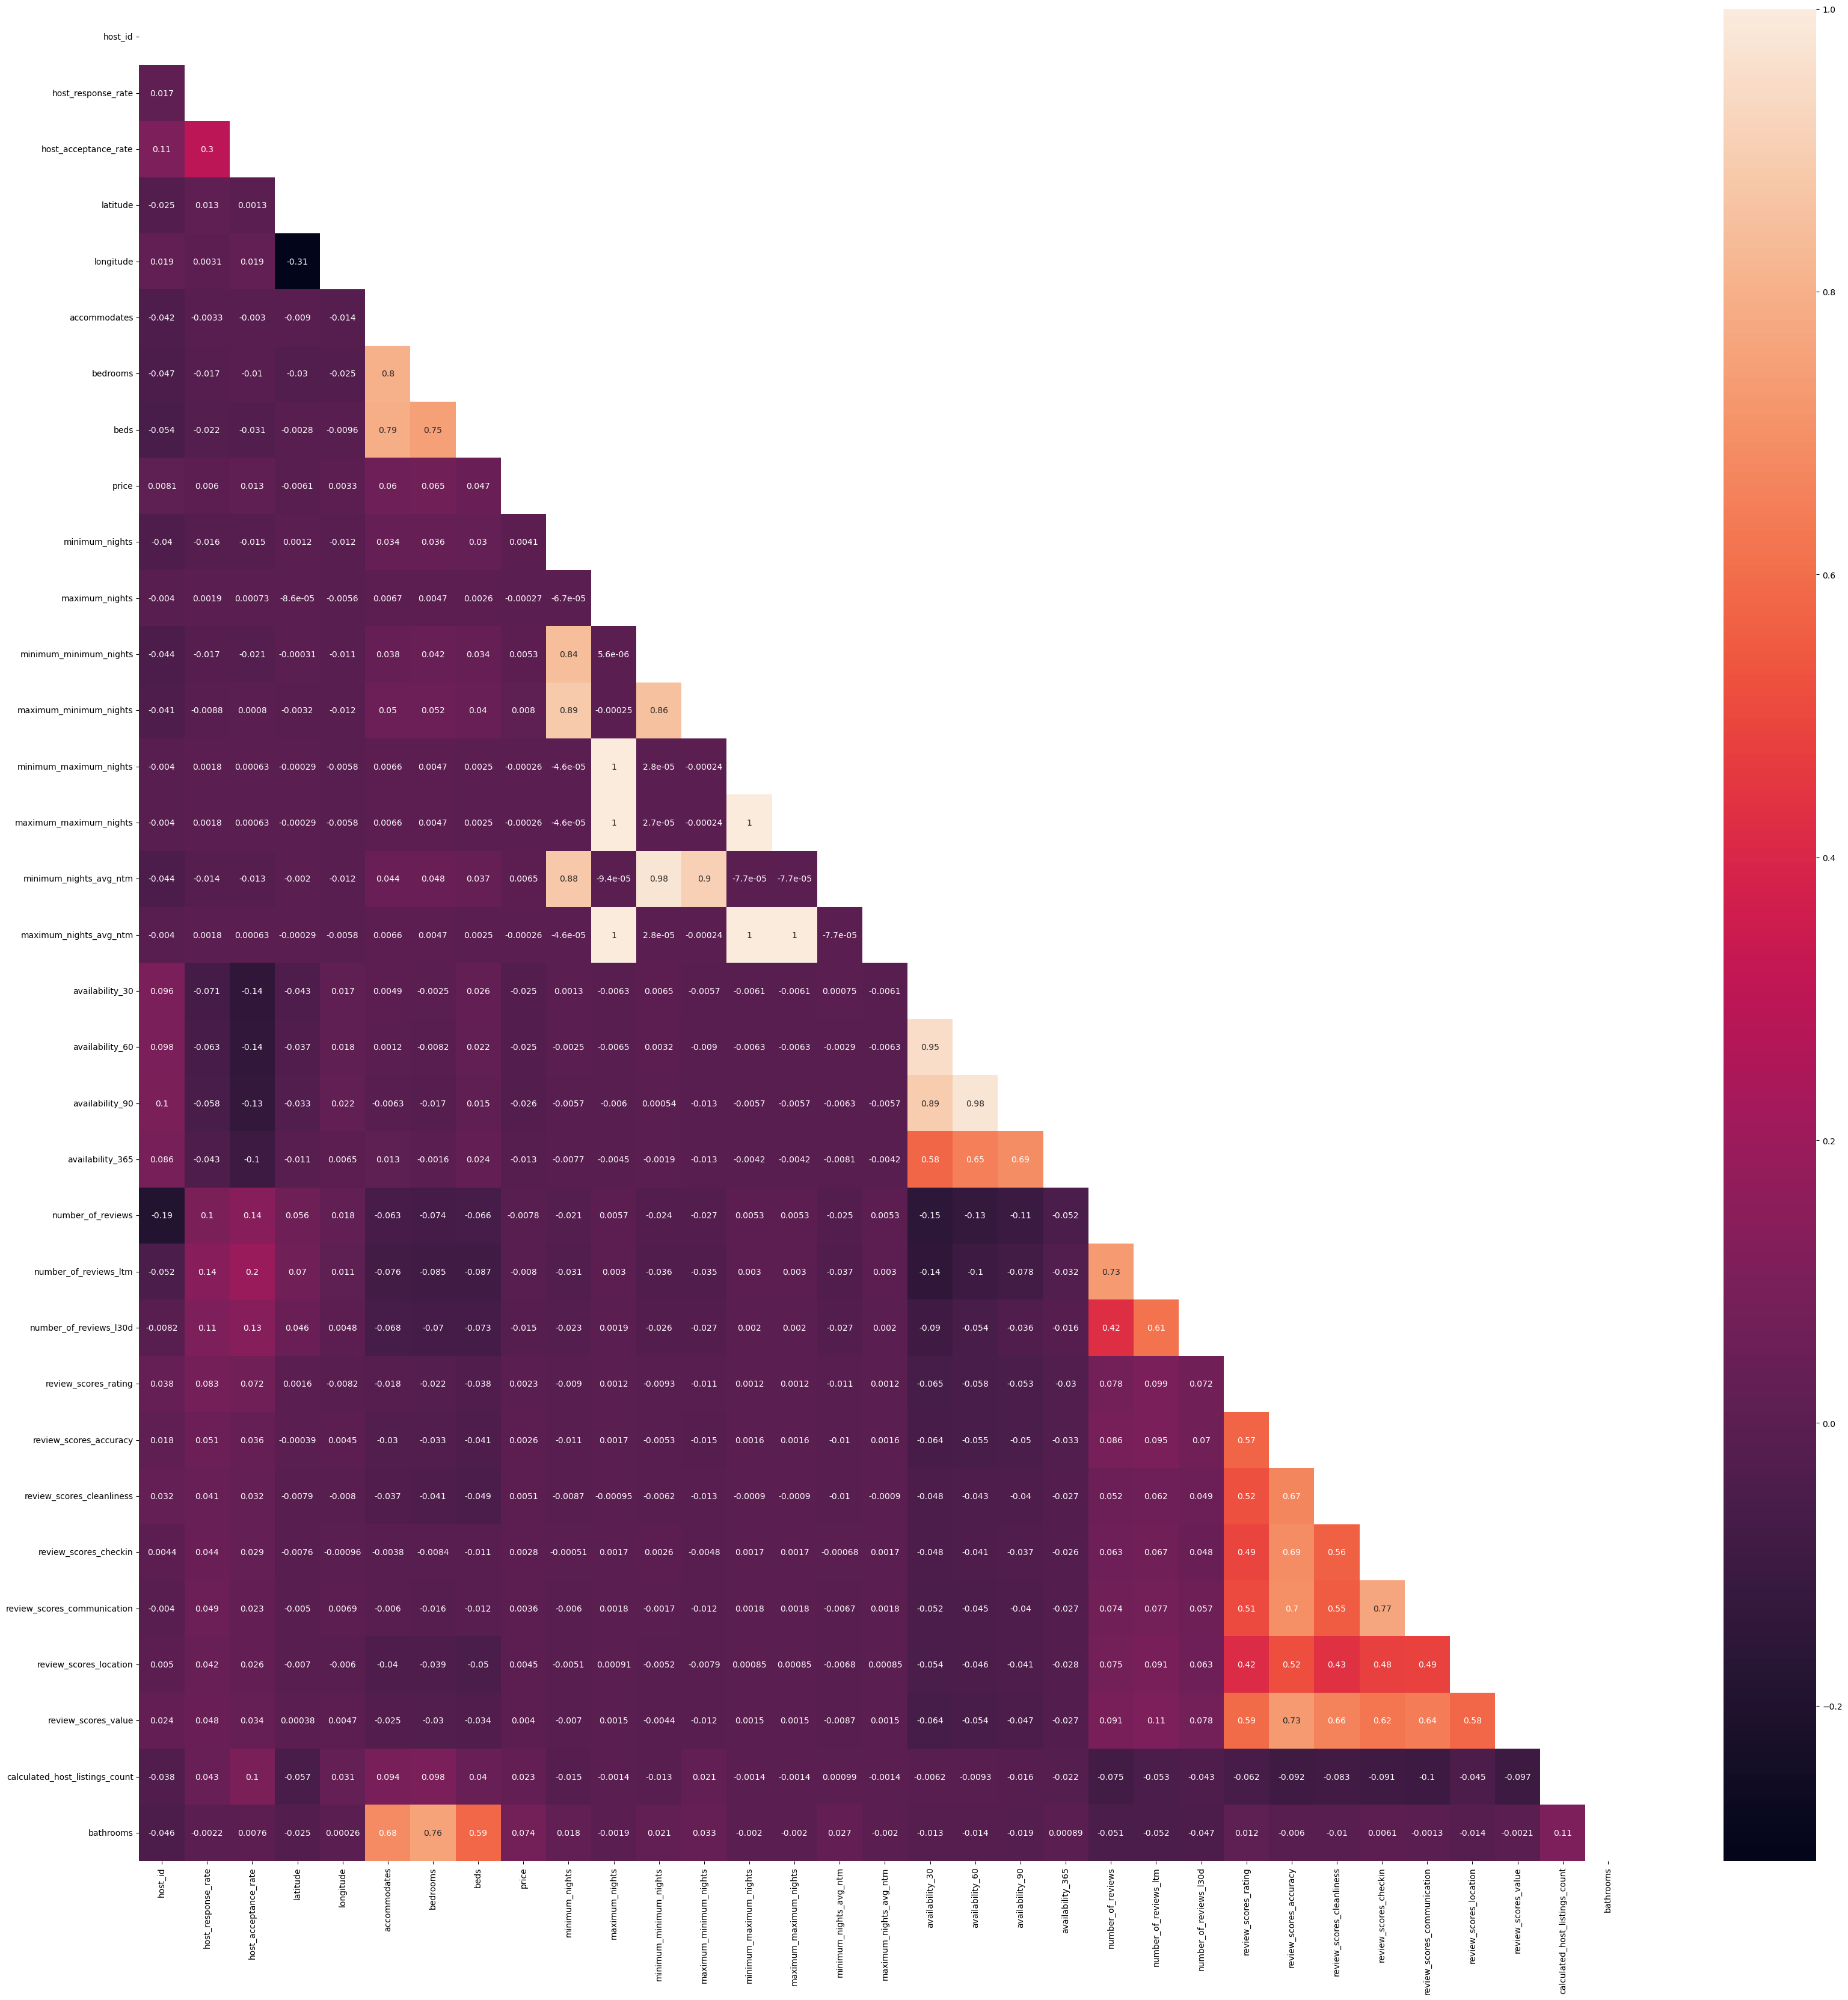

In [80]:
plt.figure(figsize = (40,40))
sns.heatmap(df_italy.corr(),annot = True ,mask = np.triu(df_italy.corr()))
plt.savefig('heatmap')
plt.show()

#### Each cell in the heatmap represents the correlation coefficient between two variables.
Darker colors indicate stronger correlations, with lighter colors indicating weaker or no correlation.
By analyzing the heatmap, we can identify variables that are positively or negatively correlated with each other.
For example, variables like "bedrooms" and "accommodates" show a positive correlation, indicating that as the number of bedrooms increases, the accommodation capacity also tends to increase.
On the other hand, "host_response_rate" and "price" show a relatively weak positive correlation, suggesting that a higher host response rate may be associated with slightly higher prices.
It's important to note that correlation does not imply causation, and further analysis is required to establish the causal relationships between variables

In [81]:
df_italy.corr()

,host_id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,bathrooms
host_id,1.000000,0.016508,0.108594,-0.024582,0.018747,-0.042457,-0.046542,-0.053993,0.008058,-0.039957,-0.004050,-0.043616,-0.040975,-0.004000,-0.003999,-0.043623,-0.004000,0.095631,0.098359,0.103652,0.086485,-0.189844,-0.052477,-0.008173,0.037514,0.017757,0.031506,0.004442,-0.004036,0.005022,0.023968,-0.038224,-0.045720
host_response_rate,0.016508,1.000000,0.296308,0.013001,0.003084,-0.003317,-0.017454,-0.021566,0.006047,-0.016052,0.001878,-0.017108,-0.008826,0.001806,0.001807,-0.014210,0.001807,-0.070978,-0.062718,-0.058232,-0.043402,0.102619,0.136454,0.105398,0.082721,0.051298,0.040822,0.043942,0.048968,0.042405,0.047937,0.042900,-0.002176
host_acceptance_rate,0.108594,0.296308,1.000000,0.001303,0.019253,-0.002985,-0.010107,-0.030834,0.013342,-0.015054,0.000728,-0.021286,0.000798,0.000628,0.000630,-0.013004,0.000629,-0.142493,-0.136859,-0.132875,-0.103244,0.139361,0.195336,0.131312,0.072216,0.035877,0.032466,0.029289,0.023096,0.025722,0.033802,0.103989,0.007573
latitude,-0.024582,0.013001,0.001303,1.000000,-0.309575,-0.009039,-0.030395,-0.002814,-0.006057,0.001175,-0.000086,-0.000306,-0.003221,-0.000287,-0.000287,-0.002010,-0.000287,-0.043188,-0.037476,-0.033157,-0.010501,0.055808,0.070362,0.046339,0.001575,-0.000394,-0.007871,-0.007601,-0.004960,-0.006955,0.000379,-0.057026,-0.024763
longitude,0.018747,0.003084,0.019253,-0.309575,1.000000,-0.013650,-0.025458,-0.009613,0.003269,-0.011554,-0.005628,-0.010996,-0.012250,-0.005822,-0.005822,-0.012482,-0.005822,0.017299,0.017715,0.021530,0.006501,0.018136,0.010770,0.004792,-0.008216,0.004460,-0.007980,-0.000963,0.006901,-0.005971,0.004678,0.030730,0.000261
accommodates,-0.042457,-0.003317,-0.002985,-0.009039,-0.013650,1.000000,0.803501,0.792093,0.060490,0.034456,0.006668,0.038257,0.050065,0.006552,0.006553,0.043835,0.006553,0.004890,0.001233,-0.006328,0.012599,-0.063471,-0.076483,-0.067754,-0.017757,-0.029916,-0.036942,-0.003789,-0.006047,-0.040364,-0.024923,0.094036,0.682958
bedrooms,-0.046542,-0.017454,-0.010107,-0.030395,-0.025458,0.803501,1.000000,0.746344,0.064766,0.035970,0.004718,0.042109,0.052089,0.004689,0.004690,0.047676,0.004689,-0.002529,-0.008154,-0.017057,-0.001599,-0.074203,-0.084724,-0.070486,-0.021972,-0.033334,-0.041234,-0.008375,-0.015597,-0.039411,-0.030222,0.097977,0.757495
beds,-0.053993,-0.021566,-0.030834,-0.002814,-0.009613,0.792093,0.746344,1.000000,0.047036,0.029836,0.002570,0.034397,0.039862,0.002466,0.002467,0.037246,0.002467,0.026378,0.022229,0.015417,0.024470,-0.066467,-0.087383,-0.072541,-0.037558,-0.040762,-0.048715,-0.010686,-0.011931,-0.050032,-0.033816,0.040307,0.585536
price,0.008058,0.006047,0.013342,-0.006057,0.003269,0.060490,0.064766,0.047036,1.000000,0.004138,-0.000274,0.005290,0.007975,-0.000259,-0.000258,0.006486,-0.000259,-0.024945,-0.025484,-0.025508,-0.013008,-0.007759,-0.007988,-0.014817,0.002283,0.002580,0.005134,0.002803,0.003575,0.004490,0.004048,0.023167,0.074393
minimum_nights,-0.039957,-0.016052,-0.015054,0.001175,-0.011554,0.034456,0.035970,0.029836,0.004138,1.000000,-0.000067,0.844829,0.885071,-0.000046,-0.000046,0.877723,-0.000046,0.001263,-0.002543,-0.005725,-0.007733,-0.020557,-0.031000,-0.023084,-0.009017,-0.010835,-0.008650,-0.000508,-0.005985,-0.005085,-0.006977,-0.015278,0.018452


### Checking and treating of outliers

#### Outliers are data points that significantly deviate from the majority of the observations in a dataset. They can occur due to various reasons such as measurement errors, data entry mistakes, or rare events. It is important to identify and treat outliers appropriately to ensure they do not unduly influence the analysis or modeling process. Here are some steps you can follow to check and treat outliers:

Visualize the Data: Start by visualizing the distribution of the variables using plots such as histograms, box plots, or scatter plots. These visualizations can help identify any extreme or unusual observations that may indicate the presence of outliers.

Define the Criteria: Determine the criteria for identifying outliers. This can be done using statistical methods such as the z-score, where observations that fall outside a certain number of standard deviations from the mean are considered outliers. Alternatively, you can use domain knowledge or business rules to define the criteria for identifying outliers specific to your dataset.

Identify Outliers: Apply the defined criteria to the variables of interest to identify the outliers in the dataset. This can be done programmatically using statistical functions or by visually inspecting the plots generated in the previous step.

Understand the Context: Investigate the outliers to understand their potential causes and whether they are genuine data points or errors. It is important to consider the context of the data and the domain knowledge to determine the appropriate treatment for outliers.

Choose Treatment Methods: Once the outliers are identified and understood, you can choose from various treatment methods. Some common approaches include:

Removing Outliers: In some cases, it may be appropriate to remove outliers from the dataset if they are considered data errors or their presence significantly impacts the analysis. However, it is important to exercise caution and ensure that the removal of outliers is justified and does not introduce bias.

Winsorization: Winsorization involves capping or flooring the extreme values to a specified percentile. This approach reduces the impact of outliers without removing them completely.

Transformation: Data transformation techniques such as logarithmic, square root, or Box-Cox transformations can help make the data more normally distributed and mitigate the effect of outliers.

Imputation: If the outliers are genuine observations but still considered extreme, you can choose to impute their values using methods such as mean, median, or regression imputation. This approach retains the outliers but replaces their extreme values with more typical values.

In [82]:
df_italy.select_dtypes(include = np.number).columns

Index(['host_id', 'host_response_rate', 'host_acceptance_rate', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count', 'bathrooms'],
      dtype='object')

#### host_response_rate

<AxesSubplot:ylabel='host_response_rate'>

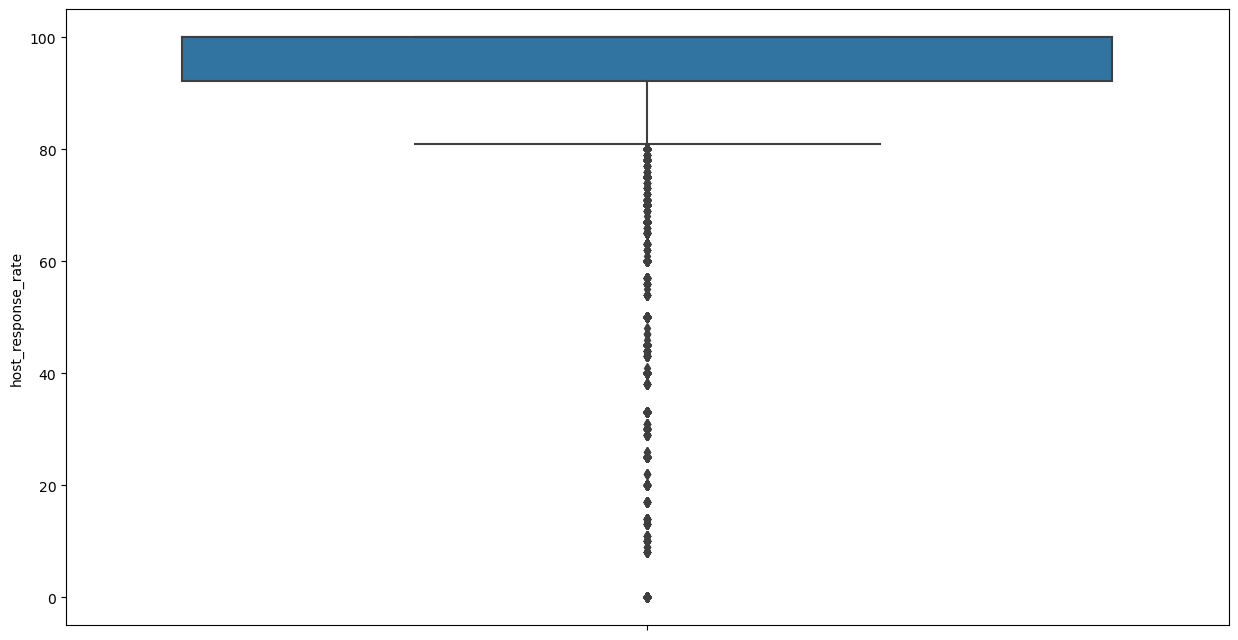

In [83]:
sns.boxplot(y = df_italy['host_response_rate'])


#### Before PowerTransaformer

From above plot we can infer that there outliers present in host response rate variable. By doing IQR method we will losing data , so we are going forawrd with transformation technique

In [84]:
pt = PowerTransformer()

df_italy['host_response_rate'] = pt.fit_transform(df_italy[['host_response_rate']])

<AxesSubplot:ylabel='host_response_rate'>

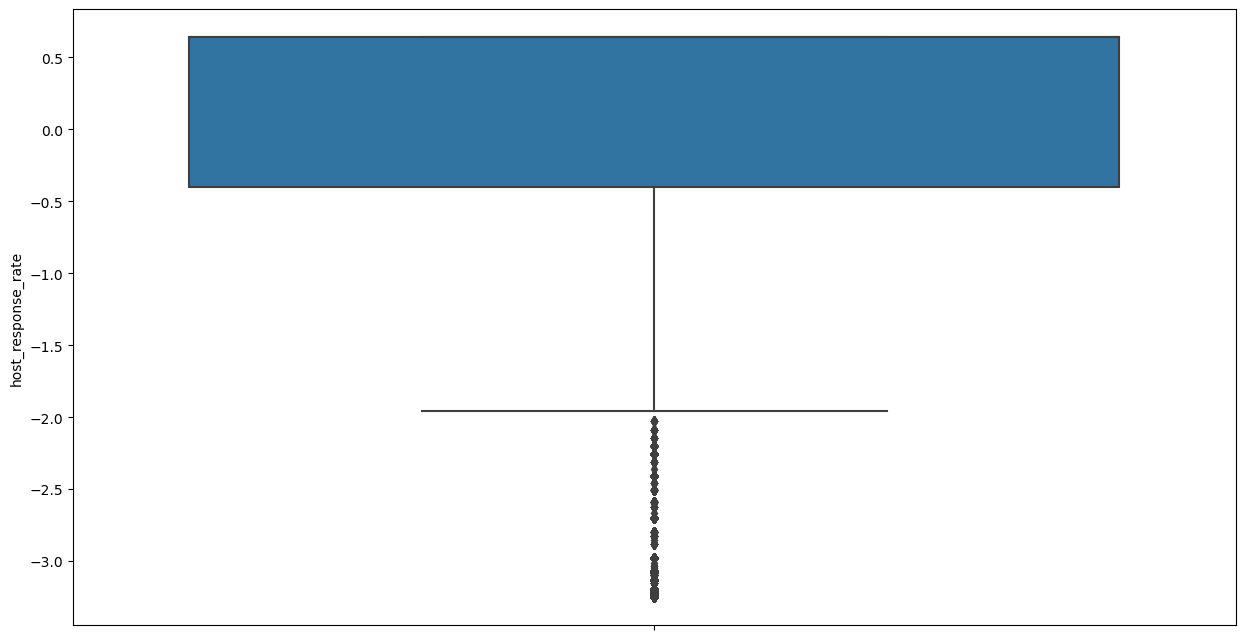

In [85]:
sns.boxplot(y = df_italy['host_response_rate'])

#### accommodates

<AxesSubplot:ylabel='accommodates'>

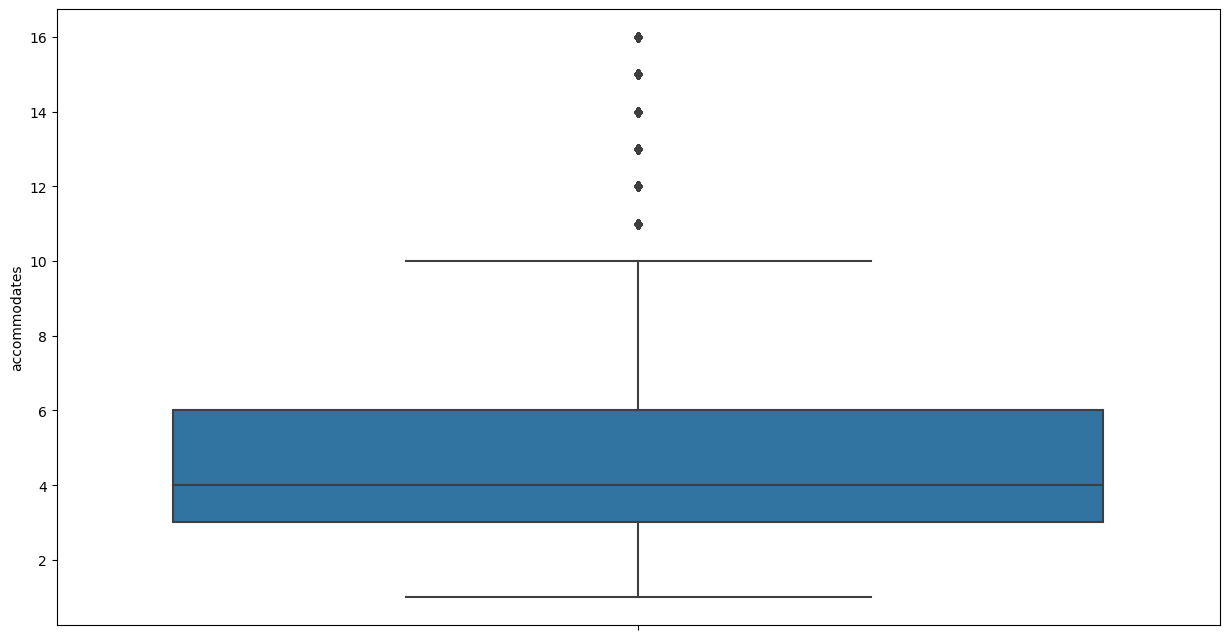

In [86]:
sns.boxplot(y = df_italy['accommodates'])

In [87]:
df_italy['accommodates'] = pt.fit_transform(df_italy[['accommodates']])

<AxesSubplot:ylabel='accommodates'>

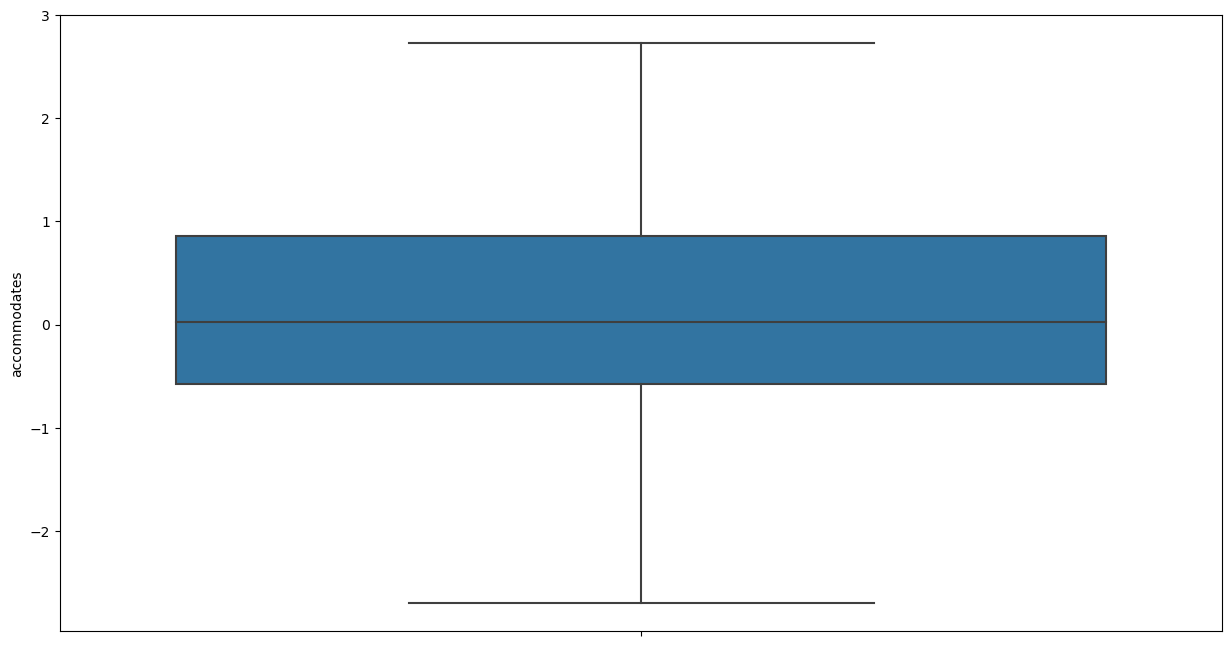

In [88]:
sns.boxplot(y = df_italy['accommodates'])

#### bedrooms

<AxesSubplot:ylabel='bedrooms'>

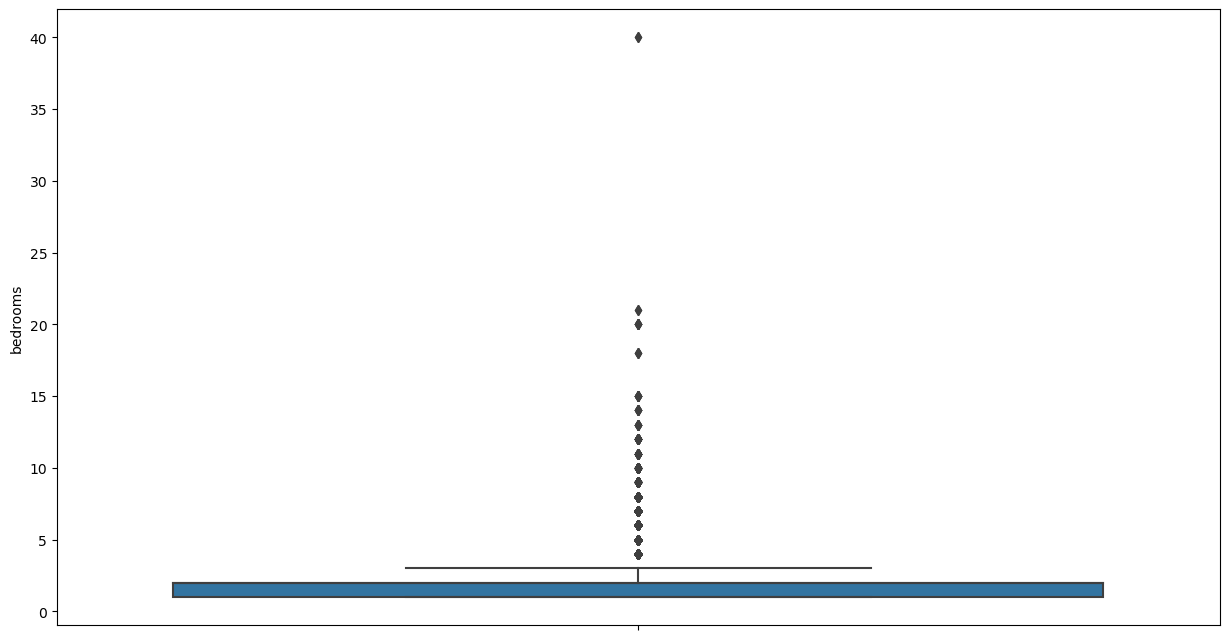

In [89]:
sns.boxplot(y = df_italy['bedrooms'])

In [90]:
df_italy['bedrooms'] = pt.fit_transform(df_italy[['bedrooms']])

<AxesSubplot:ylabel='bedrooms'>

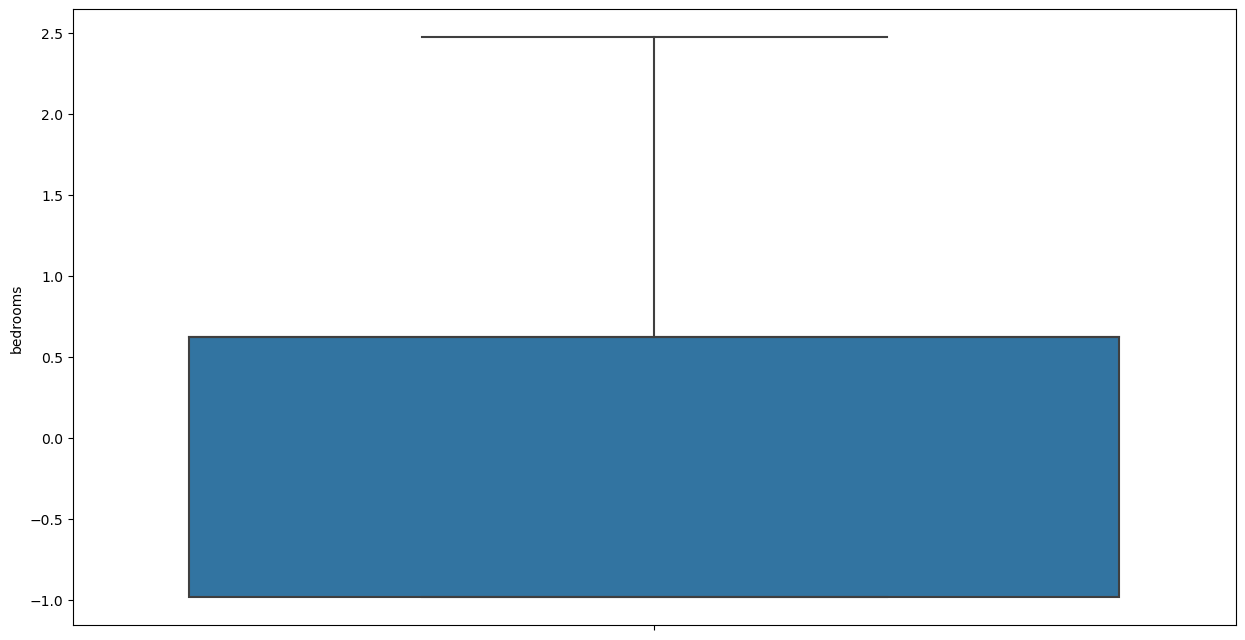

In [91]:
sns.boxplot(y = df_italy['bedrooms'])

#### beds

<AxesSubplot:ylabel='beds'>

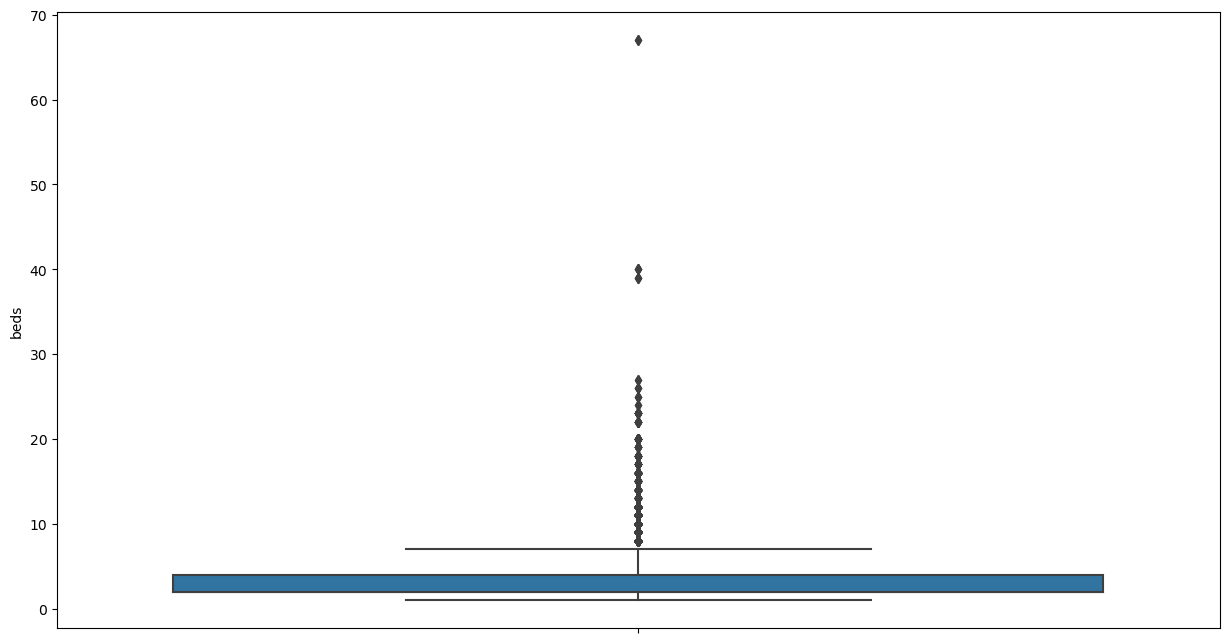

In [92]:
sns.boxplot(y = df_italy['beds'])

In [93]:
df_italy['beds'] = pt.fit_transform(df_italy[['beds']])

<AxesSubplot:ylabel='beds'>

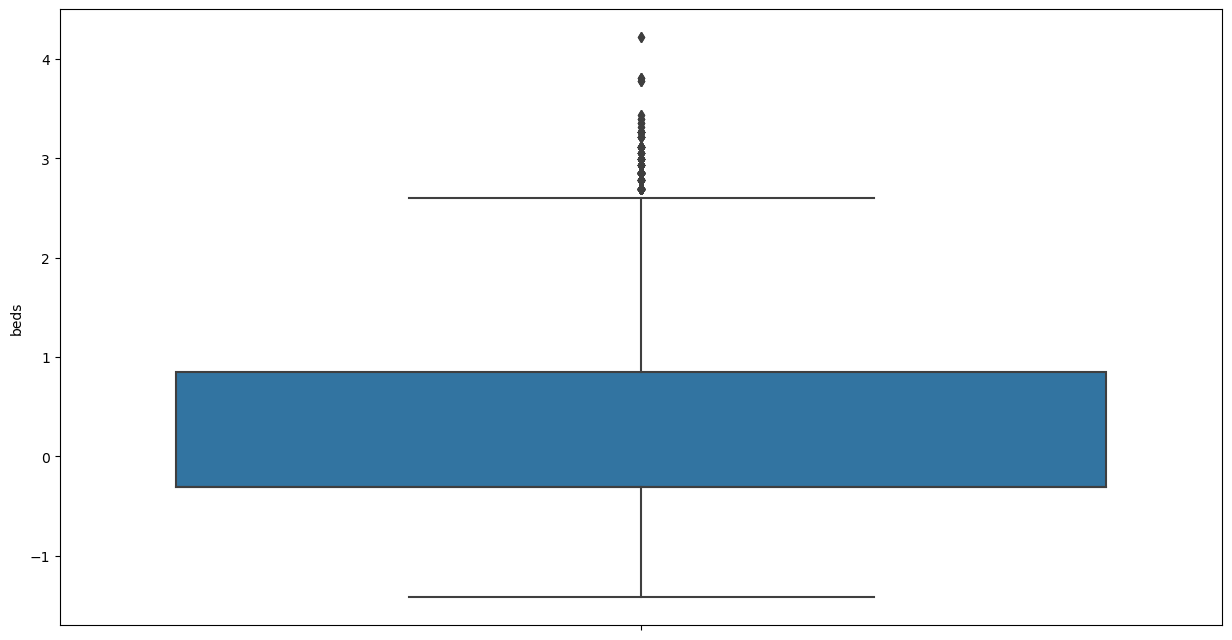

In [94]:
sns.boxplot(y = df_italy['beds'])

#### price

<AxesSubplot:ylabel='price'>

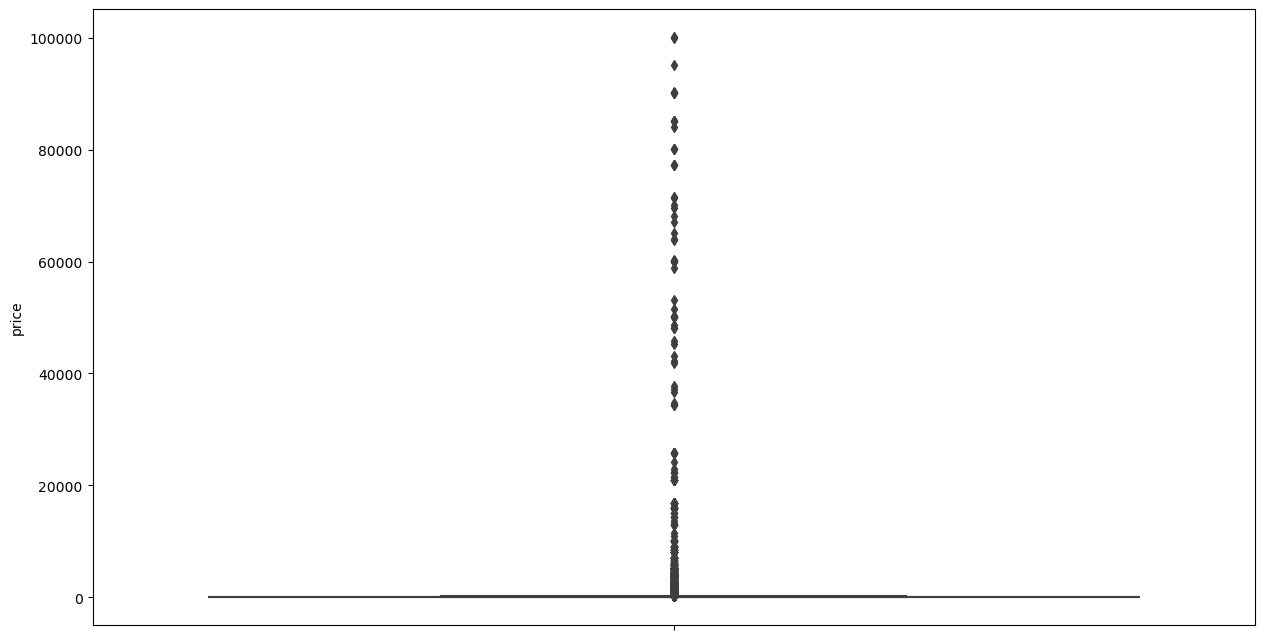

In [95]:
sns.boxplot(y = df_italy['price'])

In [96]:
df_italy['price'] = pt.fit_transform(df_italy[['price']])

<AxesSubplot:ylabel='price'>

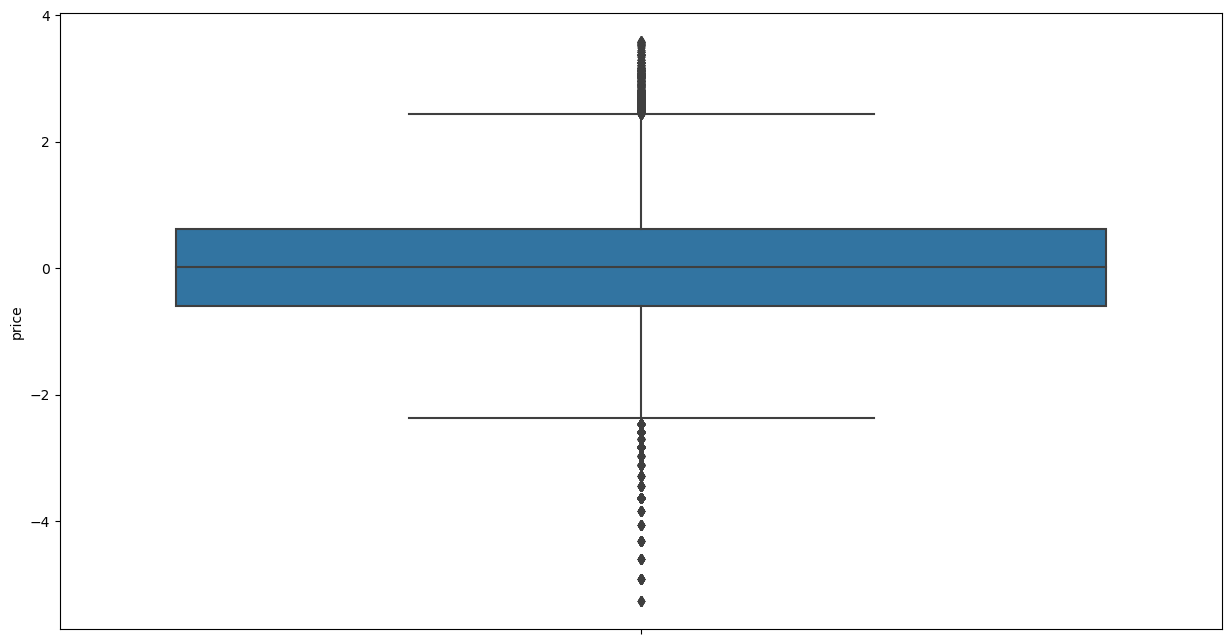

In [97]:
sns.boxplot(y = df_italy['price'])

#### minimum_nights

<AxesSubplot:ylabel='minimum_nights'>

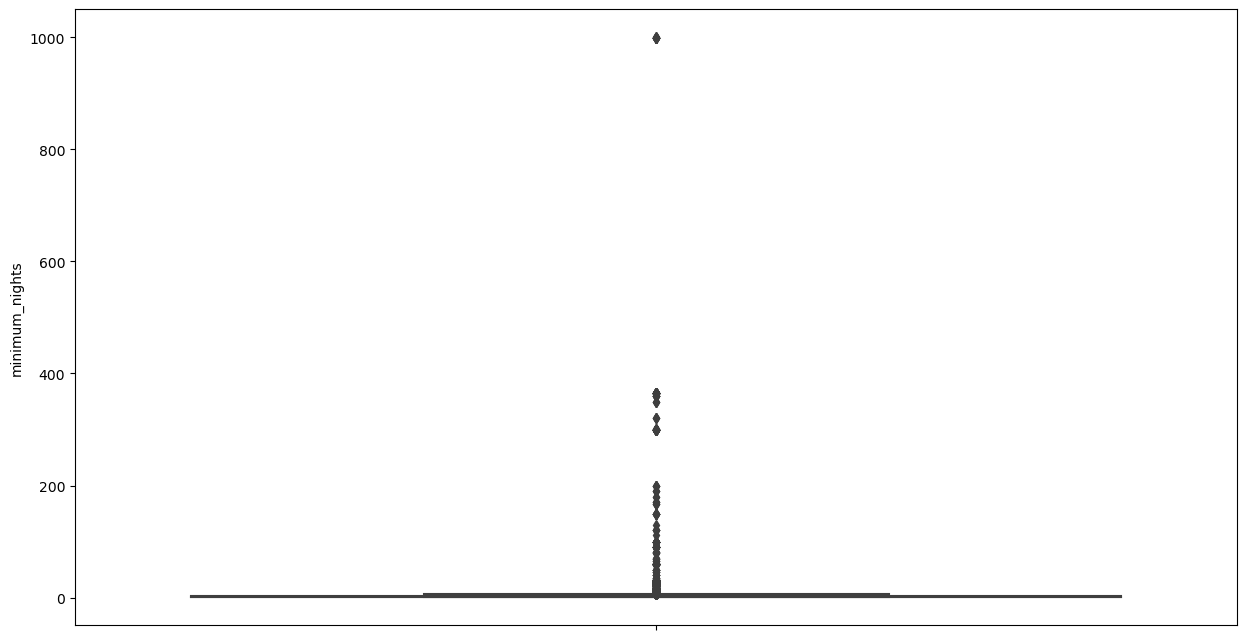

In [98]:
sns.boxplot(y = df_italy['minimum_nights'])

In [99]:
df_italy['minimum_nights'] = pt.fit_transform(df_italy[['minimum_nights']])

<AxesSubplot:ylabel='minimum_nights'>

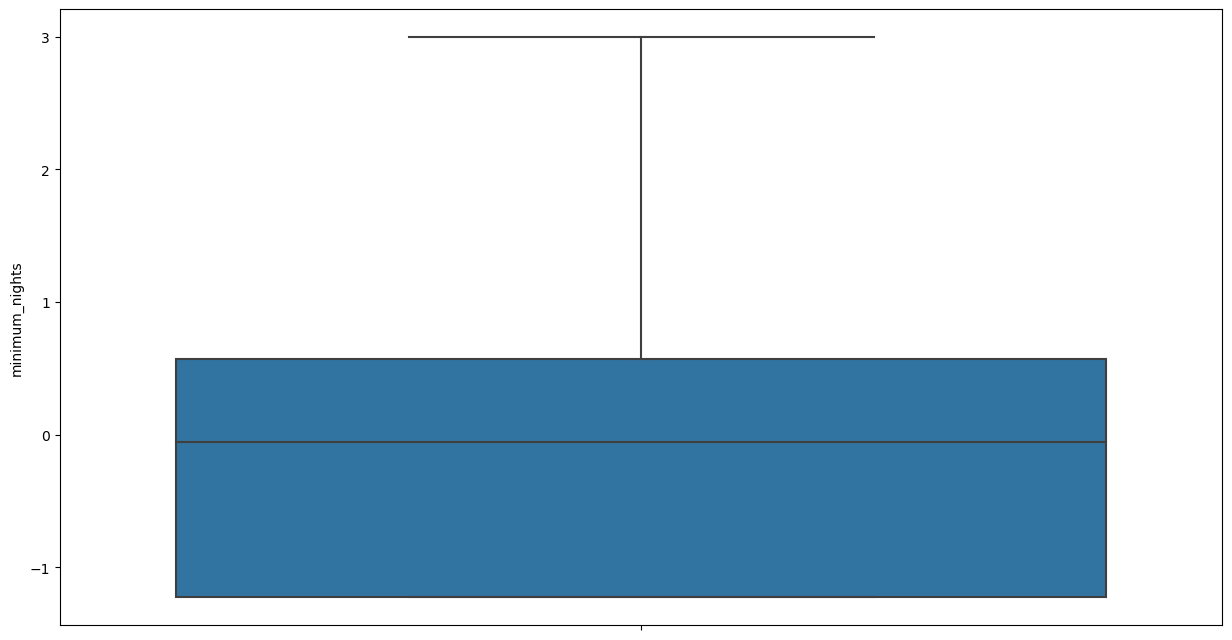

In [100]:
sns.boxplot(y = df_italy['minimum_nights'])

#### maximum_nights 

<AxesSubplot:ylabel='maximum_nights'>

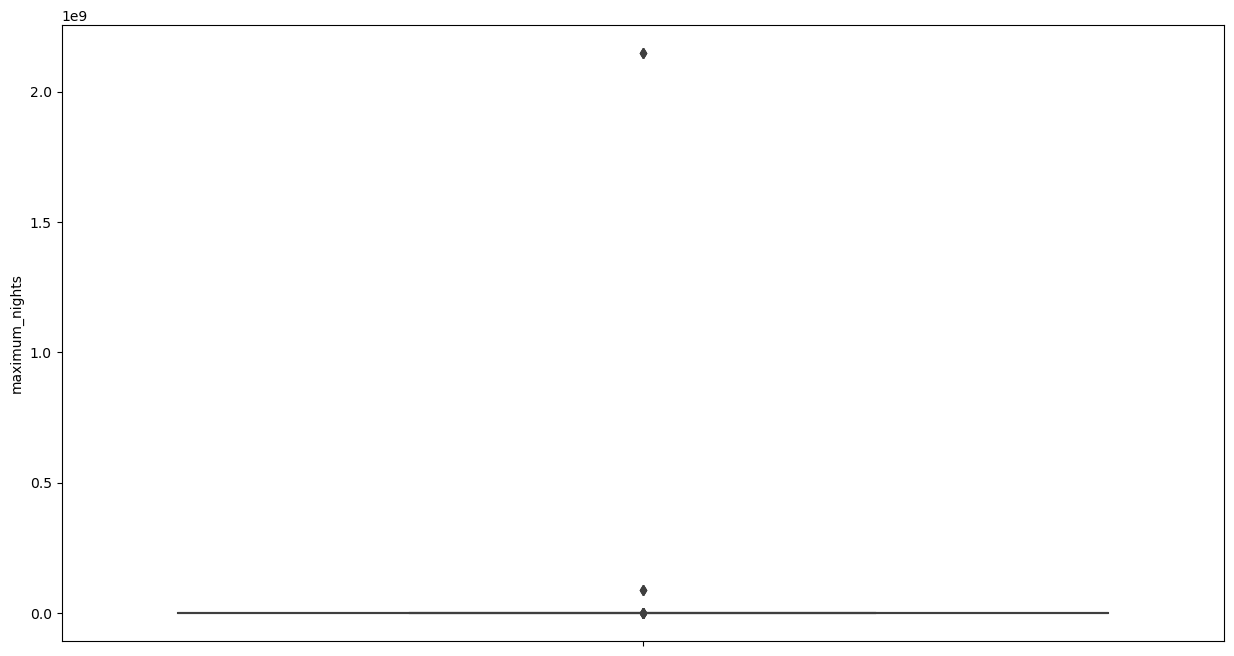

In [101]:
sns.boxplot(y = df_italy['maximum_nights'])

In [102]:
df_italy['maximum_nights'] = pt.fit_transform(df_italy[['maximum_nights']])

<AxesSubplot:ylabel='maximum_nights'>

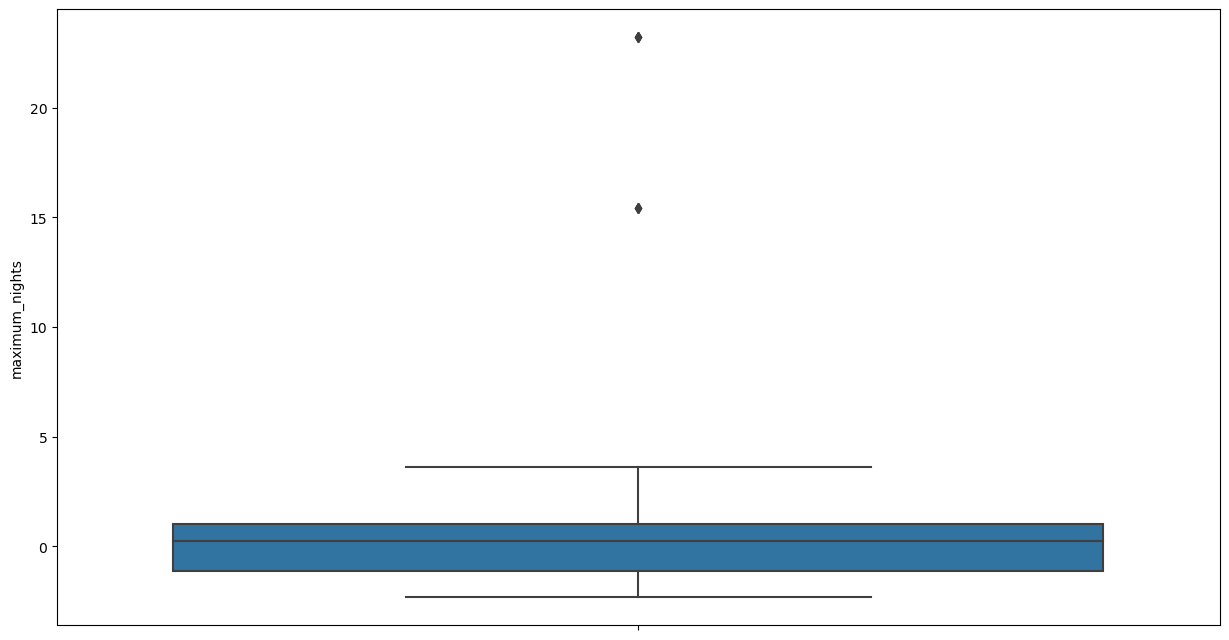

In [103]:
sns.boxplot(y = df_italy['maximum_nights'])

#### maximum_minimum_nights 

<AxesSubplot:ylabel='maximum_minimum_nights'>

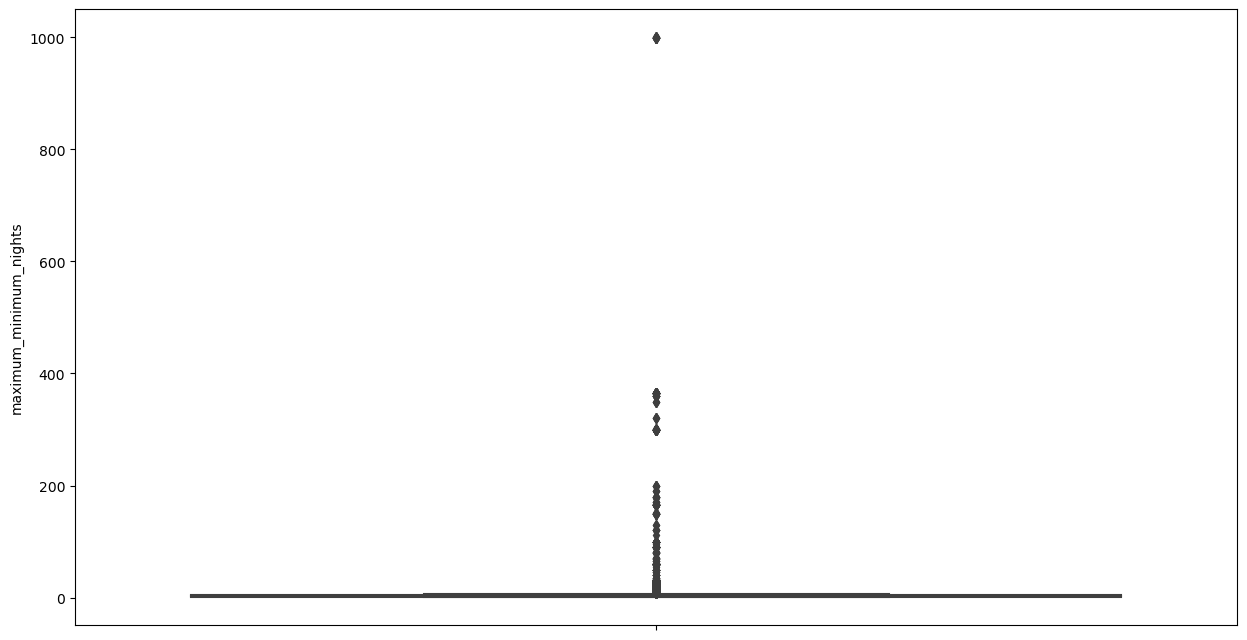

In [104]:
sns.boxplot(y = df_italy['maximum_minimum_nights'])

In [105]:
df_italy['maximum_minimum_nights'] = pt.fit_transform(df_italy[['maximum_minimum_nights']])

<AxesSubplot:ylabel='maximum_minimum_nights'>

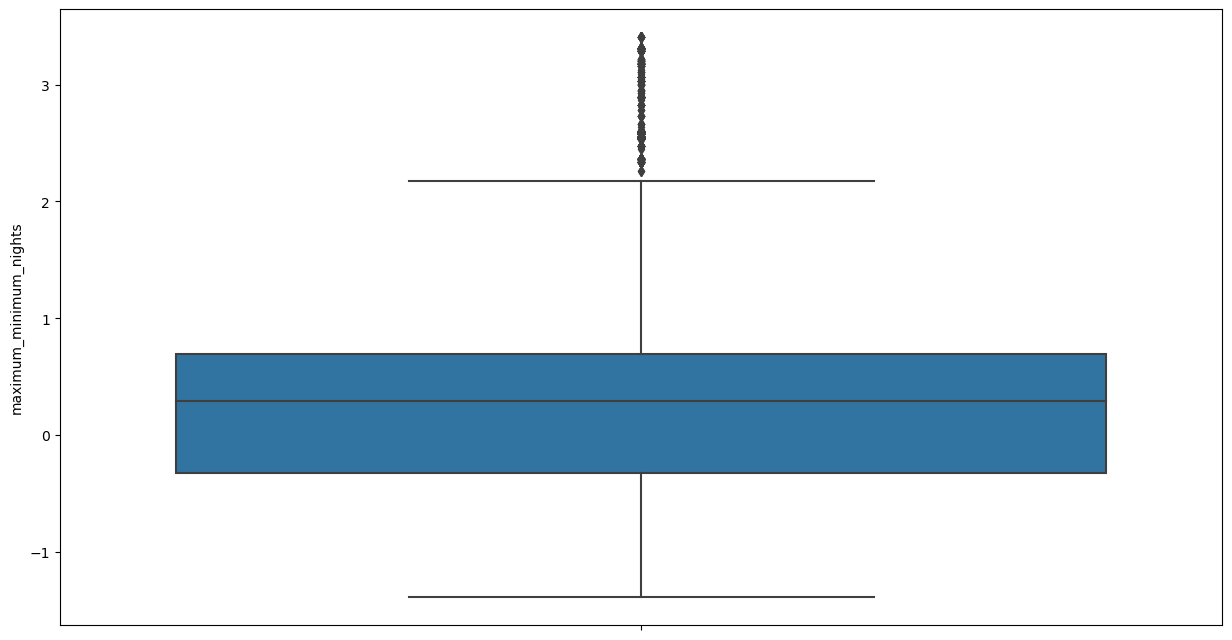

In [106]:
sns.boxplot(y = df_italy['maximum_minimum_nights'])

#### minimum_maximum_nights

<AxesSubplot:ylabel='minimum_maximum_nights'>

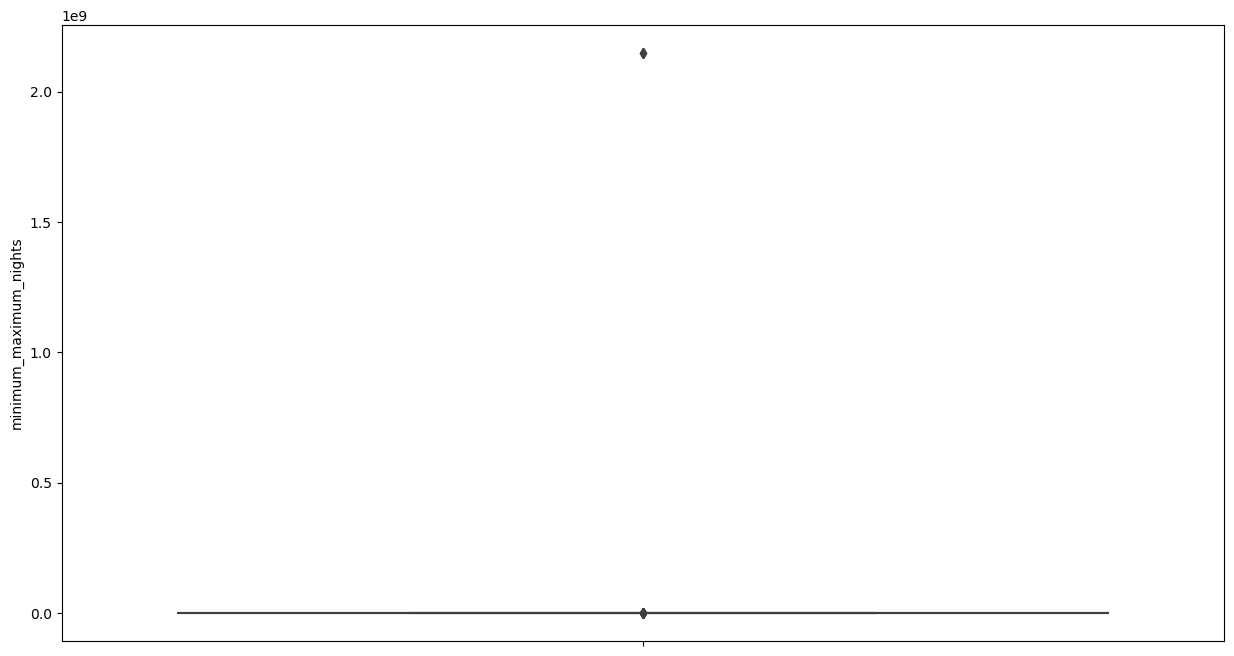

In [107]:
sns.boxplot(y = df_italy['minimum_maximum_nights'])

In [108]:
df_italy['minimum_maximum_nights'] = pt.fit_transform(df_italy[['minimum_maximum_nights']])

<AxesSubplot:ylabel='minimum_maximum_nights'>

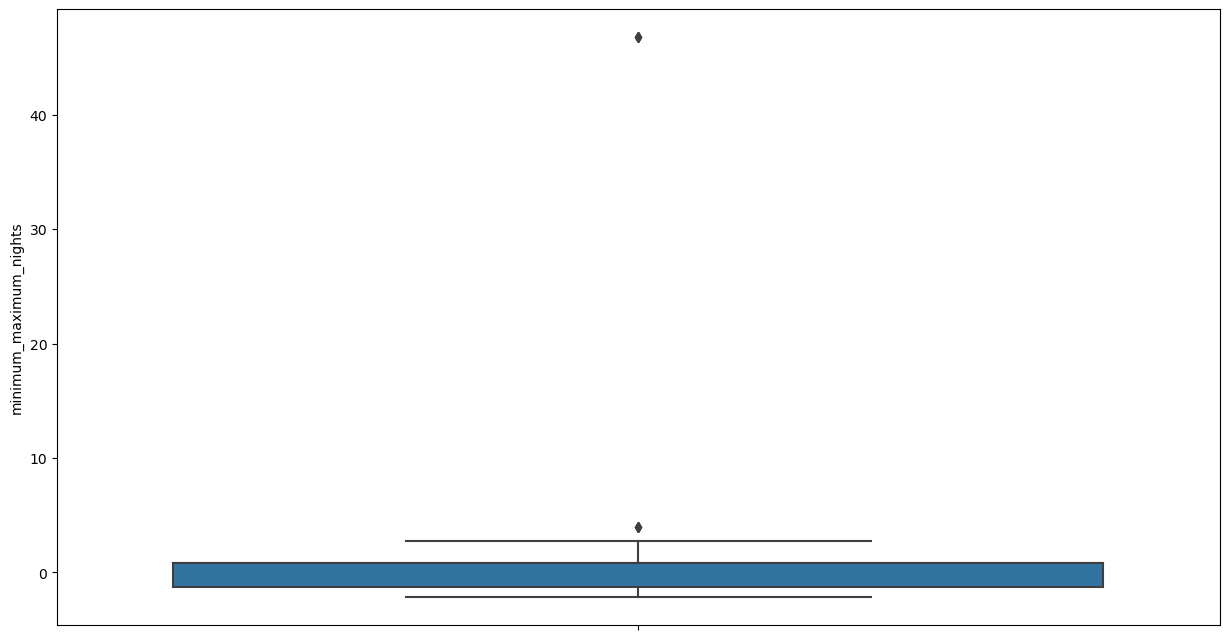

In [109]:
sns.boxplot(y = df_italy['minimum_maximum_nights'])

#### maximum_maximum_nights

<AxesSubplot:ylabel='maximum_maximum_nights'>

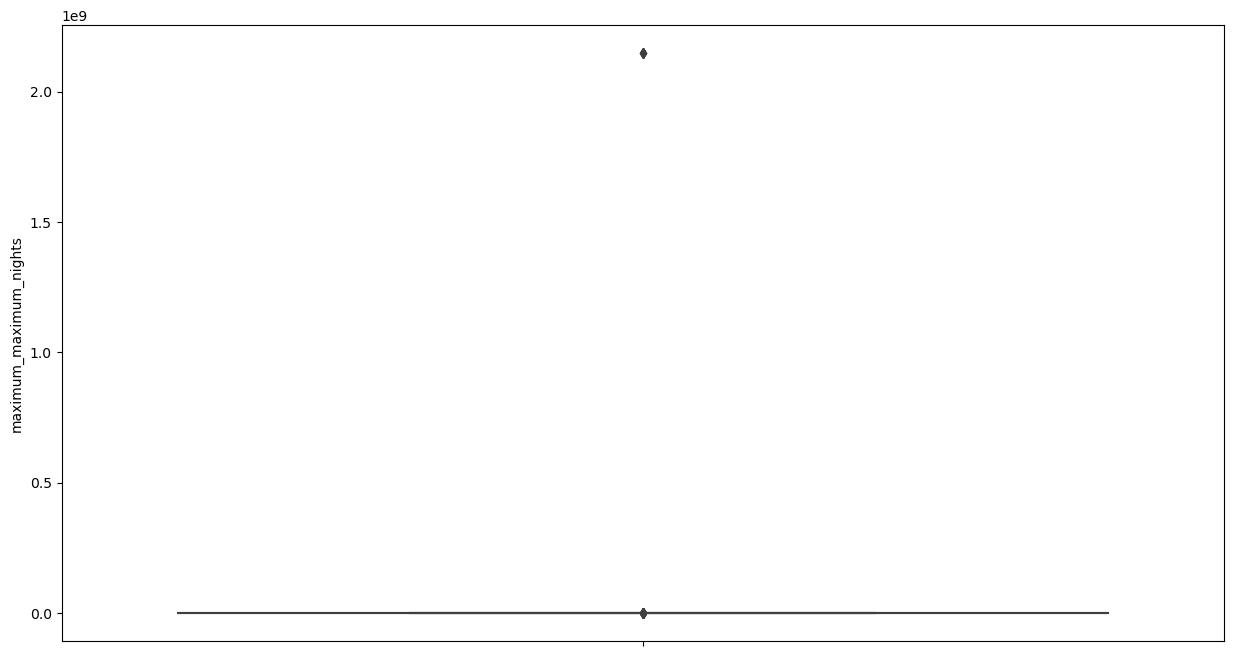

In [110]:
sns.boxplot(y = df_italy['maximum_maximum_nights'])

In [111]:
df_italy['maximum_maximum_nights'] = pt.fit_transform(df_italy[['maximum_maximum_nights']])

<AxesSubplot:ylabel='maximum_maximum_nights'>

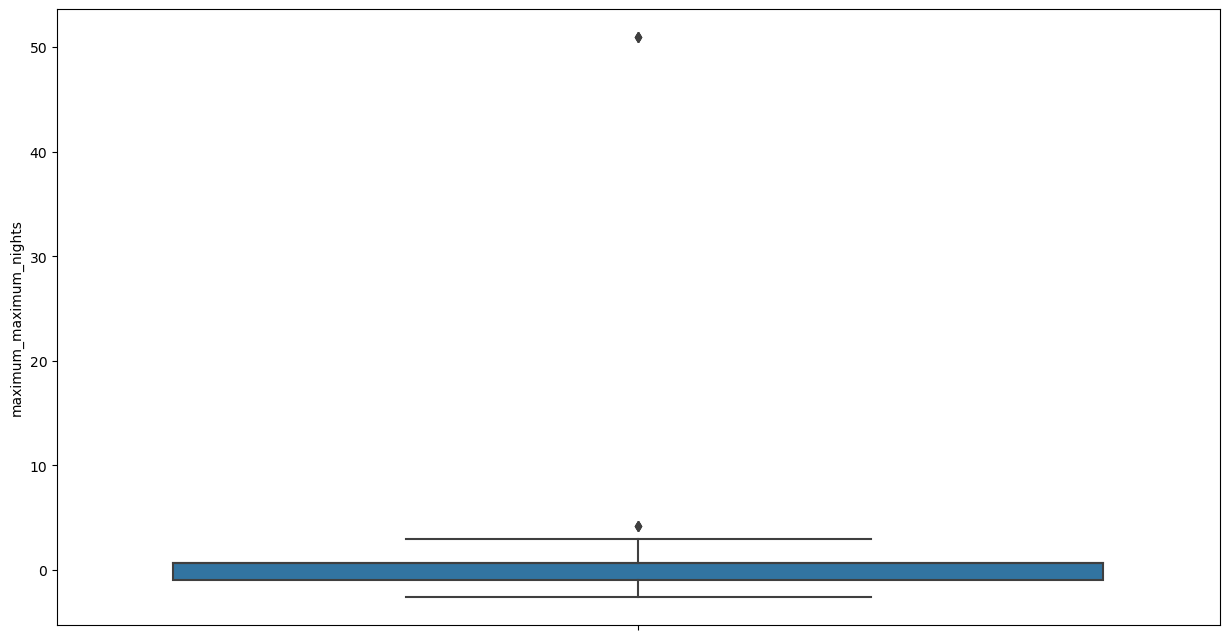

In [112]:
sns.boxplot(y = df_italy['maximum_maximum_nights'])

#### minimum_nights_avg_ntm

<AxesSubplot:ylabel='minimum_nights_avg_ntm'>

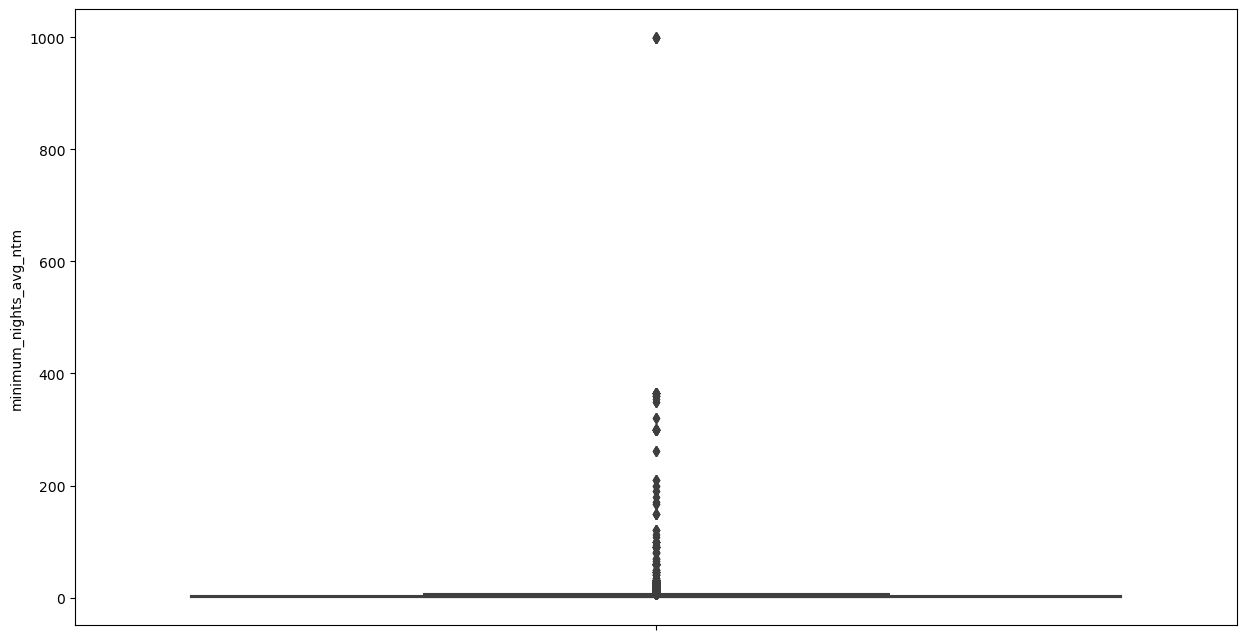

In [113]:
sns.boxplot(y = df_italy['minimum_nights_avg_ntm'])

In [114]:
df_italy['minimum_nights_avg_ntm'] = pt.fit_transform(df_italy[['minimum_nights_avg_ntm']])

<AxesSubplot:ylabel='minimum_nights_avg_ntm'>

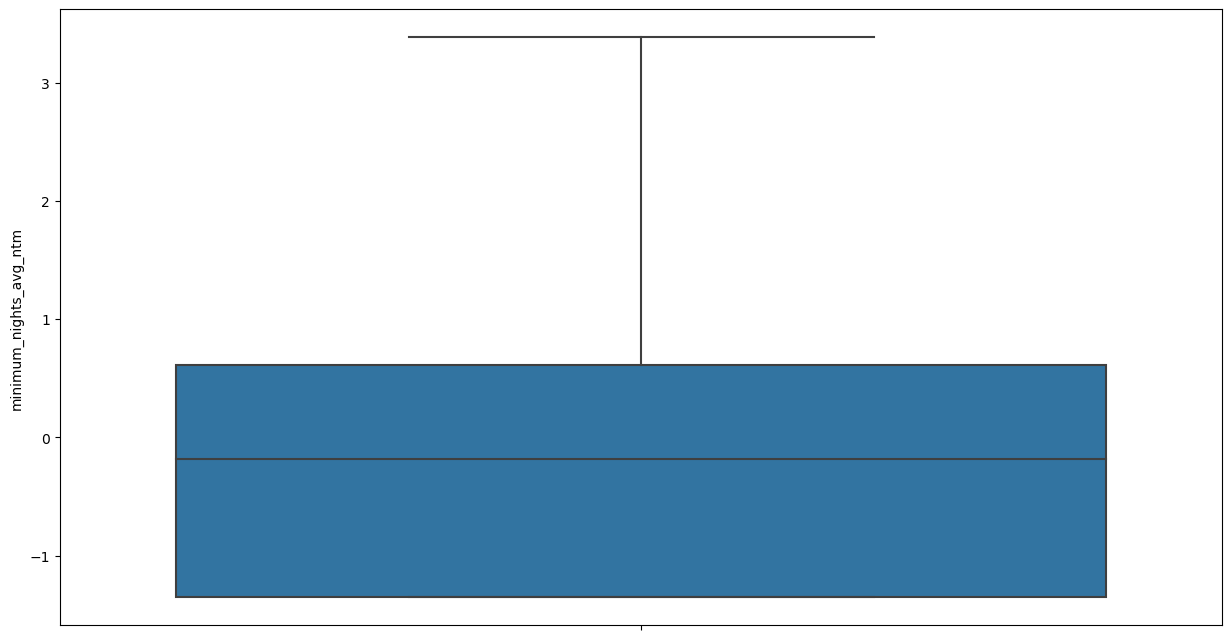

In [115]:
sns.boxplot(y = df_italy['minimum_nights_avg_ntm'])

#### maximum_nights_avg_ntm

<AxesSubplot:ylabel='maximum_nights_avg_ntm'>

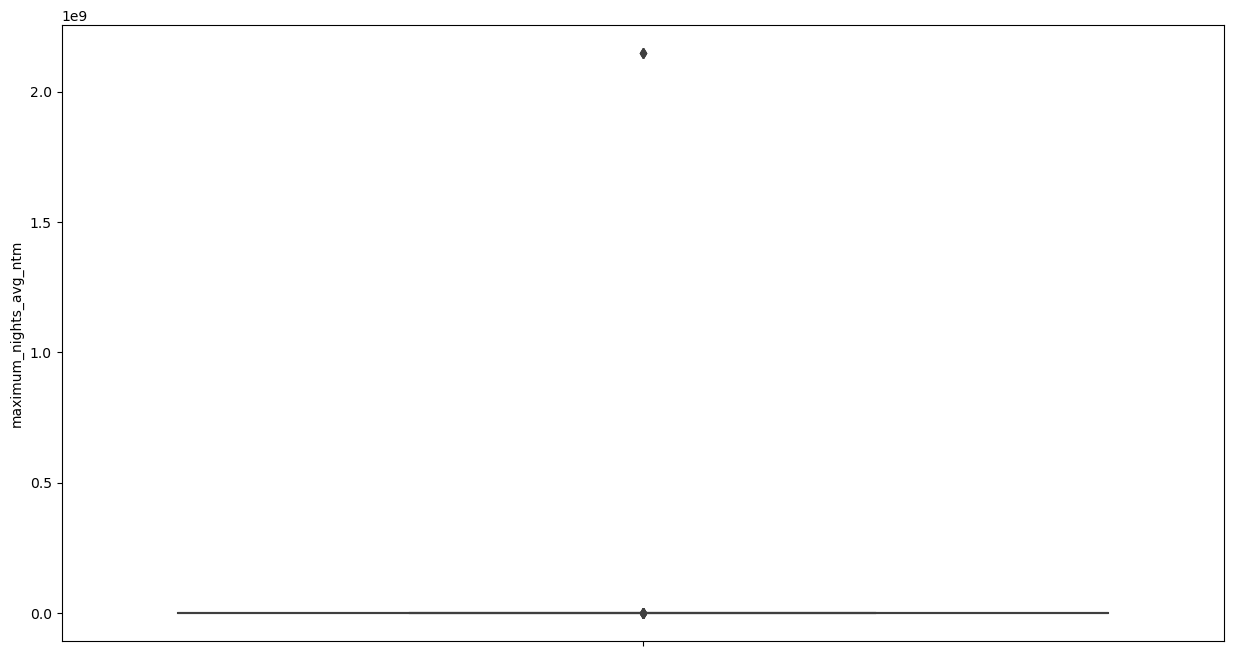

In [116]:
sns.boxplot(y = df_italy['maximum_nights_avg_ntm'])

In [117]:
df_italy['maximum_nights_avg_ntm'] = pt.fit_transform(df_italy[['maximum_nights_avg_ntm']])

<AxesSubplot:ylabel='maximum_nights_avg_ntm'>

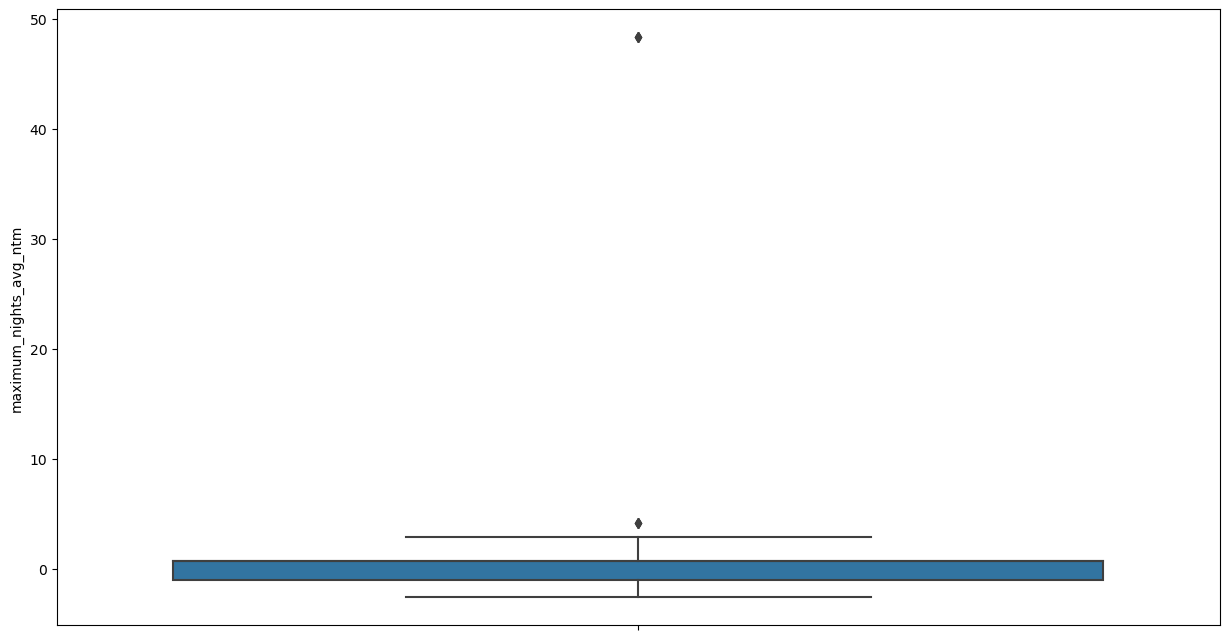

In [118]:
sns.boxplot(y = df_italy['maximum_nights_avg_ntm'])

#### availability_30

<AxesSubplot:ylabel='availability_30'>

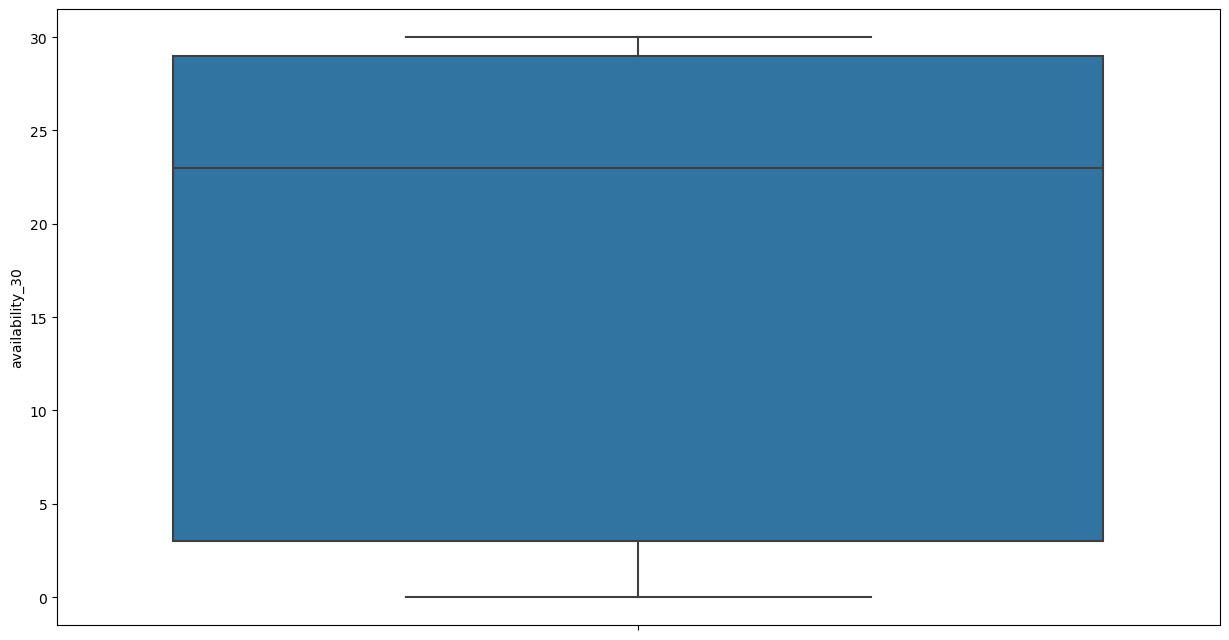

In [119]:
sns.boxplot(y = df_italy['availability_30'])

#### availability_60

<AxesSubplot:ylabel='availability_60'>

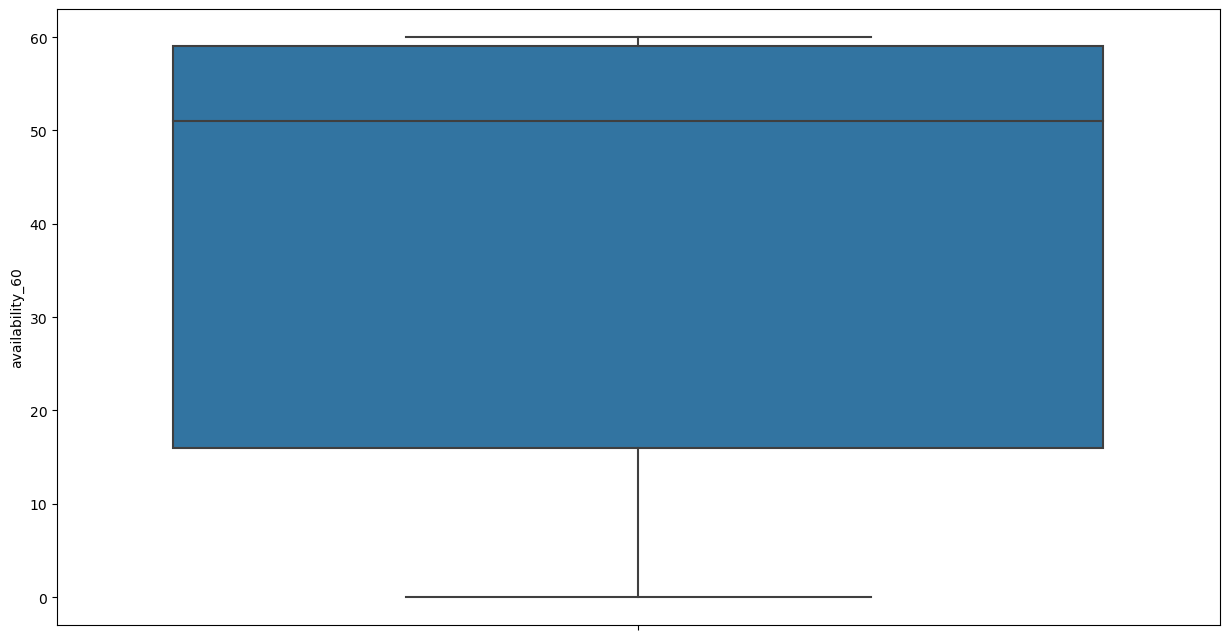

In [120]:
sns.boxplot(y = df_italy['availability_60'])

#### availability_90

<AxesSubplot:ylabel='availability_90'>

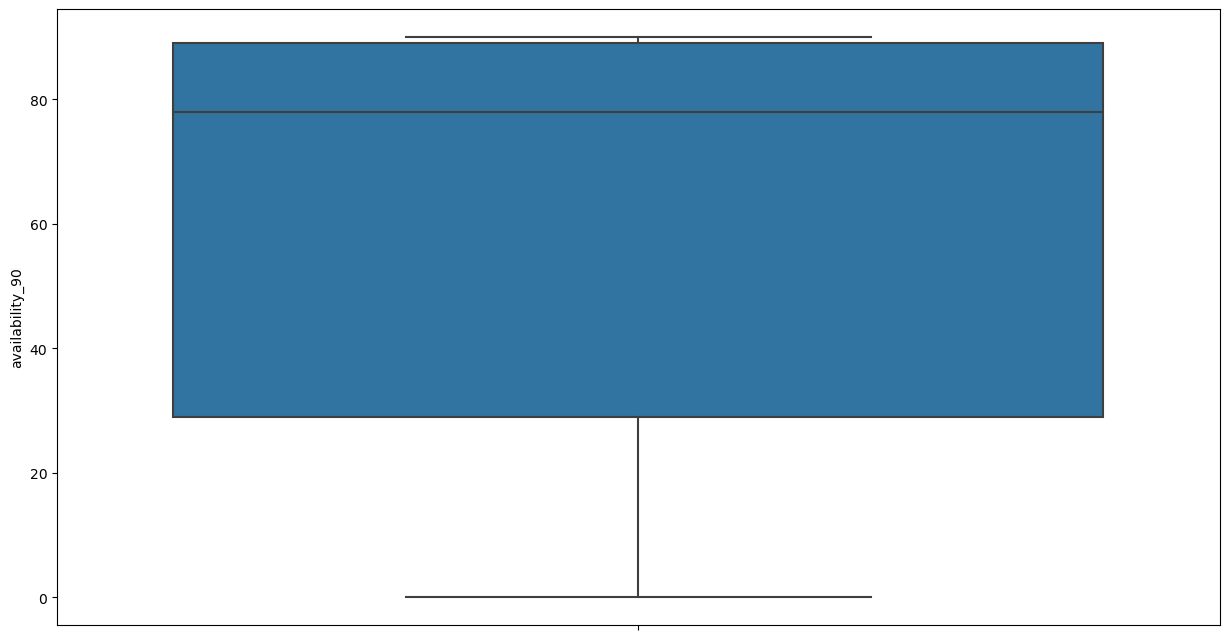

In [121]:
sns.boxplot(y = df_italy['availability_90'])

#### number_of_reviews

<AxesSubplot:ylabel='number_of_reviews'>

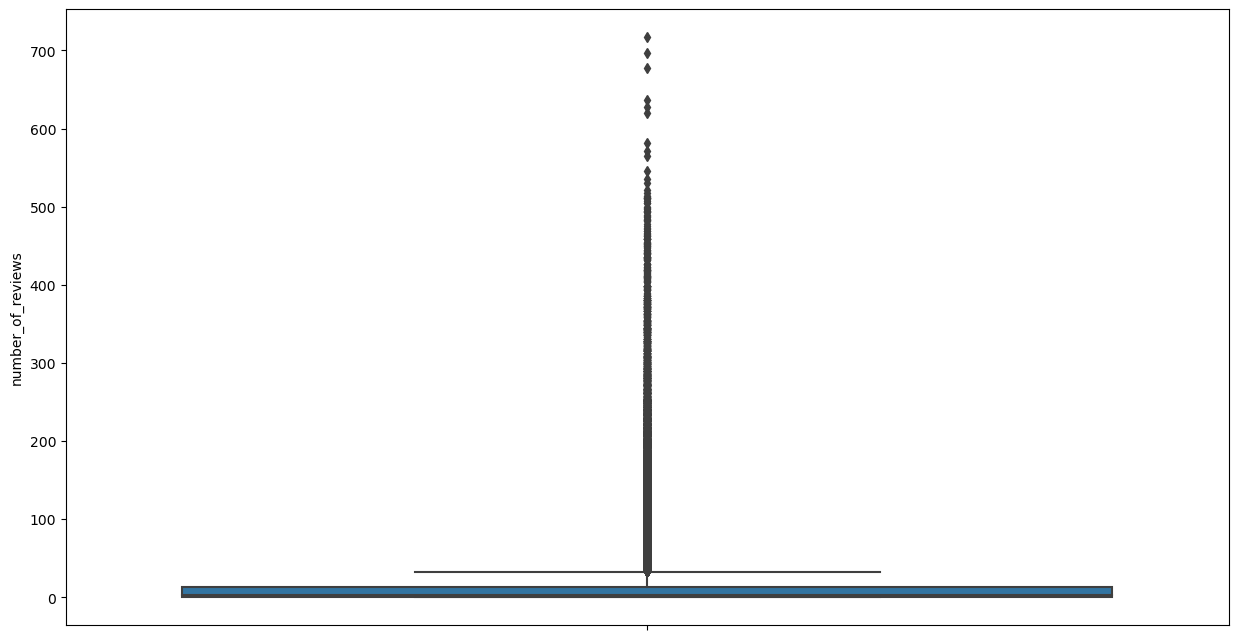

In [122]:
sns.boxplot(y = df_italy['number_of_reviews'])

In [123]:
df_italy['number_of_reviews'] = pt.fit_transform(df_italy[['number_of_reviews']])

<AxesSubplot:ylabel='number_of_reviews'>

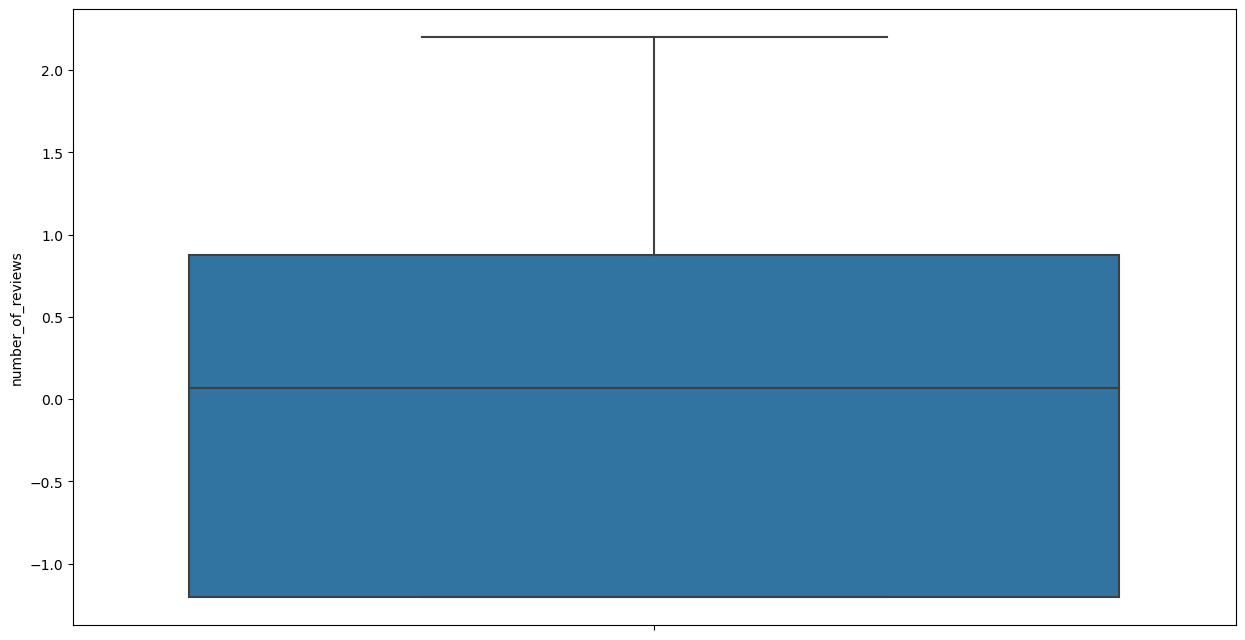

In [124]:
sns.boxplot(y = df_italy['number_of_reviews'])

#### number_of_reviews_ltm

<AxesSubplot:ylabel='number_of_reviews_ltm'>

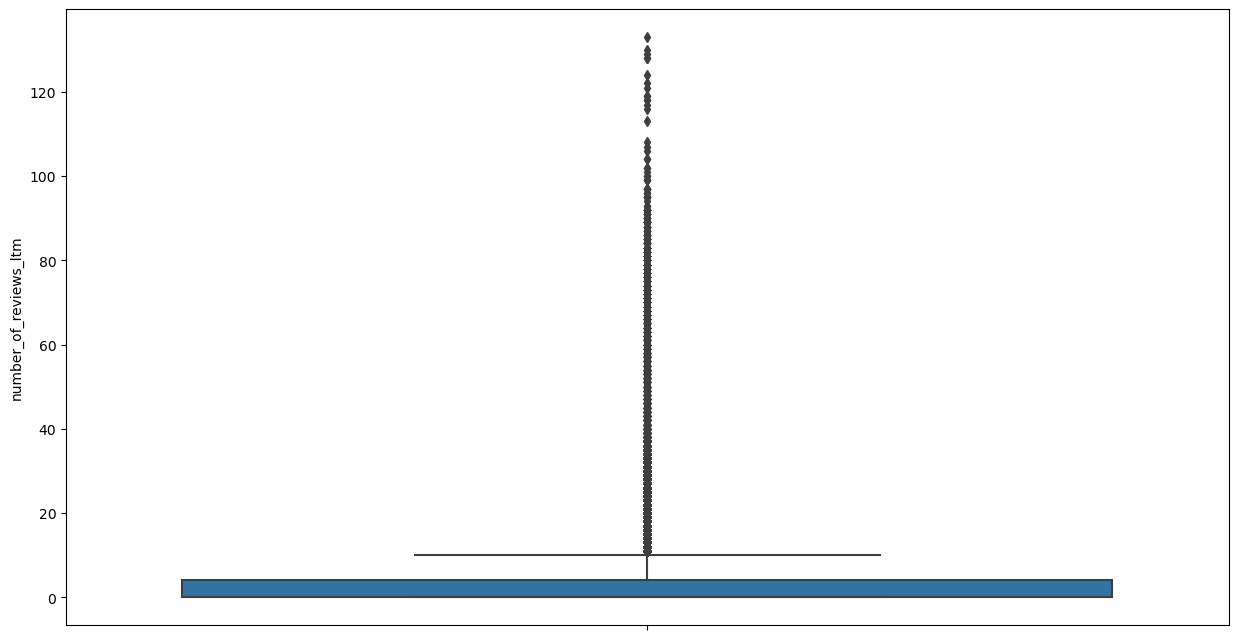

In [125]:
sns.boxplot(y = df_italy['number_of_reviews_ltm'])

In [126]:
df_italy['number_of_reviews_ltm'] = pt.fit_transform(df_italy[['number_of_reviews_ltm']])

<AxesSubplot:ylabel='number_of_reviews_ltm'>

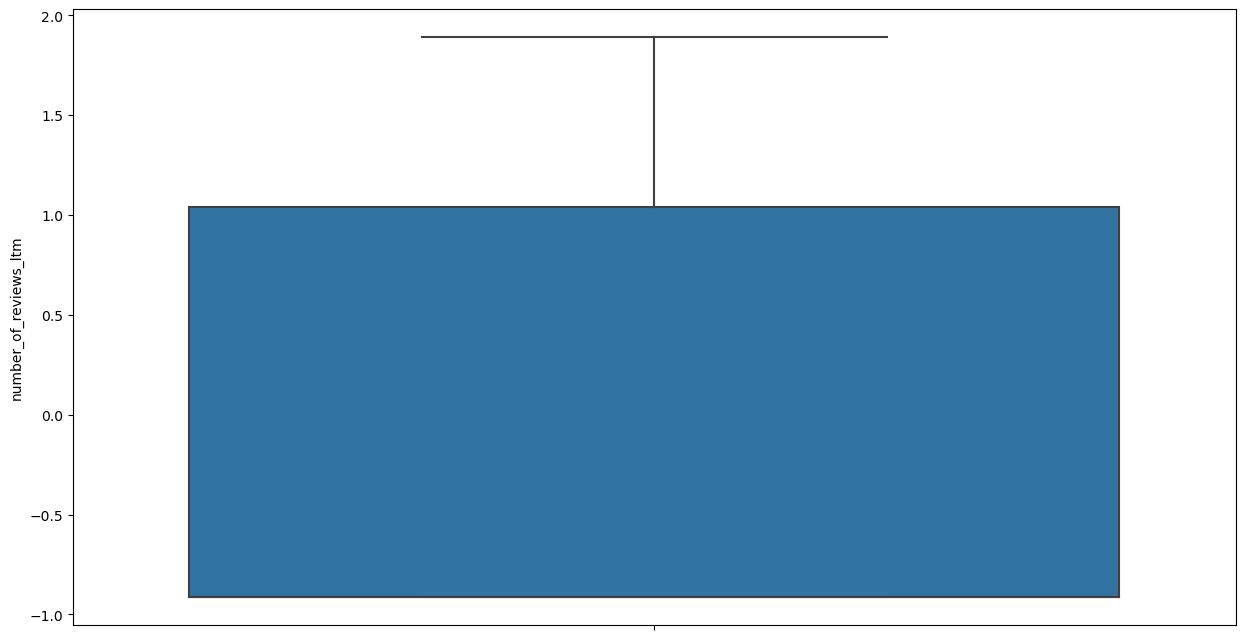

In [127]:
sns.boxplot(y = df_italy['number_of_reviews_ltm'])

#### number_of_reviews_l30d

<AxesSubplot:ylabel='number_of_reviews_l30d'>

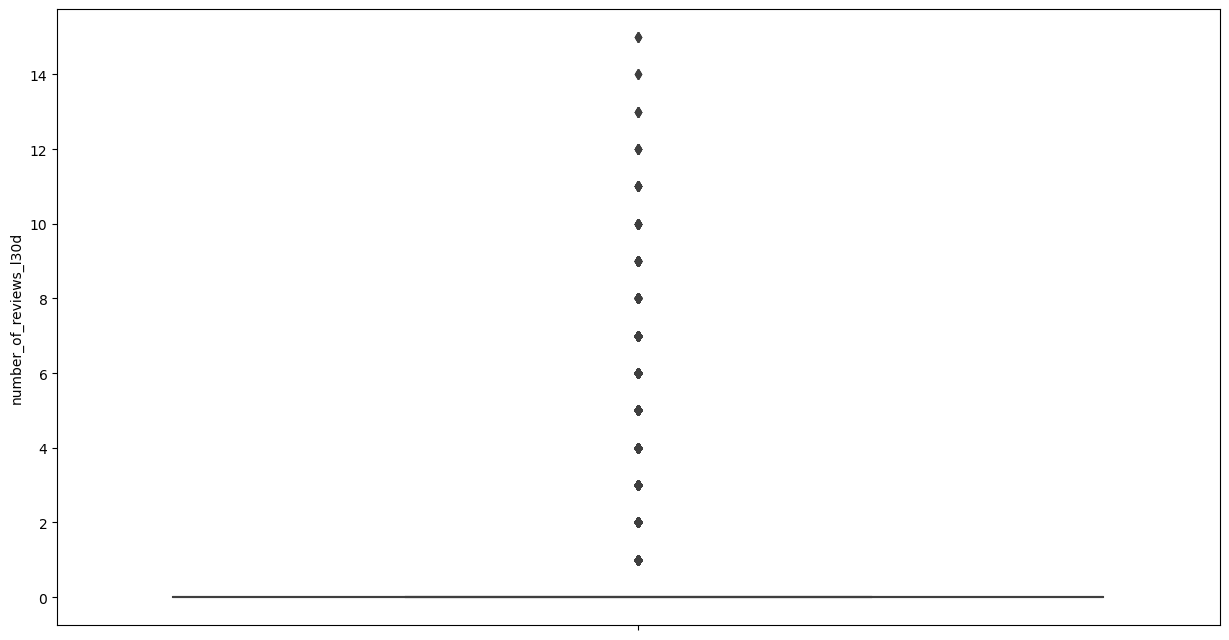

In [128]:
sns.boxplot(y = df_italy['number_of_reviews_l30d'])

In [129]:
df_italy['number_of_reviews_l30d'] = pt.fit_transform(df_italy[['number_of_reviews_l30d']])

<AxesSubplot:ylabel='number_of_reviews_l30d'>

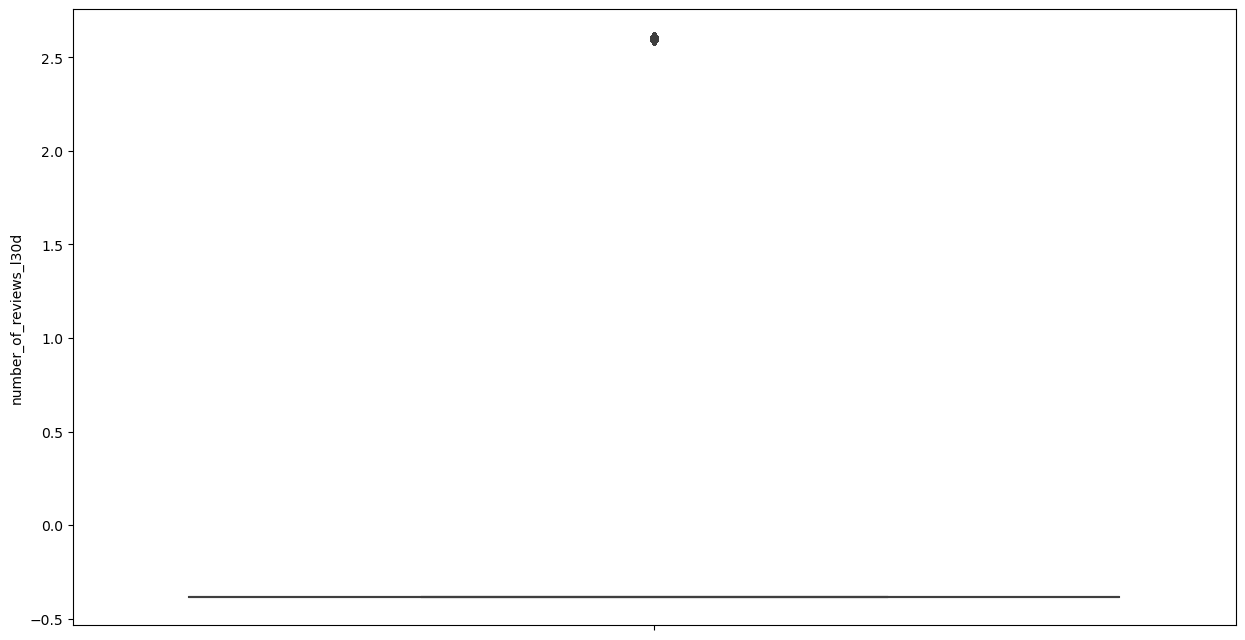

In [130]:
sns.boxplot(y = df_italy['number_of_reviews_l30d'])

#### review_scores_rating

<AxesSubplot:ylabel='review_scores_rating'>

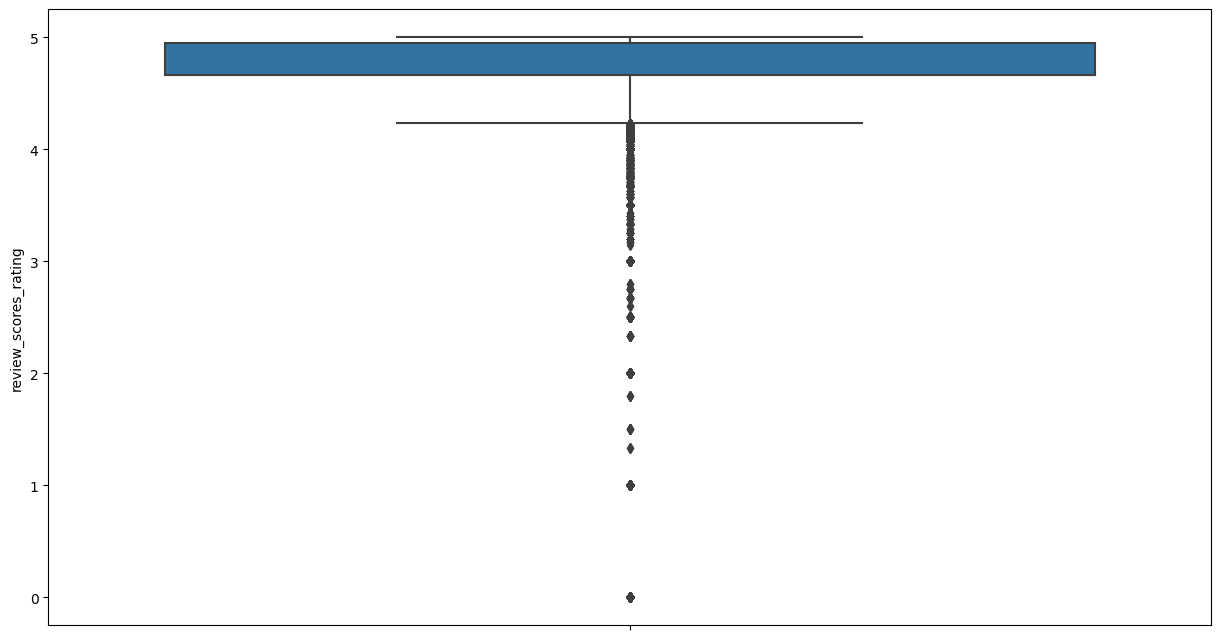

In [131]:
sns.boxplot(y = df_italy['review_scores_rating'])

In [132]:
df_italy['review_scores_rating'] = pt.fit_transform(df_italy[['review_scores_rating']])

<AxesSubplot:ylabel='review_scores_rating'>

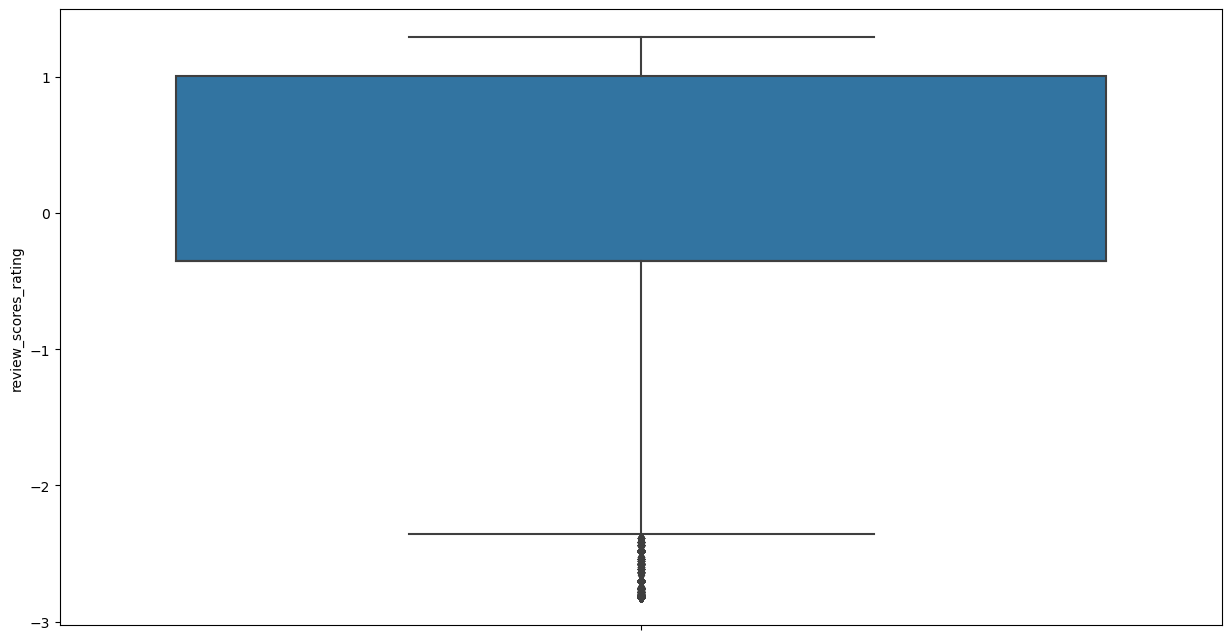

In [133]:
sns.boxplot(y = df_italy['review_scores_rating'])

#### review_scores_accuracy

<AxesSubplot:ylabel='review_scores_accuracy'>

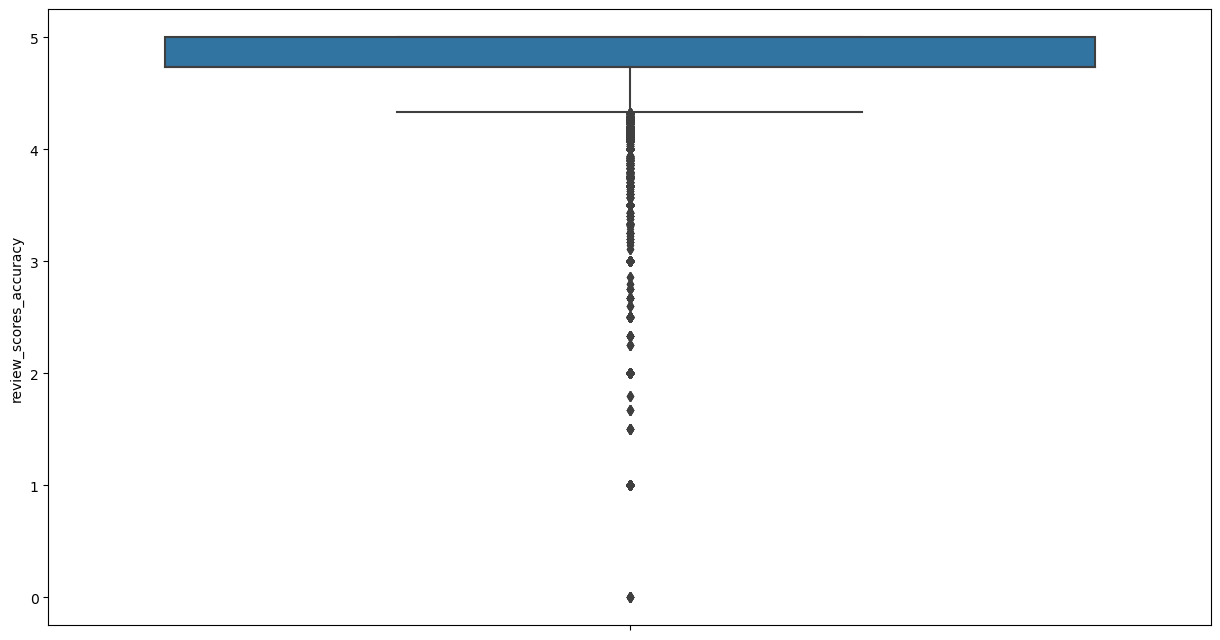

In [134]:
sns.boxplot(y = df_italy['review_scores_accuracy'])

In [135]:
df_italy['review_scores_accuracy'] = pt.fit_transform(df_italy[['review_scores_accuracy']])

<AxesSubplot:ylabel='review_scores_accuracy'>

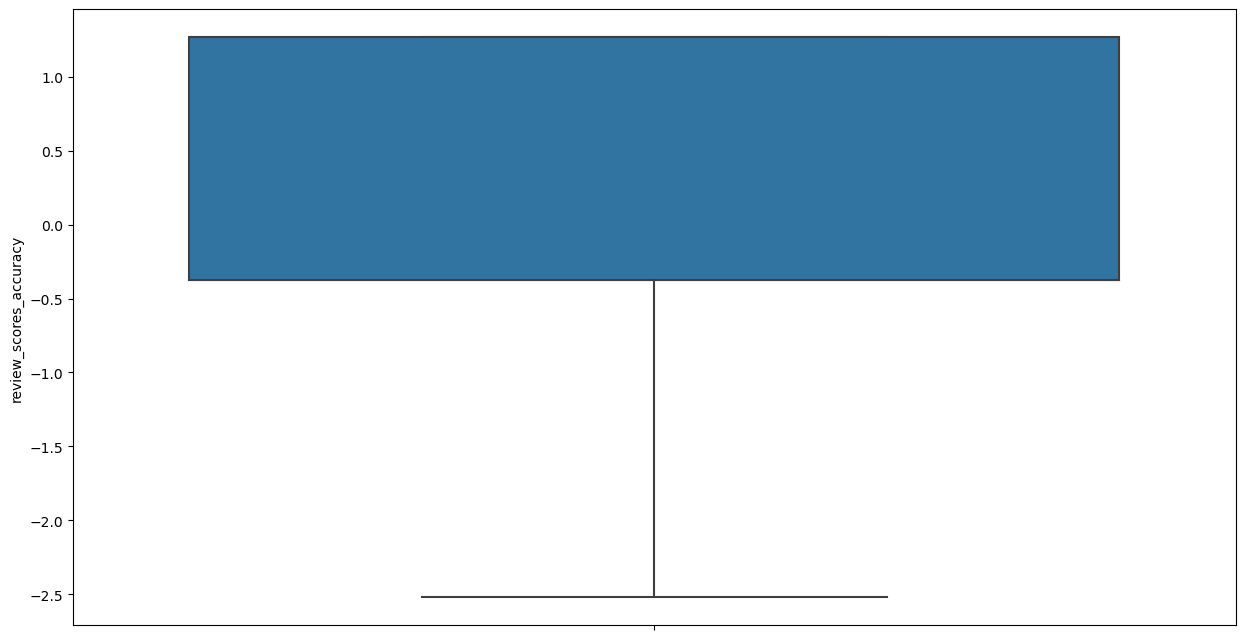

In [136]:
sns.boxplot(y = df_italy['review_scores_accuracy'])

#### review_scores_cleanliness

<AxesSubplot:ylabel='review_scores_cleanliness'>

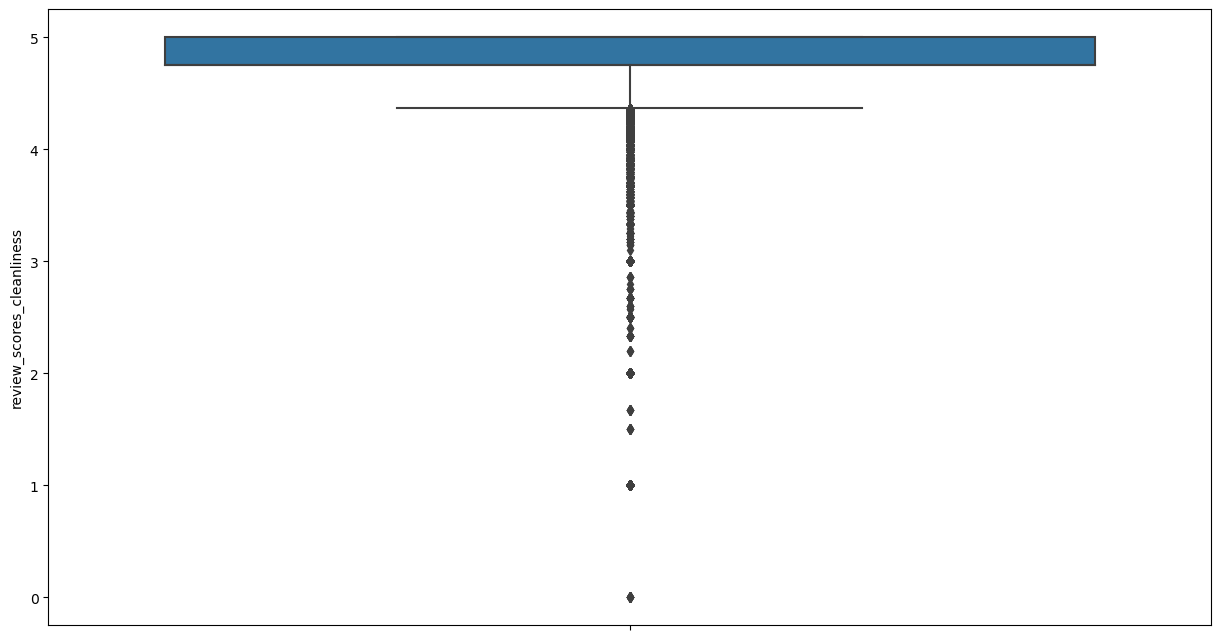

In [137]:
sns.boxplot(y = df_italy['review_scores_cleanliness'])

In [138]:
df_italy['review_scores_cleanliness'] = pt.fit_transform(df_italy[['review_scores_cleanliness']])

<AxesSubplot:ylabel='review_scores_cleanliness'>

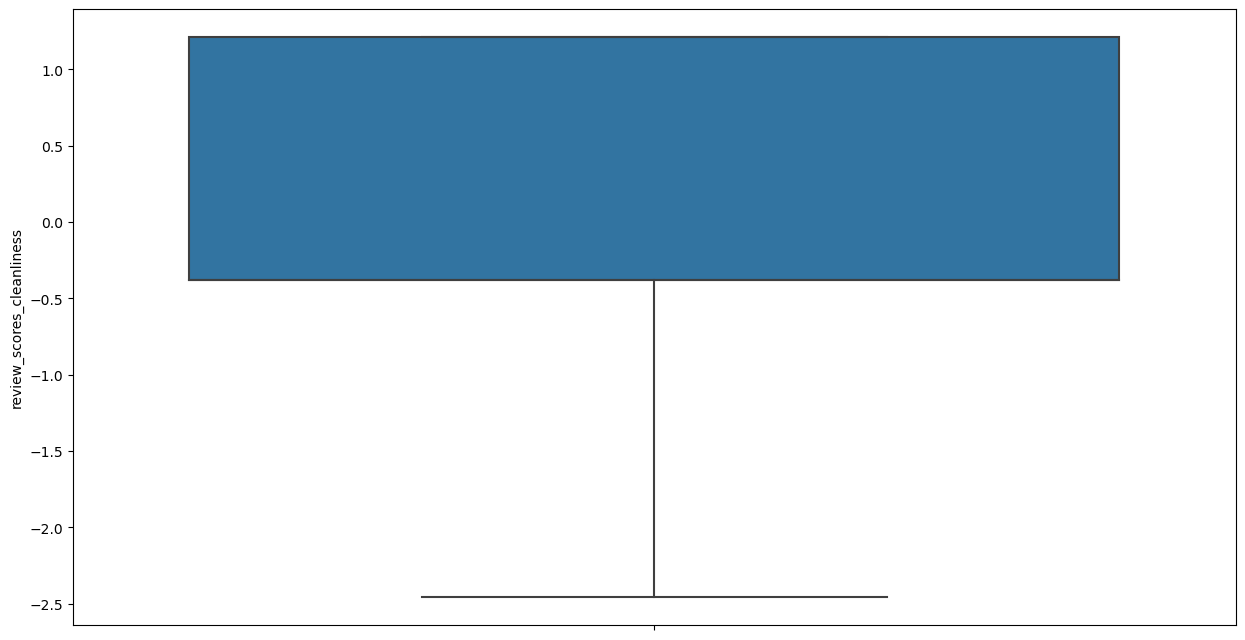

In [139]:
sns.boxplot(y = df_italy['review_scores_cleanliness'])

#### review_scores_checkin

<AxesSubplot:ylabel='review_scores_checkin'>

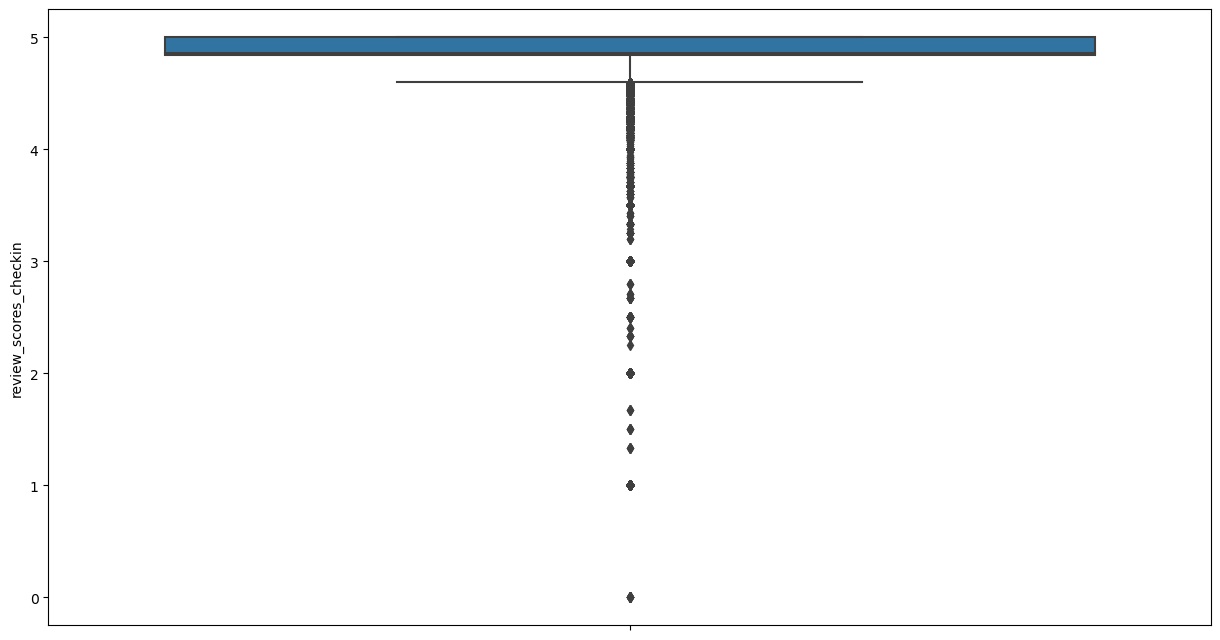

In [140]:
sns.boxplot(y = df_italy['review_scores_checkin'])

In [141]:
df_italy['review_scores_checkin'] = pt.fit_transform(df_italy[['review_scores_checkin']])

<AxesSubplot:ylabel='review_scores_checkin'>

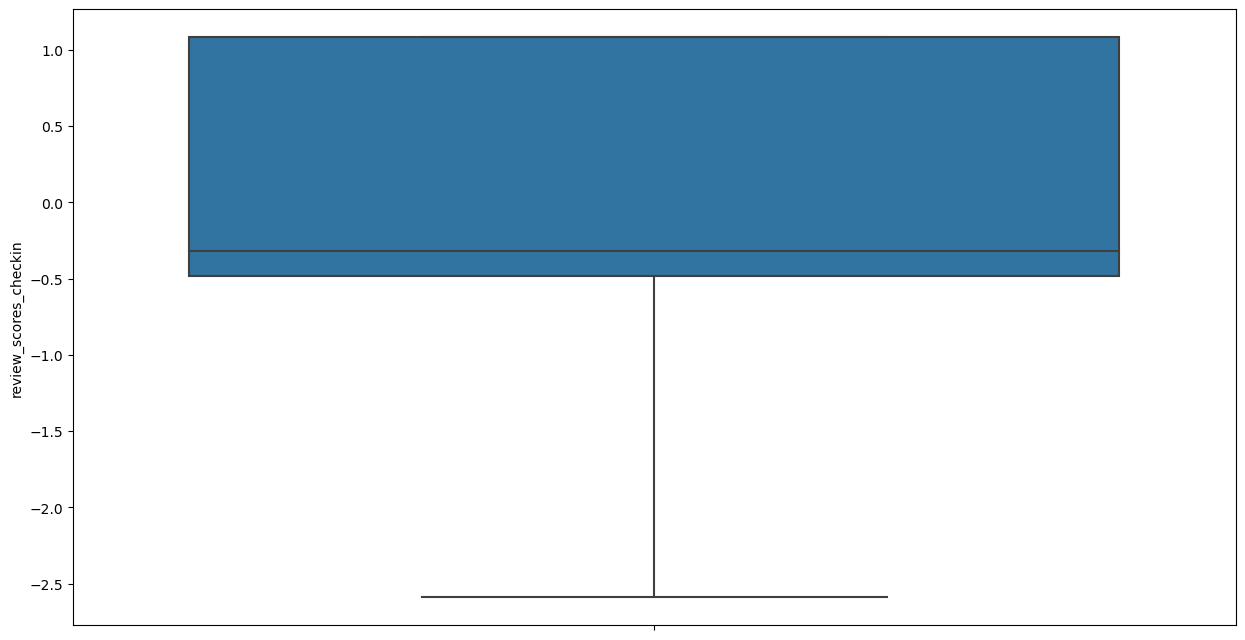

In [142]:
sns.boxplot(y = df_italy['review_scores_checkin'])

#### review_scores_communication

<AxesSubplot:ylabel='review_scores_communication'>

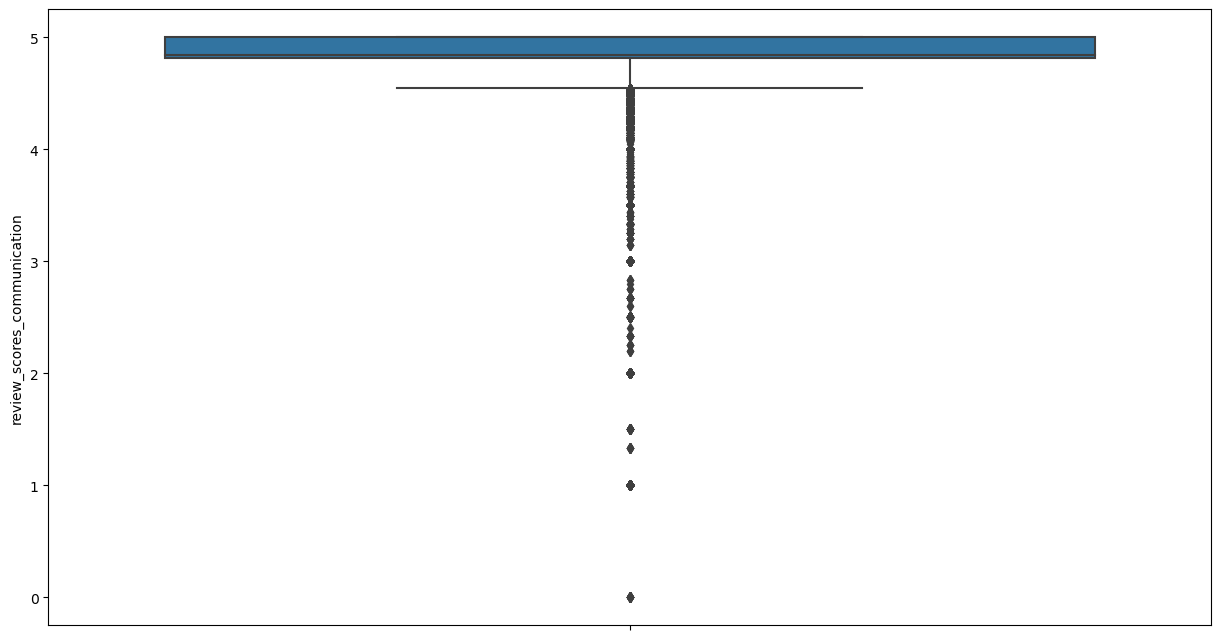

In [143]:
sns.boxplot(y = df_italy['review_scores_communication'])

In [144]:
df_italy['review_scores_communication'] = pt.fit_transform(df_italy[['review_scores_communication']])

<AxesSubplot:ylabel='review_scores_communication'>

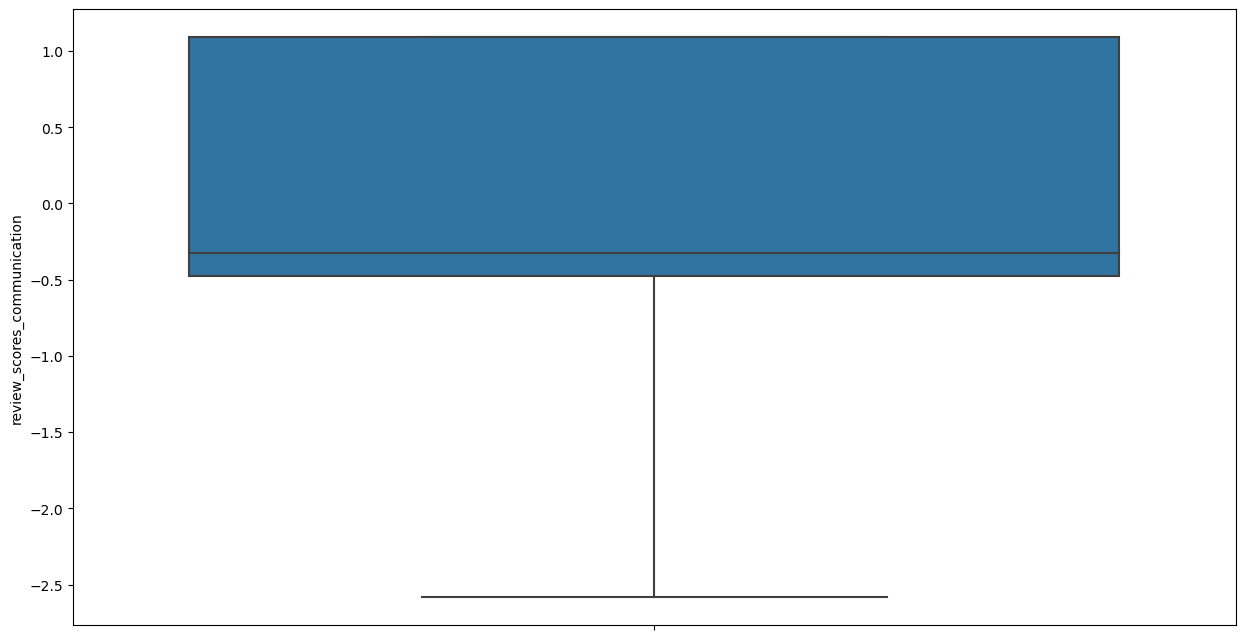

In [145]:
sns.boxplot(y = df_italy['review_scores_communication'])

#### review_scores_location

<AxesSubplot:ylabel='review_scores_location'>

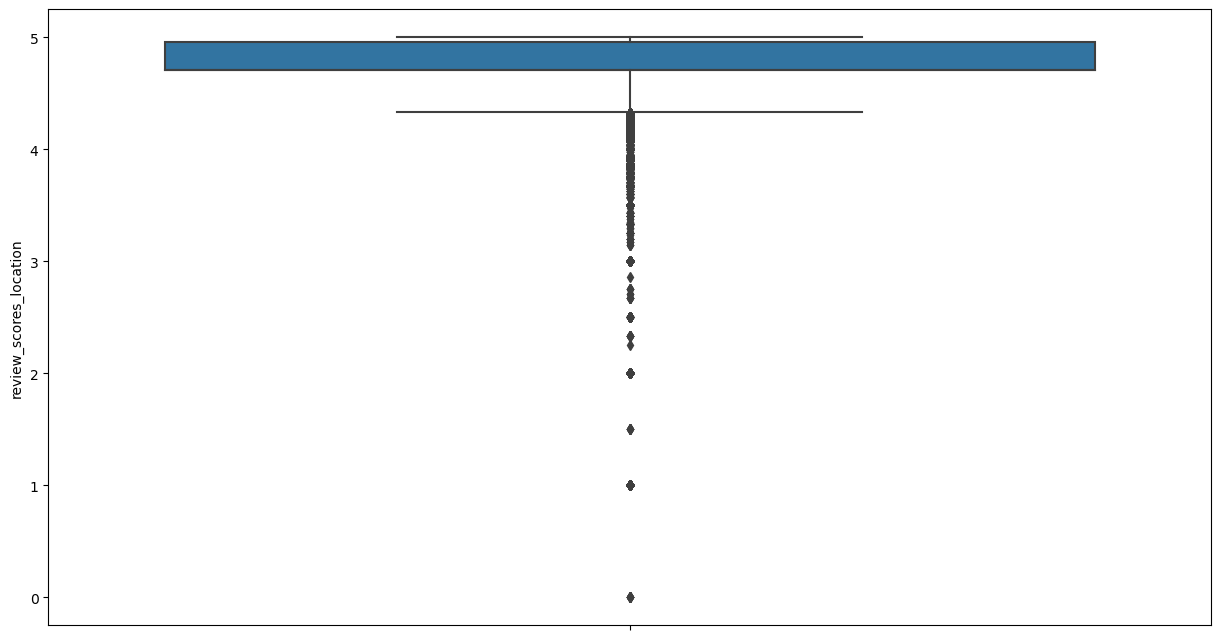

In [146]:
sns.boxplot(y = df_italy['review_scores_location'])

In [147]:
df_italy['review_scores_location'] = pt.fit_transform(df_italy[['review_scores_location']])

<AxesSubplot:ylabel='review_scores_location'>

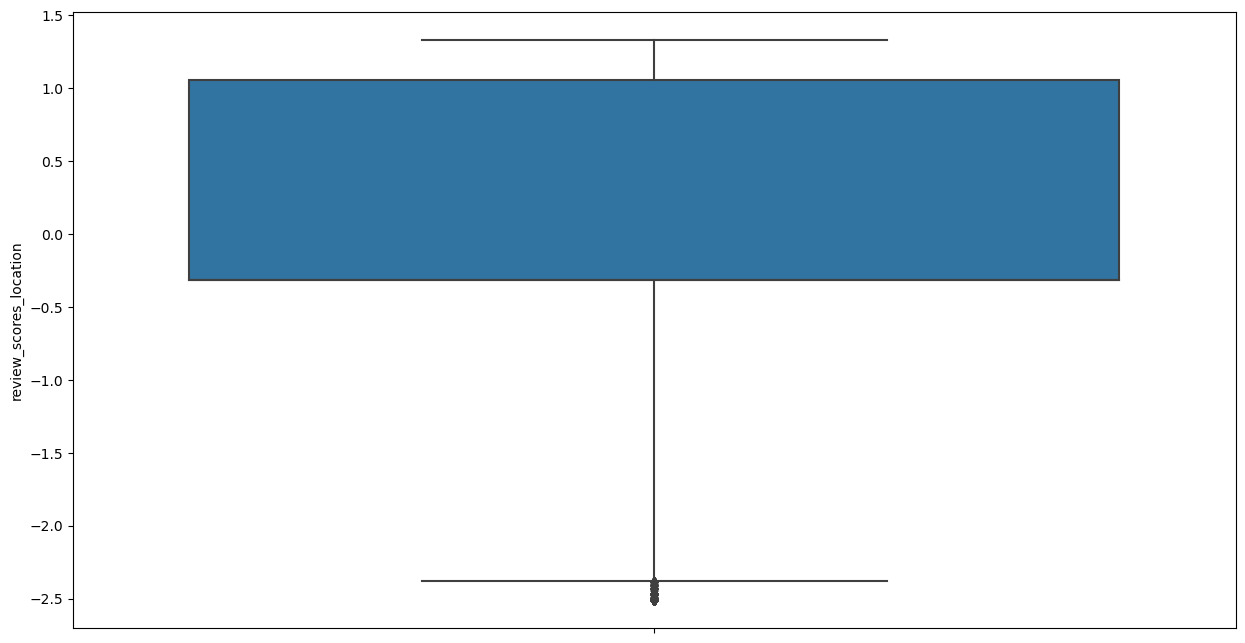

In [148]:
sns.boxplot(y = df_italy['review_scores_location'])

#### review_scores_value

<AxesSubplot:ylabel='review_scores_value'>

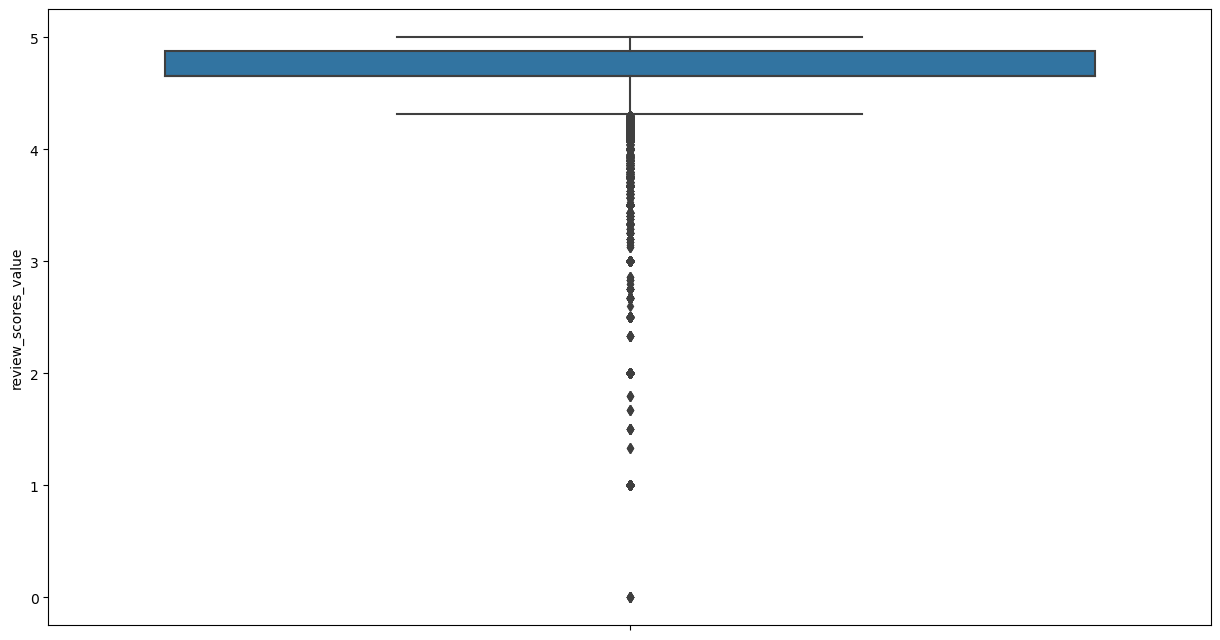

In [149]:
sns.boxplot(y = df_italy['review_scores_value'])

In [150]:
df_italy['review_scores_value'] = pt.fit_transform(df_italy[['review_scores_value']])

<AxesSubplot:ylabel='review_scores_value'>

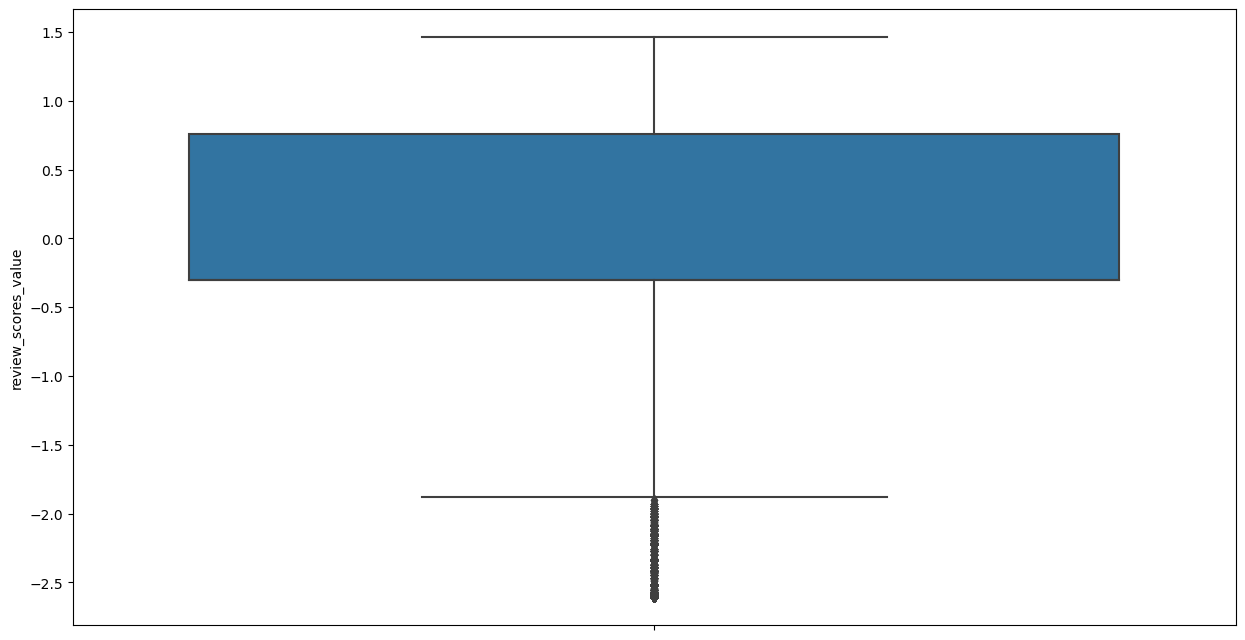

In [151]:
sns.boxplot(y = df_italy['review_scores_value'])

#### calculated_host_listings_count

<AxesSubplot:ylabel='calculated_host_listings_count'>

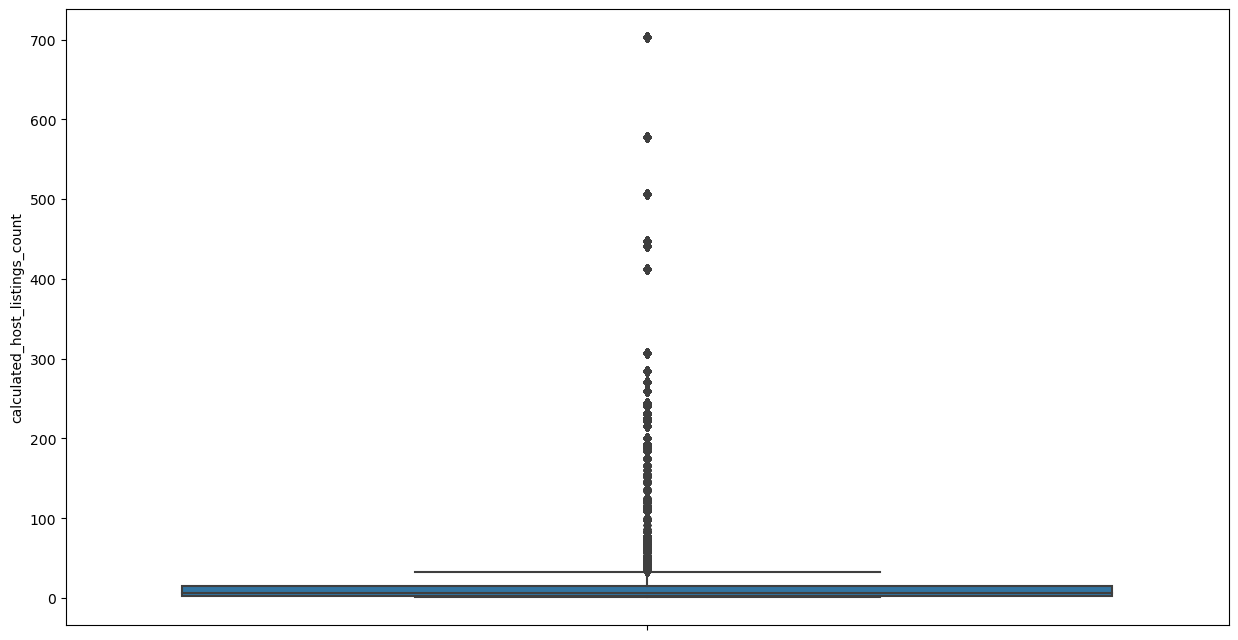

In [152]:
sns.boxplot(y = df_italy['calculated_host_listings_count'])

In [153]:
df_italy['calculated_host_listings_count'] = pt.fit_transform(df_italy[['calculated_host_listings_count']])

<AxesSubplot:ylabel='calculated_host_listings_count'>

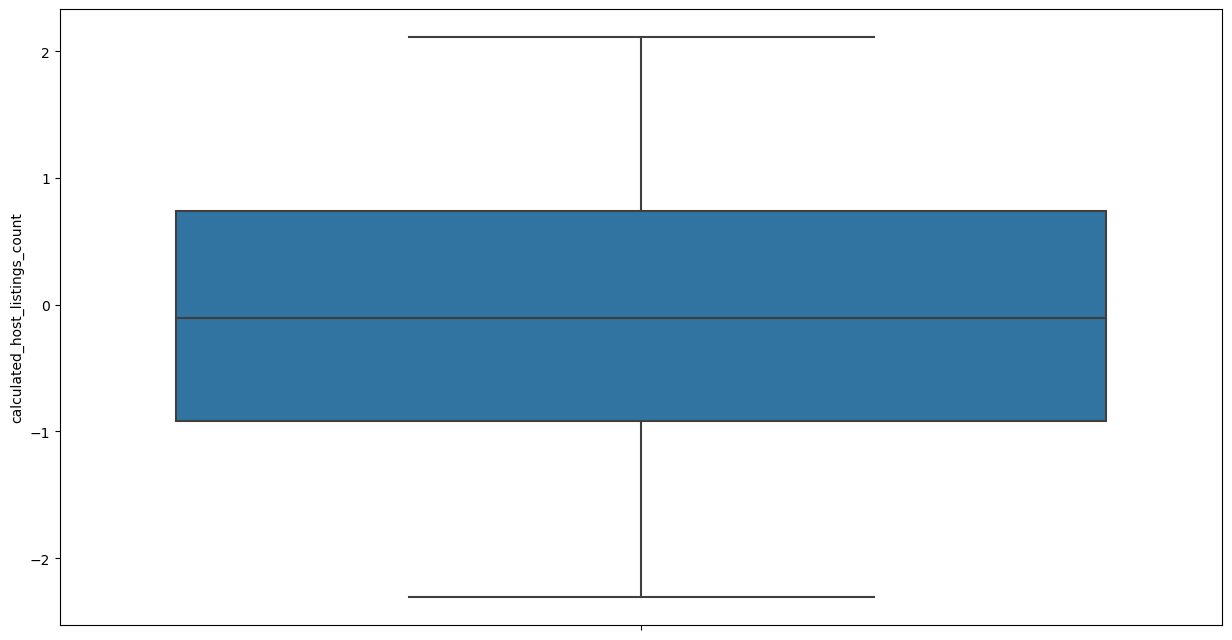

In [154]:
sns.boxplot(y = df_italy['calculated_host_listings_count'])

#### bathrooms

<AxesSubplot:ylabel='bathrooms'>

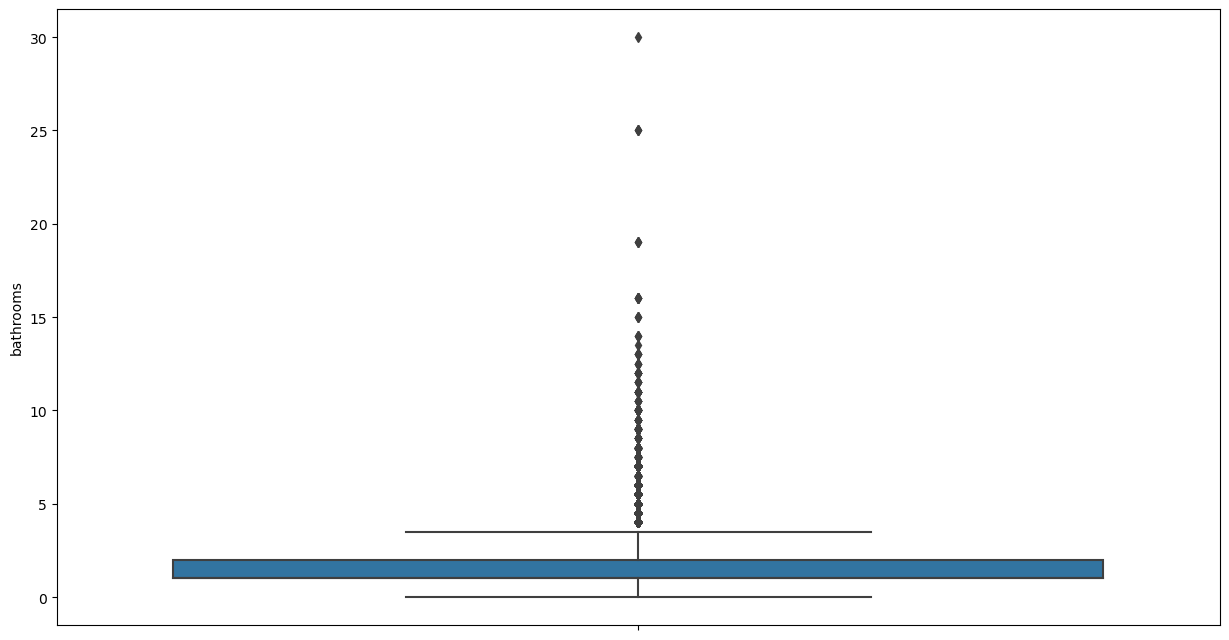

In [155]:
sns.boxplot(y = df_italy['bathrooms'])

In [156]:
df_italy['bathrooms'] = pt.fit_transform(df_italy[['bathrooms']])

<AxesSubplot:ylabel='bathrooms'>

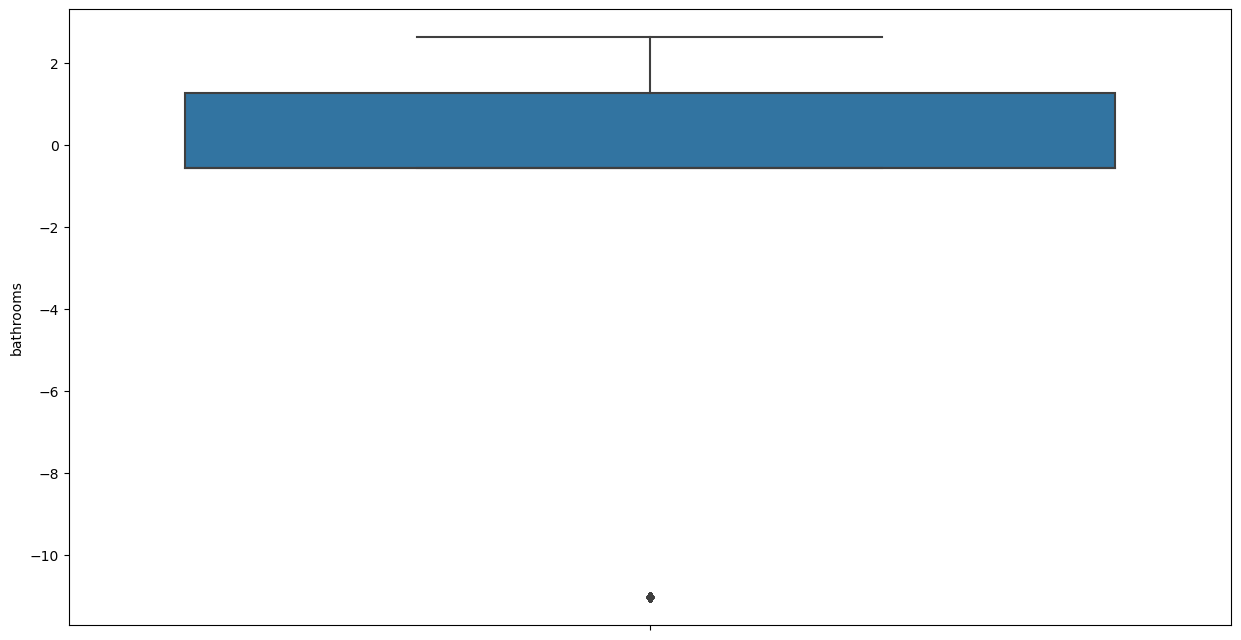

In [157]:
sns.boxplot(y = df_italy['bathrooms'])

### Encoding of Categorical variables

#### host_location

In [158]:
df_italy['host_location'].nunique()

1529

In [159]:
df_italy['host_location'].unique()

array(['Sicily, Italy', 'Bologna, Italy', 'Agrigento, Italy', ...,
       'Garitte Karuscia, Italy', 'Colorno, Italy',
       'Schinznach-Dorf, Switzerland'], dtype=object)

In [160]:
target = TargetEncoder()

df_italy['host_location'] = target.fit_transform(df_italy['host_location'],df_italy['price'])

#### host_response_time

In [161]:
df_italy['host_response_time'].unique()

array(['within an hour', 'within a day', 'a few days or more', 'unknown',
       'within a few hours'], dtype=object)

In [162]:
oe = OrdinalEncoder(categories = [['unknown','a few days or more','within a day','within an hour','within a few hours']])

df_italy['host_response_time'] = oe.fit_transform(df_italy[['host_response_time']])

df_italy['host_response_time'].unique()

array([3., 2., 1., 0., 4.])

#### host_is_superhost

In [163]:
df_italy['host_is_superhost'].unique()

array(['t', 'f'], dtype=object)

In [164]:
df_italy['host_is_superhost'] = df_italy['host_is_superhost'].replace({'t':1,'f':0})

df_italy['host_is_superhost'].unique()

array([1, 0], dtype=int64)

#### host_has_profile_pic

In [165]:
df_italy['host_has_profile_pic'].unique()

array(['t', 'f'], dtype=object)

In [166]:
df_italy['host_has_profile_pic'] = df_italy['host_has_profile_pic'].replace({'t':1,'f':0})

df_italy['host_has_profile_pic'].unique()

array([1, 0], dtype=int64)

#### host_identity_verified

In [167]:
df_italy['host_identity_verified'].unique()

array(['t', 'f'], dtype=object)

In [168]:
df_italy['host_identity_verified'] = df_italy['host_identity_verified'].replace({'t':1,'f':0})

df_italy['host_identity_verified'].unique()

array([1, 0], dtype=int64)

#### neighbourhood_cleansed

In [169]:
df_italy['neighbourhood_cleansed'].unique()

array(['Marsala', 'Petrosino', 'Agrigento', 'Rod Milici', 'Scicli',
       'Piedimonte Etneo', 'Roccalumera', 'Castellammare del Golfo',
       'Zafferana Etnea', 'Palermo', 'Malfa', 'Catania', 'Ragusa',
       'Erice', 'Letojanni', 'San Vito Lo Capo', 'Taormina', 'Siracusa',
       'Trappeto', 'Nicolosi', 'Acireale', 'Trapani', 'Mazara del Vallo',
       'Linguaglossa', 'Lipari', 'Sciacca', 'Montallegro',
       'Castelvetrano', 'Modica', 'Avola', 'Vittoria', 'Cefal', 'Patti',
       'Gibellina', 'Gioiosa Marea', 'Realmonte', 'Tusa',
       "Capo d'Orlando", 'Milazzo', 'Licata', 'Augusta', 'Noto',
       'Graniti', "Motta Sant'Anastasia", 'Misterbianco',
       'Altavilla Milicia', 'Librizzi', 'Alcamo', 'Pantelleria',
       "Forza d'Agr", 'Pachino', 'Belpasso', 'Buseto Palizzolo',
       'Santa Croce Camerina', 'Valderice', 'Acquedolci', 'Ustica',
       'Monreale', 'Trabia', 'Terrasini', 'Mascali', 'Viagrande',
       'Valverde', 'Aci Catena', 'Termini Imerese', 'Isola delle Femmine

In [170]:
df_italy['neighbourhood_cleansed'] = target.fit_transform(df_italy['neighbourhood_cleansed'], df_italy['price'])

#### room_type

In [171]:
df_italy['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [172]:
oe = OrdinalEncoder(categories = [['Shared room','Private room','Hotel room','Entire home/apt']])

df_italy['room_type'] = oe.fit_transform(df_italy[['room_type']])

df_italy['room_type'].unique()

array([3., 1., 2., 0.])

#### has_availability

In [173]:
df_italy['has_availability'].unique()

array(['t', 'f'], dtype=object)

In [174]:
df_italy['has_availability'] = df_italy['has_availability'].replace({'t':1,'f':0})

df_italy['has_availability'].unique()

array([1, 0], dtype=int64)

#### instant_bookable

In [175]:
df_italy['instant_bookable'].unique()

array(['t', 'f'], dtype=object)

In [176]:
df_italy['instant_bookable'] = df_italy['instant_bookable'].replace({'t':1,'f':0})

df_italy['instant_bookable'].unique()

array([1, 0], dtype=int64)

In [177]:
df_italy.columns

Index(['host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookabl

### Splitting of dataset into 70:30

In [178]:
x = df_italy.drop(columns = ['host_since','host_location','first_review','last_review','price','latitude','longitude'
                            ,'amenities'])
y = df_italy['price']

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30 , random_state= 24)

#### Features and Target Variable: The feature columns, which are used to predict the target variable, are extracted from the dataset and stored in the variable x. The target variable, which is the column 'price', is stored in the variable y.

Splitting Ratio: The dataset is split into a training set and a test set using the train_test_split() function from the scikit-learn library. The test set size is set to 30% of the entire dataset (test_size = 0.30), while the training set size is implicitly set to 70% of the dataset.

Random State: The random_state parameter is set to 24, which ensures that the random splitting of the dataset is reproducible. This means that each time the code is run with the same random_state value, the same splitting outcome will be obtained.

Split Variables: The resulting training and test sets are stored in the variables xtrain, xtest, ytrain, and ytest. xtrain and ytrain represent the features and target variable of the training set, while xtest and ytest represent the features and target variable of the test set.

### Scaling of data

In [179]:
cols = ['host_response_rate','host_acceptance_rate','accommodates','bedrooms','beds','minimum_nights',
       'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30',
       'availability_60', 'availability_90', 'availability_365','number_of_reviews', 'number_of_reviews_ltm', 
       'number_of_reviews_l30d','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value',
       'calculated_host_listings_count','bathrooms']

for i in cols:
        xtrain[i] = StandardScaler().fit_transform(xtrain[[i]])
        xtest[i] = StandardScaler().fit_transform(xtest[[i]])

#### Scaling Purpose: Scaling is typically performed to standardize the range of features or variables in a dataset. It ensures that each feature has a mean of 0 and a standard deviation of 1. Scaling can be useful in certain machine learning algorithms that are sensitive to the scale of the input features.

Columns Selected: The code snippet selects specific columns from the dataset for scaling. These columns include variables such as 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'host_total_listings_count', and 'bathrooms'.

StandardScaler: The StandardScaler() function is used to perform the scaling operation. It calculates the mean and standard deviation of each feature and then scales the data accordingly.

Fit and Transform: The fit_transform() method is applied to both the training data (xtrain) and the test data (xtest) for each selected column. This ensures that the scaling parameters (mean and standard deviation) are estimated from the training data and applied to both the training and test data consistently.

In-Place Transformation: The scaling is performed in-place, meaning that the original columns in the dataframes (xtrain and xtest) are modified with the scaled values.

By scaling the selected columns, the range and distribution of the variables will be standardized, which can help in achieving better model performance, particularly for algorithms that rely on the scale of the input features.

In [199]:
!pip install pillow

# Building a base model

In [200]:
from PIL import ImageGrab

# Capture the content of the cell
image = ImageGrab.grab(bbox=(0, 0, 800, 600))  # Adjust the bounding box as per your needs

# Save the image as a JPG file
image.save('BaseModel.jpg', 'JPEG')

model_lr = sma.OLS(ytrain,sma.add_constant(xtrain)).fit()

model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     1354.
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        02:07:37   Log-Likelihood:            -1.3611e+05
No. Observations:              110808   AIC:                         2.723e+05
Df Residuals:                  110769   BIC:                         2.727e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0281      0.075     -0.372      0.710      -0.176       0.120
host_id                         8.997e-11   1.89e-11      4.767      0.000     5.3e-11    1.27e-10
host_response_time                -0.0355      0.002    -16.262      0.000      -0.040      -0.031
host_response_rate                 0.0107      0.003      3.667      0.000       0.005       0.016
host_acceptance_rate               0.0461      0.003     15.519      0.000       0.040       0.052
host_is_superhost                  0.1021      0.008     13.214      0.000       0.087       0.117
host_has_profile_pic               0.0185      0.014      1.351      0.177      -0.008       0.045
host_identity_verified             0.0650      0.006     10.756      0.000       0.053       0.077
neighbourhood_cleansed             0.6837      0.010     67.627      0.000       0.664       0.703
room_type                          0.0419      0.004     10.970      0.000       0.034       0.049
accommodates                       0.2087      0.005     43.988      0.000       0.199       0.218
bedrooms                           0.1001      0.004     24.594      0.000       0.092       0.108
beds                              -0.0697      0.004    -15.984      0.000      -0.078      -0.061
minimum_nights                     0.0271      0.007      4.157      0.000       0.014       0.040
maximum_nights                     0.0310      0.003      9.440      0.000       0.025       0.037
minimum_minimum_nights            -0.0250      0.003     -9.701      0.000      -0.030      -0.020
maximum_minimum_nights             0.1452      0.008     18.920      0.000       0.130       0.160
minimum_maximum_nights             0.0010      0.007      0.136      0.891      -0.013       0.015
maximum_maximum_nights             0.0166      0.014      1.187      0.235      -0.011       0.044
minimum_nights_avg_ntm            -0.1020      0.011     -9.677      0.000      -0.123      -0.081
maximum_nights_avg_ntm            -0.0357      0.017     -2.086      0.037      -0.069      -0.002
has_availability                  -0.1259      0.074     -1.712      0.087      -0.270       0.018
availability_30                    0.0009      0.009      0.096      0.924      -0.017       0.019
availability_60                    0.0153      0.019      0.813      0.416      -0.022       0.052
availability_90                    0.0088      0.014      0.638      0.524      -0.018       0.036
availability_365                   0.0104      0.004      2.941      0.003       0.003       0.017
number_of_reviews                 -0.2136      0.004    -48.639      0.000      -0.222      -0.205
number_of_reviews_ltm              0.0196      0.005      4.316      0.000       0.011       0.029
number_of_revi

#### The provided output is the summary of the OLS regression results for the model. Here are some inferences that can be drawn from the summary:

- Dependent Variable: The dependent variable in the regression analysis is "price."

- R-squared: The R-squared value of 0.318 indicates that the independent variables explain approximately 31.8% of the variance in the dependent variable.

- Coefficients: Each independent variable's coefficient represents the estimated impact on the dependent variable. For example, the coefficient for "host_id" is 8.812e-11, indicating that a unit increase in "host_id" is associated with a very small increase in "price."

- p-values: The p-values assess the statistical significance of the coefficients. A p-value less than 0.05 indicates that the coefficient is statistically significant. For instance, variables like "host_response_time," "host_response_rate," "host_acceptance_rate," "host_is_superhost," and many others have p-values less than 0.05, suggesting a significant relationship with the dependent variable.

- Confidence Intervals: The range of values within the brackets [0.025, 0.975] represents the 95% confidence interval for each coefficient. It provides a range of plausible values for the true population coefficient.

- F-statistic: The F-statistic tests the overall significance of the model. In this case, the F-statistic is 1359, and the associated p-value is 0.00, indicating that the model as a whole is statistically significant.

- AIC and BIC: The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are measures of the model's goodness of fit. Lower values of AIC and BIC indicate a better fit. In this case, the AIC is 2.722e+05 and the BIC is 2.725e+05.

- Durbin-Watson: The Durbin-Watson statistic is used to test for autocorrelation in the residuals. A value around 2 indicates no significant autocorrelation. In this case, the Durbin-Watson value is 1.991, suggesting no strong autocorrelation.

Overall, the model shows some statistically significant relationships between the independent variables and the dependent variable. However, it is important to consider the context and interpret the coefficients and statistical measures in relation to the specific dataset and research question.

In [181]:
pred_train = model_lr.predict(sma.add_constant(xtrain))
pred_test = model_lr.predict(sma.add_constant(xtest))

In [182]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))
r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)

print('RMSE Train',rmse_train)
print('RMSE Test',rmse_test)
print('R2 Train',r2_train)
print('R2 Test',r2_test)

RMSE Train 0.8264603347182223
RMSE Test 0.8283216805187187
R2 Train 0.317158596063573
R2 Test 0.3134206294419468


####  Based on the provided values of RMSE (Root Mean Square Error) and R2 (coefficient of determination) for the training and test sets, we can draw the following inferences:

1. RMSE Train: The value of RMSE for the training set is 0.8259. RMSE measures the average difference between the predicted and actual values of the target variable. A lower RMSE indicates a better fit of the model to the training data. In this case, the model has an RMSE of 0.8259 on the training set, indicating that, on average, the predicted values deviate by approximately 0.8259 units from the actual values.

2. RMSE Test: The value of RMSE for the test set is 0.8277. This measures the average difference between the predicted and actual values of the target variable on the unseen test data. Similar to the training set, a lower RMSE on the test set indicates better predictive performance. In this case, the model has an RMSE of 0.8277 on the test set, suggesting that, on average, the predicted values deviate by approximately 0.8277 units from the actual values.

3. R2 Train: The value of R2 for the training set is 0.3180. R2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where a higher value indicates a better fit of the model. In this case, the model explains approximately 31.80% of the variance in the training data, indicating a moderate fit.

4. R2 Test: The value of R2 for the test set is 0.3144. This represents the proportion of the variance in the dependent variable that is explained by the independent variables on the unseen test data. Similar to the training set, a higher R2 on the test set indicates a better fit. In this case, the model explains approximately 31.44% of the variance in the test data, which is consistent with the performance on the training set.

Overall, based on the given values, the model seems to have a moderate fit and generalization performance. However, the interpretation of these results depends on the specific context and the comparison with alternative models or baselines. It is also important to consider other evaluation metrics and assess the model's performance against specific requirements or objectives.

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain.values,i))
    
pd.DataFrame({'Columns': xtrain.columns , 'VIF': vif})

,Columns,VIF
0,host_id,3.042585
1,host_response_time,5.074101
2,host_response_rate,1.392472
3,host_acceptance_rate,1.428610
4,host_is_superhost,1.578576
5,host_has_profile_pic,28.253116
6,host_identity_verified,4.401021
7,neighbourhood_cleansed,1.109106
8,room_type,17.564670
9,accommodates,3.643216


In [184]:
vif=pd.DataFrame({'Columns': xtrain.columns , 'VIF': vif})

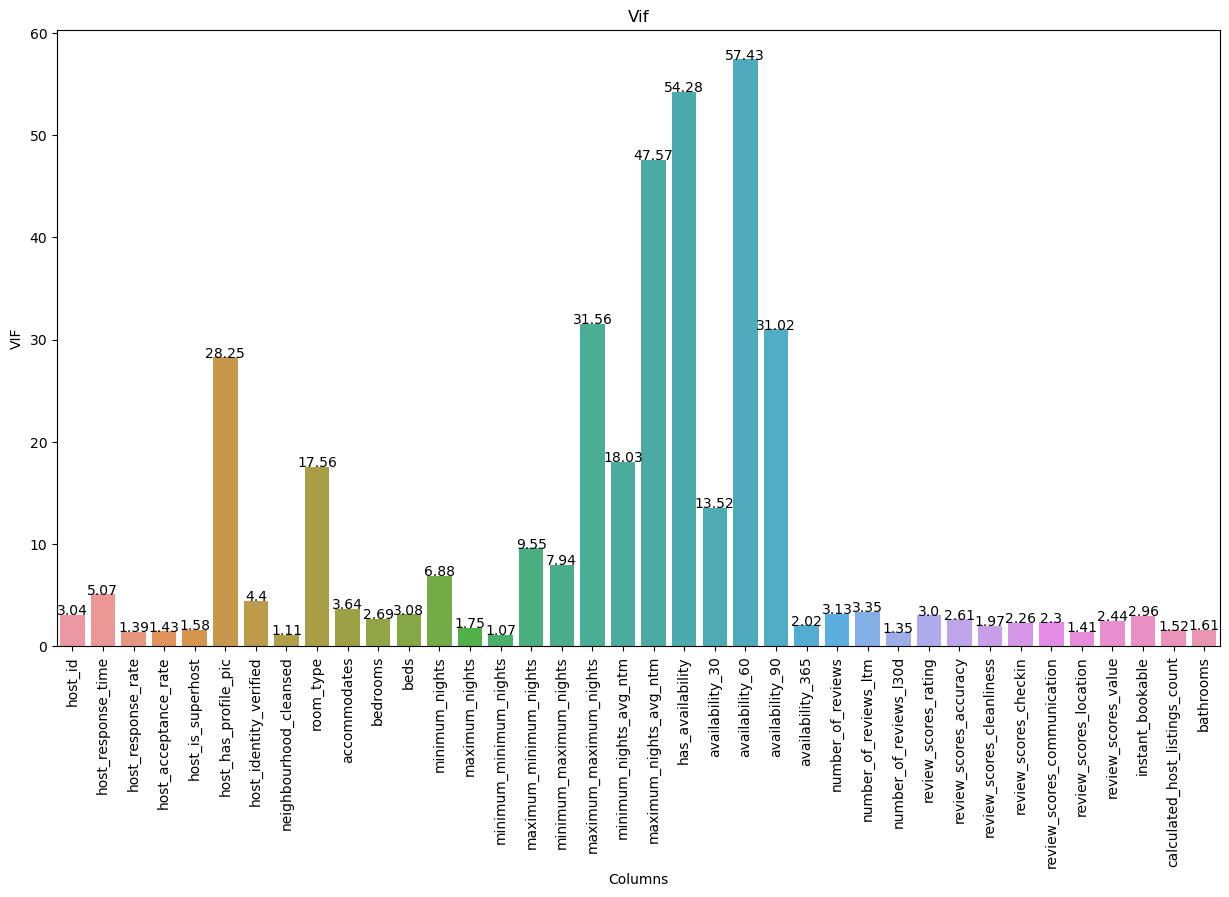

In [198]:
sns.barplot(data=vif,x='Columns',y='VIF')
for i,v in enumerate(vif['VIF'].sort_index()):
    plt.text(x = i , y = v , s =round(v,2), ha = 'center')
plt.title('Vif',loc='center')
plt.xticks(rotation = 90)
plt.savefig('VIF-value')
plt.show()

In [189]:
x.isnull().sum()

host_id                           0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
room_type                         0
accommodates                      0
bedrooms                          0
beds                              0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
minimum_maximum_nights            0
maximum_maximum_nights            0
minimum_nights_avg_ntm            0
maximum_nights_avg_ntm            0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d      

#### Based on the provided VIF values for each column, we can draw the following inferences:

1. Columns with VIF below 5: The columns 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'minimum_minimum_nights', 'maximum_nights', 'number_of_reviews_l30d', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', and 'bathrooms' have VIF values below 5. This suggests that these variables have low multicollinearity and can be considered independent predictors.

2. Columns with moderate VIF: The columns 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', and 'availability_90' have VIF values between 5 and 10. These variables may have some correlation with other predictors, but it is not severe.

3. Columns with high VIF: The columns 'host_response_time', 'host_has_profile_pic', 'room_type', 'has_availability', 'availability_60', 'calculated_host_listings_count', and 'host_total_listings_count' have VIF values above 10. These variables exhibit high multicollinearity, indicating strong correlation with other predictors. It is advisable to assess their importance and potential redundancy in the analysis.

Considering the multicollinearity, it is generally recommended to handle high VIF variables to avoid issues such as inflated standard errors and difficulties in interpreting coefficients. Possible approaches include removing highly correlated predictors, combining them, or using regularization techniques (e.g., ridge regression or LASSO) to mitigate multicollinearity effects.

In [1]:
# #flooring code
# def floor_and_cap(data, multiplier=1.5):
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     iqr = q3 - q1
#     lower_bound = q1 - multiplier * iqr
#     upper_bound = q3 + multiplier * iqr
#     capped_data = np.where(data < lower_bound, lower_bound, np.where(data > upper_bound, upper_bound, data))
#     return capped_data

# capped_data = floor_and_cap(data)
# print(capped_data)

In [ ]:
# #age column:

# from datetime import datetime

# # Calculate the difference between current year and 'host_since' columns year.
# current_year = datetime.now().year
# df['Years'] = df['host_since'].apply(lambda x: (current_year - x.year))
# print(df['Years'])

In [ ]:
# #latitude and longitude
# %%time
# from geopy.geocoders import Nominatim
# import pandas as pd

# geolocator = Nominatim(user_agent="pincode_finder")

# def reverse_geocode(lat, lon):
#     location = geolocator.reverse(f"{lat}, {lon}", exactly_one=True)
#     if location:
#         address = location.raw['address']
#         if 'postcode' in address:
#             return address['postcode']
#     return None

# df["pincode"] = df[['latitude','longitude']].head(100).apply(lambda row: reverse_geocode(row["latitude"], row["longitude"]), axis=1)
# from geopy.geocoders import Nominatim

# def get_location_type(latitude, longitude):
#     geolocator = Nominatim(user_agent="urban_rural_app")
#     location = geolocator.reverse(f"{latitude}, {longitude}", exactly_one=True)

#     if 'address' in location.raw:
#         address = location.raw['address']
#         if 'city' in address:
#             return 'Urban'
#         elif 'town' in address:
#             return 'Urban'
#         elif 'village' in address:
#             return 'Rural'
    
#     return 'Unknown'


In [ ]:
# #amneties
# from nltk.corpus import stopwords
# stop_words = list(set(stopwords.words('english') + list(STOPWORDS)))
# df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : ast.literal_eval(x))
# # Extracting words without numbers and special characters

# df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : re.sub('[^a-z]+', ' ', ' '.join(x).lower()))
# # Doing Lemmatization

# from nltk.stem import WordNetLemmatizer

# wnl = WordNetLemmatizer()

# df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : ' '.join([ wnl.lemmatize(i)  for i in x.split()]))
# # Extracting words which are not in stop words

# df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : ' '.join([ i for i in x.split() if i not in stop_words]))
# # Creating a list with all rows of amenities

# comment_words = []

# for i in df_airbnb['amenities']:
    
#     i = i.split()
    
#     for j in i:
#         comment_words.append(j)
# # Converting comment_words into series and taking frequency of each words

# comment_words = pd.Series(comment_words).value_counts()
